##  What is Text Vectorization?

Text Vectorization is the process of converting text into numerical representation.

There are many different techniques proposed to convert text to a numerical form such as:
* One-hot Encoding (OHE)
* Count Vectorizer
* Bag-of-Words (BOW)
* N-grams
* Term Frequency
* Term Frequency-Inverse Document Frequency (TF-IDF)
* Embeddings

#    -------------------------------------------------------------------------------
## Metin Vektörleştirme nedir?

Metin Vektörleştirme, metni sayısal gösterime dönüştürme işlemidir.

Metni sayısal bir forma dönüştürmek için önerilen birçok farklı teknik vardır, örneğin:
* Tek sıcak Kodlama (OHE)
* Sayı Vektörleştirici
* Sözcük Torbası (YAY)
* N-gram
* Terim Sıklığı
* Terim Frekansı-Ters Belge Frekansı (TF-IDF)
* Gömmeler

time: 30min 13s (started: 2023-07-21 15:58:16 +00:00)


**Tokenization** is about splitting strings of text into smaller pieces, or “tokens”. Paragraphs can be tokenized into sentences and sentences can be tokenized into words.


**Noise Removal** and **Tokenization** and  are staples of almost all text pre-processing pipelines. However, some data may require further processing through text **normalization**. Some of the common **normalization** steps are:
* Upper or lowercasing
* Stopword removal
* Stemming – bluntly removing prefixes and suffixes from a word
* Lemmatization – replacing a single-word token with its root

#------------------------------------------------------------------------------

**Belirteçleştirme**, metin dizilerini daha küçük parçalara veya "belirteçlere" bölmekle ilgilidir. Paragraflar cümlelere dönüştürülebilir ve cümleler sözcüklere dönüştürülebilir.


**Gürültü Giderme** ve **Belirteçleştirme** neredeyse tüm metin ön işleme ardışık düzenlerinin temelini oluşturur. Ancak, bazı veriler **normalleştirme** metni aracılığıyla daha fazla işlem gerektirebilir. Yaygın **normalleştirme** adımlarından bazıları şunlardır:
* Büyük veya küçük harf
* Engellenecek kelime kaldırma
* Stemming - bir kelimeden önekleri ve sonekleri açık bir şekilde kaldırmak
* Lemmatizasyon - tek kelimelik bir belirteci köküyle değiştirmek

##  What is Keras Text Vectorization layer?

`tf.keras.layers.TextVectorization` layer is one of the [Keras Preprocessing layers](https://keras.io/guides/preprocessing_layers/).

We can preproces the input by using different libraries such as Python String library, or SciKit Learn library, etc.

However, there are very important advantages using the [Keras Preprocessing layers](https://keras.io/guides/preprocessing_layers/):

* You can build **Keras-native** input processing **pipelines**. These input processing pipelines can be used as **independent** preprocessing code in **non-Keras workflows**, combined directly with Keras models, and exported as part of a Keras SavedModel.

* You can build and **export** models that are **truly end-to-end**: models that accept **raw data** (images or raw structured data) as input; models that handle feature **normalization** or feature value **indexing** on their own.

Today, we will deal with the `tf.keras.layers.TextVectorization` layer which:
* turns ***raw strings*** into an **encoded representation**
* that representation can be read by an `Embedding` layer or `Dense` layer.

That is, the `tf.keras.layers.TextVectorization` layer can be used in
* **Text Preprocessing** and
* **Text Vectorization**

#------------------------------------------------------------------------------

## Keras Metin Vektörleştirme katmanı nedir?

"tf.keras.layers.TextVectorization" katmanı, [Keras Önişleme katmanlarından](https://keras.io/guides/preprocessing_layers/) biridir.

Python String kitaplığı veya SciKit Learn kitaplığı vb. gibi farklı kitaplıkları kullanarak girdiyi önceden işleyebiliriz.

Ancak [Keras Preprocessing katmanlarını](https://keras.io/guides/preprocessing_layers/) kullanmanın çok önemli avantajları vardır:

* **Keras-yerel** girdi işleme **işlem hatları** oluşturabilirsiniz. Bu giriş işleme ardışık düzenleri, **Keras dışı iş akışlarında** **bağımsız** ön işleme kodu olarak kullanılabilir, doğrudan Keras modelleriyle birleştirilebilir ve bir Keras SavedModel'in parçası olarak dışa aktarılabilir.

* **Gerçekten uçtan uca** modeller oluşturabilir ve **dışa aktarabilirsiniz**: **ham verileri** (görüntüler veya ham yapılandırılmış veriler) girdi olarak kabul eden modeller; Özelliği **normalleştirme** veya özellik değeri **dizinlemeyi** kendi başlarına işleyen modeller.

Bugün, "tf.keras.layers.TextVectorization" katmanıyla ilgileneceğiz.
* ***ham dizeleri**** bir **kodlanmış gösterime** dönüştürür
* bu gösterim, bir "Gömülü" katman veya "Yoğun" katman tarafından okunabilir.

Yani, 'tf.keras.layers.TextVectorization' katmanı kullanılabilir.
* **Metin Ön İşleme** ve
* **Metin Vektörleştirme**

# EXPLORATORY DATA ANALYSIS (EDA)
# KEŞİF VERİ ANALİZİ (EDA)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import re
import string
import random
from sklearn.model_selection import train_test_split
import tensorflow_datasets as tfds
import json

time: 1.53 ms (started: 2023-07-21 11:56:41 +00:00)


In [11]:
tf.__version__

'2.12.0'

time: 3.03 ms (started: 2023-07-21 11:56:41 +00:00)


In [12]:
# Record Each Cell's Execution Time
# Her Hücrenin Yürütme Süresini Kaydedin
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 4.94 s (started: 2023-07-21 11:56:41 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
time: 30.2 s (started: 2023-07-21 11:48:05 +00:00)


In [ ]:
# changing the working directory
# çalışma dizinini değiştirme
%cd "/content/gdrive/MyDrive/Colab Notebooks/input"

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/input'
/content
time: 802 ms (started: 2023-07-21 11:48:35 +00:00)


In [ ]:
# check the downloaded zip file
# indirilen zip dosyasını kontrol edin
!ls

gdrive	sample_data
time: 111 ms (started: 2023-07-21 11:48:36 +00:00)


In [ ]:
tr_stop_words = pd.read_csv('/content/sample_data/tr_stop_word.txt',header=None)
print("First 5 entries:")
for each in tr_stop_words.values[:5]:
  print(each[0])

First 5 entries:
ama
amma
anca
ancak
bu
time: 52.3 ms (started: 2023-07-21 11:53:55 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 6.89 s (started: 2023-07-21 11:53:58 +00:00)


In [15]:
data = pd.read_csv('/content/sample_data/ticaret-yorum.csv')
pd.set_option('max_colwidth', 400)

time: 5.5 s (started: 2023-07-21 12:14:01 +00:00)


## Explore the Basic Properties of the Dataset
## Veri Kümesinin Temel Özelliklerini Keşfedin

In [16]:
data.head()

,category,text
0,alisveris,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
1,alisveris,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku"
2,alisveris,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim. Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti. Ürünü teslim aldıktan son...Devamını oku"
3,alisveris,"Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Dizlik Esnemiyor!,Anda ihtiyaç ve tüketim maddeleri pazarlama san. Lim. Şti. Den 139 TL kapıda teslim knee tork adlı ürünü satın aldım. Ürün 0815774588452 takip no... İle Aras Kargo tarafından tarafıma teslim edildi. Ürün kargoya firma tarafından 26.05.2020 tarihinde kargoya verilmiş. Ürünün üst dizlik bedeni bacağım...Devamını oku"
4,alisveris,"BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı Ve Muhatap Bulamıyorum!,Fotoğrafını göndermiş olduğum ürünün kablosunda temassızlık var ve ne fatura ne numara sadece gönderen kargonun adı var ve onlara da ulaşamıyorum ayrıca kargo daha bugün elime geçti Denizli Marmaris gezmiş ürün. Beni arayan numarayı buldum ona da ulaşılamıyor.Devamını oku"


time: 23.4 ms (started: 2023-07-21 12:14:10 +00:00)


In [17]:
print("Shape of data (rows, cols)=>",data.shape)

Shape of data (rows, cols)=> (431306, 2)
time: 757 µs (started: 2023-07-21 12:14:12 +00:00)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431306 entries, 0 to 431305
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  431306 non-null  object
 1   text      431306 non-null  object
dtypes: object(2)
memory usage: 6.6+ MB
time: 189 ms (started: 2023-07-21 12:14:15 +00:00)


### Check the Null Values

### Boş Değerleri Kontrol Edin

In [19]:
data.isnull().sum()

category    0
text        0
dtype: int64

time: 322 ms (started: 2023-07-21 12:14:16 +00:00)


### Check the Duplicated Reviews
### Yinelenen İncelemeleri Kontrol Edin

In [20]:
data.describe(include='all')

,category,text
count,431306,431306
unique,32,427231
top,kamu-hizmetleri,"Akman Nikah Ve Balo Salonu Sözleşme Bedeli Kapora İadesi Yapmıyor,20.07.2019 tarihinde 13.06.2020 tarihli kına gecesi için Sincan harikalar diyarı akman prestij salonuna kapora bedeli 2600 TL ödeyerek anlaşma yaptık. Korona virüsü nedeniyle iptal etmek için mayıs ayından itibaren defalarca görüştüm ve sonra dilekçe verdim sözlü olarak kapora bedeli ödenmez ama dil...Devamını oku"
freq,14009,154


time: 1.35 s (started: 2023-07-21 12:14:17 +00:00)


For `category` column there are 431306 rows and 32 unique values.
However, for `text` column, there exists 431306 rows of which 427231 entries are unique. That is, for `text` column, there are some duplications: 431306 - 427231 = **4075**

We can verify the duplications:
#-------------------------------------------------------------------------------
`category` sütunu için 431306 satır ve 32 benzersiz değer vardır.
Ancak "metin" sütununda 431306 satır vardır ve bunların 427231'i benzersizdir. Yani, "metin" sütunu için bazı yinelemeler var: 431306 - 427231 = **4075**

Kopyaları doğrulayabiliriz:

In [21]:
data.text.duplicated(keep="first").value_counts()

False    427231
True       4075
Name: text, dtype: int64

time: 143 ms (started: 2023-07-21 12:14:18 +00:00)


In [22]:
data.drop_duplicates(subset="text",keep="first",inplace=True,ignore_index=True)
data.describe()

,category,text
count,427231,427231
unique,32,427231
top,kamu-hizmetleri,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
freq,13998,1


time: 1.12 s (started: 2023-07-21 12:14:18 +00:00)


## Analyze the Classes (Topics)
## Sınıfları Analiz Edin (Konular)

In [23]:
topic_list = data.category.unique()
print("Topics:\n", topic_list)

Topics:
 ['alisveris' 'anne-bebek' 'beyaz-esya' 'bilgisayar' 'cep-telefon-kategori'
 'egitim' 'elektronik' 'emlak-ve-insaat' 'enerji'
 'etkinlik-ve-organizasyon' 'finans' 'gida' 'giyim' 'hizmet-sektoru'
 'icecek' 'internet' 'kamu-hizmetleri' 'kargo-nakliyat'
 'kisisel-bakim-ve-kozmetik' 'kucuk-ev-aletleri' 'medya'
 'mekan-ve-eglence' 'mobilya-ev-tekstili' 'mucevher-saat-gozluk'
 'mutfak-arac-gerec' 'otomotiv' 'saglik' 'sigortacilik' 'spor' 'temizlik'
 'turizm' 'ulasim']
time: 45.2 ms (started: 2023-07-21 12:14:20 +00:00)


In [24]:
number_of_topics = len(topic_list)
print("Number of Topics: ",number_of_topics)

Number of Topics:  32
time: 2.11 ms (started: 2023-07-21 12:14:20 +00:00)


In [25]:
data.category.value_counts()

kamu-hizmetleri              13998
cep-telefon-kategori         13975
enerji                       13968
finans                       13958
ulasim                       13943
medya                        13908
kargo-nakliyat               13877
mutfak-arac-gerec            13867
alisveris                    13816
mekan-ve-eglence             13807
elektronik                   13770
beyaz-esya                   13761
kucuk-ev-aletleri            13732
giyim                        13676
internet                     13657
icecek                       13564
saglik                       13559
sigortacilik                 13486
spor                         13448
mobilya-ev-tekstili          13434
otomotiv                     13377
turizm                       13317
egitim                       13264
gida                         13150
temizlik                     13111
mucevher-saat-gozluk         12964
bilgisayar                   12963
kisisel-bakim-ve-kozmetik    12657
anne-bebek          

time: 54 ms (started: 2023-07-21 12:14:20 +00:00)


<Axes: >

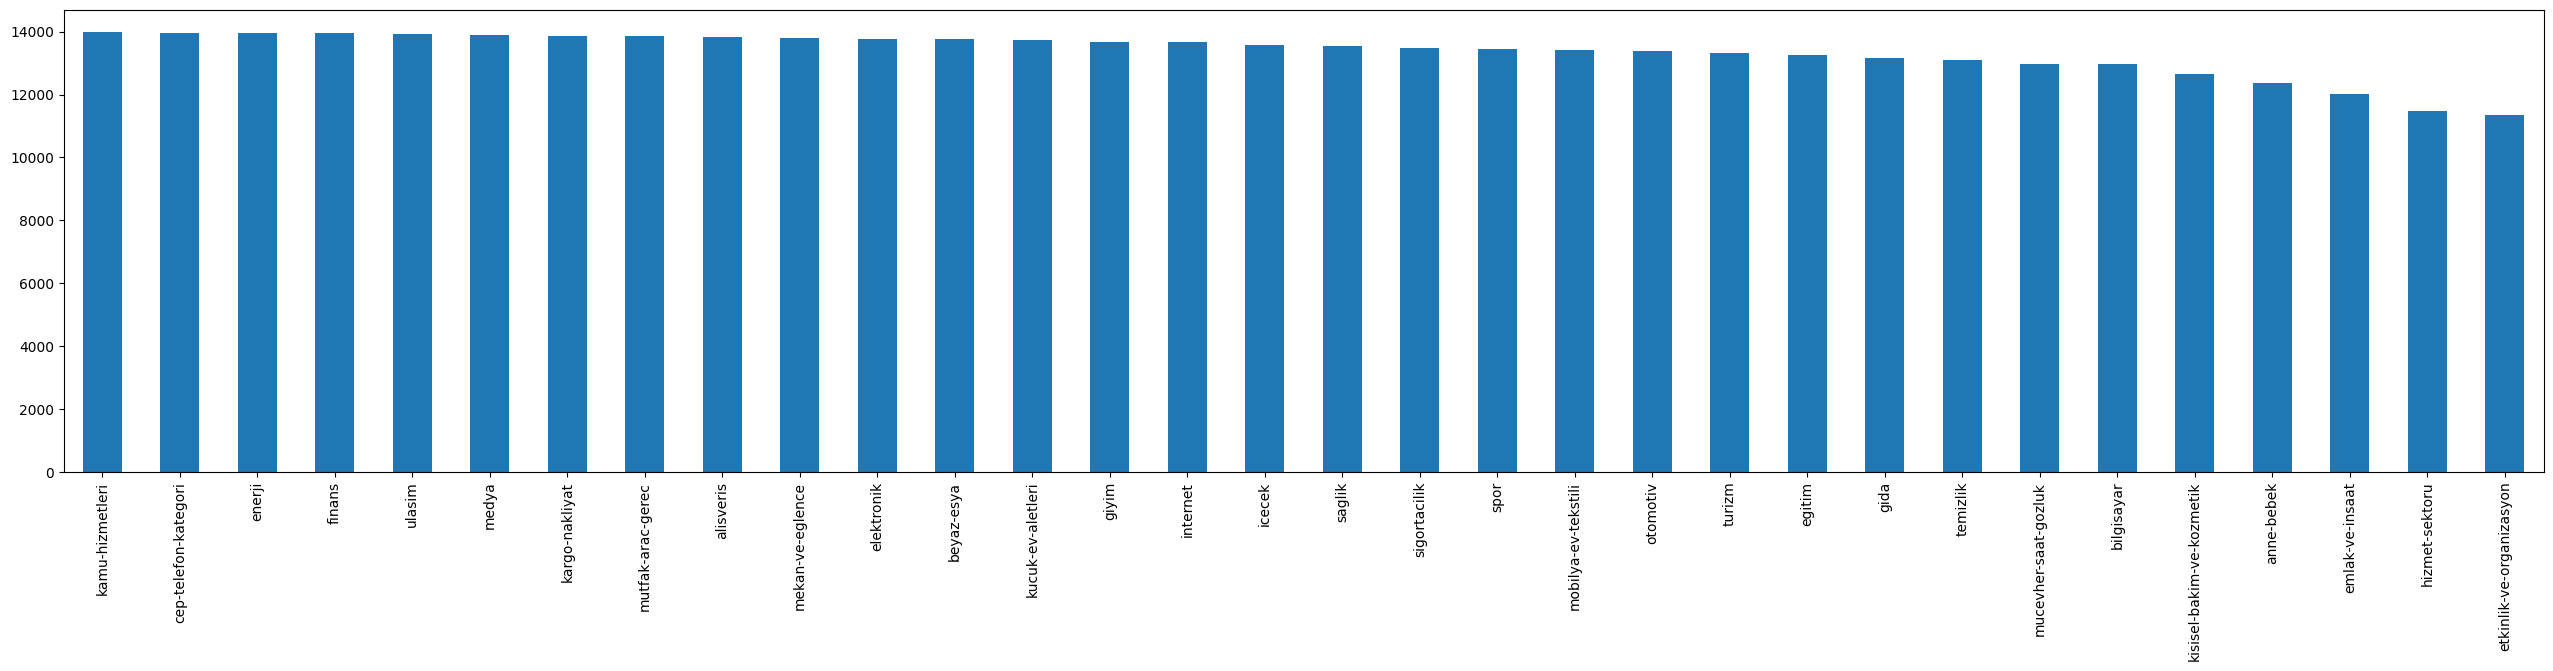

time: 754 ms (started: 2023-07-21 12:14:20 +00:00)


In [26]:
data.category.value_counts().plot.bar(x="Topics",y="Number of Reviews",figsize=(32,6) )

## Analyze Reviews (Text)
## Yorumları Analiz Et (Metin)

In [27]:
data.head(5)

,category,text
0,alisveris,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
1,alisveris,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku"
2,alisveris,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim. Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti. Ürünü teslim aldıktan son...Devamını oku"
3,alisveris,"Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Dizlik Esnemiyor!,Anda ihtiyaç ve tüketim maddeleri pazarlama san. Lim. Şti. Den 139 TL kapıda teslim knee tork adlı ürünü satın aldım. Ürün 0815774588452 takip no... İle Aras Kargo tarafından tarafıma teslim edildi. Ürün kargoya firma tarafından 26.05.2020 tarihinde kargoya verilmiş. Ürünün üst dizlik bedeni bacağım...Devamını oku"
4,alisveris,"BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı Ve Muhatap Bulamıyorum!,Fotoğrafını göndermiş olduğum ürünün kablosunda temassızlık var ve ne fatura ne numara sadece gönderen kargonun adı var ve onlara da ulaşamıyorum ayrıca kargo daha bugün elime geçti Denizli Marmaris gezmiş ürün. Beni arayan numarayı buldum ona da ulaşılamıyor.Devamını oku"


time: 10.3 ms (started: 2023-07-21 12:14:21 +00:00)


### Calculate the number of words in each reviews
### Her incelemedeki kelime sayısını hesaplayın

In [28]:
data['words'] = [len(x.split()) for x in data['text'].tolist()]

time: 2.49 s (started: 2023-07-21 12:14:27 +00:00)


In [29]:
data[['words','text']].head()

,words,text
0,49,"Altus Hırdavat Yapı Malzemeleri Drone Diye Kargodan Lastik Ayakkabı Çıktı,""Instagram'da dolanırken sponsorlu bir bağlantı gördüm. Drone satışı yapılıyor. Normalde böyle şeylere inanmam ancak takipçi sayısının fazla olması, numaralarının olması, ödemeyi peşin değil karşı ödemeli ödenmesi, fotoğraflara yapılan yorumlar vs... Az da olsa güvenerek ben de sipariş vermek istedim...Devamını oku"""
1,44,"Albay Bilgisayar Garanti Yalanı İle Yanılttı,Garanti kapsamında yer alan Casper bilgisayarım garanti belgesi ile birlikte İzmit Casper bilgisayar yetkili servisine albay bilgisayara bıraktım. Önce almak istemedi uzun ikna cabası ve uğraş sonunda zorla garanti dahiline bıraktım bilgisayar açılmıyordu. Sonrasında ertesi gün bilgisayarın yapıldı...Devamını oku"
2,47,"Okyanus Petshop Ürün İade Sorunu!,Satıcıdan GittiGidiyor üzerinden 385 TL tutarında Frolicat Interactive Kedi Lazer oyuncağı satın aldım. Ürünü açıp bir kez çalıştırdığımda çok gürültü çıkardığını fark ettim ve ürünü iade etmeye karar verdim. Hatam iade sürecinin 14 gün içinde olması gerektiğini bilmemekti. Ürünü teslim aldıktan son...Devamını oku"
3,53,"Anda İhtiyaç Ve Tüketim Maddeleri Knee Tork Dizlik Esnemiyor!,Anda ihtiyaç ve tüketim maddeleri pazarlama san. Lim. Şti. Den 139 TL kapıda teslim knee tork adlı ürünü satın aldım. Ürün 0815774588452 takip no... İle Aras Kargo tarafından tarafıma teslim edildi. Ürün kargoya firma tarafından 26.05.2020 tarihinde kargoya verilmiş. Ürünün üst dizlik bedeni bacağım...Devamını oku"
4,48,"BB Kargo Dağıtım'dan Aldığım Ürün Bozuk Çıktı Ve Muhatap Bulamıyorum!,Fotoğrafını göndermiş olduğum ürünün kablosunda temassızlık var ve ne fatura ne numara sadece gönderen kargonun adı var ve onlara da ulaşamıyorum ayrıca kargo daha bugün elime geçti Denizli Marmaris gezmiş ürün. Beni arayan numarayı buldum ona da ulaşılamıyor.Devamını oku"


time: 23.7 ms (started: 2023-07-21 12:14:29 +00:00)


### Review Length in terms of Number of Words
### Kelime Sayısı Açısından İnceleme Uzunluğu

In [30]:
data['words'].describe()

count    427231.000000
mean         44.408624
std           8.108499
min           2.000000
25%          42.000000
50%          46.000000
75%          49.000000
max         183.000000
Name: words, dtype: float64

time: 29.6 ms (started: 2023-07-21 12:14:29 +00:00)


**Note that:**
1. 75% of the reviews have less than 50 words.
2. The **longest** review has 183 words.

We could (will) use these statistics
* to filter out some of the reviews,
* to determine the maximum review size
* etc.

#-------------------------------------------------------------------------------

**Dikkat:**
1. İncelemelerin %75'inde 50'den az kelime var.
2. **en uzun** inceleme 183 kelime içeriyor.

Bu istatistikleri kullanabiliriz (kullanacağız)
* bazı incelemeleri filtrelemek için,
* maksimum inceleme boyutunu belirlemek için
* vesaire.

### Review Length in terms of Number of Words per Topic
### Konu Başına Kelime Sayısı Açısından İnceleme Uzunluğu

In [31]:
data.groupby(['category'])['words'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
alisveris,13816.0,43.562970,8.607092,4.0,41.0,45.0,49.0,63.0
anne-bebek,12381.0,44.833131,7.238100,3.0,42.0,46.0,49.0,62.0
beyaz-esya,13761.0,45.227091,7.409185,4.0,43.0,47.0,50.0,67.0
bilgisayar,12963.0,44.252796,8.119548,3.0,42.0,46.0,49.0,95.0
cep-telefon-kategori,13975.0,43.848229,8.071967,5.0,41.0,45.0,49.0,64.0
egitim,13264.0,43.345371,7.985817,4.0,41.0,45.0,48.0,68.0
elektronik,13770.0,44.029920,8.270702,3.0,41.0,46.0,49.0,64.0
emlak-ve-insaat,12024.0,44.880073,8.079509,3.0,42.0,47.0,50.0,66.0
enerji,13968.0,44.903780,8.640223,4.0,42.0,46.0,50.0,183.0


time: 158 ms (started: 2023-07-21 12:14:29 +00:00)


We observe that
1. **Only 9** out of 32 topics have longer reviews than 70 words.
2. **For all the topics**, 75% of the reviews have less than 50 words.

That is, we can limit the reviews for **40 or 50 words**.
#-------------------------------------------------------------------------------
Bunu gözlemliyoruz
1. 32 konudan **yalnızca 9**'unda 70 kelimeden uzun incelemeler var.
2. **Tüm konular için**, incelemelerin %75'inde 50'den az kelime var.

Yani incelemeleri **40 veya 50 kelime** ile sınırlandırabiliriz.

time: 172 ms (started: 2023-07-21 12:14:29 +00:00)


### Number of short reviews

We can check the number of short reviews by comparing a threshold:

#-------------------------------------------------------------------------------
### Kısa inceleme sayısı

Bir eşiği karşılaştırarak kısa incelemelerin sayısını kontrol edebiliriz:

In [32]:
min_review_size = 15
data[data['words']<min_review_size].count()

category    4950
text        4950
words       4950
dtype: int64

time: 20.6 ms (started: 2023-07-21 12:14:31 +00:00)


In [33]:
data[data['words']<min_review_size]

,category,text,words
143,alisveris,"Vatan Bilgisayar Kargo Hakkında Bilgi Verilmemesi Çağrı Merkezinin 30 Dakika Bekletmesi,""02.05.2020 tarihinde verdiğim",13
146,alisveris,"A101 Sipariş Alıyor Ancak Getirmiyor,""28.05.2020 Tarihinde sipariş verdim.",8
198,alisveris,"Boyner Eksik Ürün Gönderme,""Merhabalar",4
206,alisveris,"Tekzen 40 Gündür Ücret İadesi Yapılmıyor,""17.04.2020 tarihinde jaluzi perde siparişi verdim. Sipariş numaram: 636576660",14
228,alisveris,"Boyner Sipariş 1 Haftadır Tedarik Sürecinde!,""Merhabalar,",6
...,...,...,...
426760,ulasim,"Pegasus Uçuşu İptal Etti!,""13.02.2020 diyarbakır'dan istanbul sabiha gökcen havalimanına 21.25 uçuşumuz vardı.",12
426779,ulasim,"Kent Kart'a FastPay İle Yaptığım Yükleme Hesabıma Geçmedi!,""13/02/2020 Tarihinde Denizbank'ın FastPay uygulaması vasıtasıyla",13
426922,ulasim,"Efe Tur İnternet Yok,""İnternet şifresi istiyoruz kota doluyor veremeyiz diyorlar televizyonlar açılmıyor",12
427020,ulasim,"Efe Tur'da Saygısızlık, İhmalkarlık!,""11.02.2020 20:00 Ankara İstanbul seferini yapan 210 numaralı aracın şoförü",13


time: 23.3 ms (started: 2023-07-21 12:14:31 +00:00)


###  Decide minimum and maximum review size

**Important:** In some tasks, we can assume that **short** reviews can not convey **necessary /enough information** for training and testin a ML model. For example, in **Text Generation**, if you would like to generate longer text, you would prefer training your model with **longer** text examples.


As a results, according to the ML task at hand, you can use the above statistics, to set up a **minimum** and **maximum** review size in terms of words.

Here, I set these parameters as follows:
#-------------------------------------------------------------------------------
### Minimum ve maksimum inceleme boyutuna karar verin

**Önemli:** Bazı görevlerde, **kısa** incelemelerin bir makine öğrenimi modelinde eğitim ve test için **gerekli/yeterli bilgileri** iletemeyeceğini varsayabiliriz. Örneğin **Metin Oluşturma**'da daha uzun metin oluşturmak istiyorsanız modelinizi **uzun** metin örnekleriyle eğitmeyi tercih edersiniz.


Sonuç olarak, eldeki makine öğrenimi görevine göre, kelime cinsinden **minimum** ve **maksimum** inceleme boyutu ayarlamak için yukarıdaki istatistikleri kullanabilirsiniz.

Burada, bu parametreleri aşağıdaki gibi ayarlıyorum:

In [34]:
min_review_size = 15
max_review_size = 40 #50

time: 607 µs (started: 2023-07-21 12:14:35 +00:00)


### Filter out the short reviews
In the initial raw data, after removing duplications, we have **427231** reviews.

--------------------------------------------------------------------------------
### Kısa incelemeleri filtreleyin
İlk ham verilerde, kopyaları çıkardıktan sonra elimizde **427231** inceleme var.

In [35]:
data.count()

category    427231
text        427231
words       427231
dtype: int64

time: 172 ms (started: 2023-07-21 12:14:36 +00:00)


Above, we observed that we have **4950** reviews whose length is less than  `min_review_size`  (15 words).

Let's remove short reviews:
#------------------------------------------------------------------------------
Yukarıda, uzunluğu "min_review_size"den (15 kelime) kısa olan **4950** yorumumuz olduğunu gözlemledik.

Kısa yorumları kaldıralım:

In [36]:
data= data[data['words']>=min_review_size]

time: 27.7 ms (started: 2023-07-21 12:14:38 +00:00)


After filtering out these short reviews, we will end up with (427231 - 4950) **422281** as  below:
#------------------------------------------------------------------------------
Bu kısa incelemeleri filtreledikten sonra, aşağıdaki gibi (427231 - 4950) **422281** elde edeceğiz:

In [37]:
data.count()

category    422281
text        422281
words       422281
dtype: int64

time: 162 ms (started: 2023-07-21 12:14:39 +00:00)


In [38]:
data[data['words']<min_review_size].count()

category    0
text        0
words       0
dtype: int64

time: 6.64 ms (started: 2023-07-21 12:14:40 +00:00)


### Trim the longer reviews

We will trim the longer reviews using Keras `TextVectorization` layer below.
#------------------------------------------------------------------------------
### Daha uzun incelemeleri kısaltın

Aşağıdaki Keras `TextVectorization` katmanını kullanarak daha uzun incelemeleri kırpacağız.

time: 1.34 s (started: 2023-07-21 12:14:40 +00:00)


## Analyze the Vocabulary

### Count the distinct words

Let's look into the **raw** dataset to count the **distinct words**
#-------------------------------------------------------------------------------
## Kelime dağarcığını analiz et

### Farklı kelimeleri sayın

**belirgin kelimeleri** saymak için **ham** veri kümesine bakalım

In [39]:
vocab = set()
corpus= [x.split() for x in data['text'].tolist()]
for sentence in corpus:
  for word in sentence:
    vocab.add(word.lower())
print("Number of distinct words in raw data: ", len(vocab))

Number of distinct words in raw data:  900327
time: 15.9 s (started: 2023-07-21 12:14:45 +00:00)


Note: This number, 900K, is **huge** actually. If you investigate some vocabulary entries, you would see that there are several reasons for this big number:
#-------------------------------------------------------------------------------
Not: Bu sayı, 900K, aslında **çok büyük**. Bazı sözcük girişlerini araştırırsanız, bu büyük sayının birkaç nedeni olduğunu görürsünüz:

In [40]:
list(vocab)[:25]

['şunlardır:',
 'yapılamıyor.,"16.05.2020',
 'görselmiş.',
 'yaşatıyor,çocuğuma',
 'götürmüyormuş.',
 'bulunamaması,sayın',
 '5261',
 'basamıyorum',
 'alınmadığını',
 'taraflara',
 'getirilmiyor!,"vodafone',
 'paket!,"kargo',
 'serviste!,"saat',
 'yapılmıyor,12.05.2020',
 'değiştirmiyor,"26',
 'koruyamadınız.',
 'fiyasko,"i̇lk',
 'dekontlarını',
 'veremiyor!,bugün',
 'hakkındadır,"çeyiz',
 'seçtim)',
 'oluştura...devamını',
 'beğenme',
 'cıncık',
 "servisi,lenovo'nın"]

time: 84.8 ms (started: 2023-07-21 12:15:00 +00:00)


* There are some **typos** in the reviews so the same word is misspelled and counted as a new word for several times such as: "***haksızlık***" vs "***hakszlık***".
* Some reviwers use Turkish alphabet some use English alpabet to write the same words such as: "***özgün***" vs "***ozgun***"
* There are many **stop words** in Turkish :)
We will apply several workarounds to remove such words in the text during preprocessing below.

NOTE that:
* we are **just analyzing** the data, we are **not preprocessing** it yet!
* we will use a much better method to **split** the text into tokens in preprocessing phase later.
* thus, here, we just aim to get familiar with the data at hand before startint to preprocess it.

#-------------------------------------------------------------------------------
* İncelemelerde bazı **yazım hataları** olduğu için aynı kelime birkaç kez yanlış yazılmış ve yeni bir kelime olarak sayılmıştır, örneğin: "***haksızlık***" vs "***hakszlık***".
* Bazı yorumcular aynı kelimeleri yazmak için Türk alfabesini kullanır, bazıları İngilizce alpabet'i kullanır, örneğin: "***özgün***" vs "***ozgun***"
* Türkçe'de bir çok **durdurma sözü** var :)
Aşağıdaki ön işleme sırasında metindeki bu tür sözcükleri kaldırmak için birkaç geçici çözüm uygulayacağız.

Dikkat:
* Verileri **sadece analiz ediyoruz**, henüz **önişleme yapmıyoruz**!
* daha sonra ön işleme aşamasında metni belirteçlere **bölmek** için çok daha iyi bir yöntem kullanacağız.
* bu nedenle, burada, ön işlemeye başlamadan önce eldeki verileri tanımayı amaçlıyoruz.

### Count the frequency of words in the raw dataset
### Ham veri kümesindeki kelimelerin sıklığını sayın

In [41]:
word_freq= data.text.str.split(expand=True).stack().value_counts()
word_freq=word_freq.reset_index(name='freq').rename(columns={'index': 'word'})

time: 57.5 s (started: 2023-07-21 12:15:01 +00:00)


In [42]:
top_50_frequent_words = word_freq[:50]
top_50_frequent_words

,word,freq
0,bir,289644
1,oku,267115
2,ve,254044
3,için,131232
4,bu,121281
5,"oku""",115391
6,de,100804
7,da,82413
8,ama,69900
9,ile,67040


time: 10.2 ms (started: 2023-07-21 12:15:58 +00:00)


If you investigate the above **top-50** frequent words carefully, you can notice that some words can be considered "**stop words**", some others could be very informative for a classifier.

Let's see which **top-50** frequent words are in the **stop-word** list that we loaded at the beginning:

#-------------------------------------------------------------------------------
Yukarıdaki **ilk 50** sık kullanılan kelimeyi dikkatlice incelerseniz, bazı kelimelerin "**bitmeyen kelimeler**" olarak kabul edilebileceğini, bazılarının ise bir sınıflandırıcı için çok bilgilendirici olabileceğini fark edebilirsiniz.

Başlangıçta yüklediğimiz **durdurma-kelime** listesinde hangi **en sık kullanılan 50** kelime arasında bakalım:

In [43]:
for each in top_50_frequent_words['word']:
  if each in tr_stop_words.values:
    print (each)

bir
ve
için
bu
de
da
ama
ile
sonra
rağmen
önce
çok
kadar
daha
diye
gibi
yok
fakat
bana
time: 3.43 ms (started: 2023-07-21 12:15:58 +00:00)


Almost 20 words out of the top-50 words are stop words. Therefore, during preprocessing, we will take care of the stop-words.

İlk 50 kelimeden yaklaşık 20 tanesi durma kelimeleridir. Bu nedenle, ön işleme sırasında durdurma sözcüklerini dikkate alacağız.

## Summary
In this part, we have explored the dataset and taken several actions and decisions:
* we removed the duplications and null values (if any)
* we observed that there are 32 topics and reviews are evenly distributed over these topics
* we decided the minimum and maximum review lengths
* we droped the short reviews

In the next part, we will apply the text preprocessing by using the Keras `TextVectorization` layer.
#------------------------------------------------------------------------------
## Özet
Bu bölümde, veri setini inceledik ve birkaç eylem ve karar aldık:
* tekrarları ve boş değerleri (varsa) kaldırdık
* 32 konu olduğunu ve yorumların bu konulara eşit dağıldığını gözlemledik.
* minimum ve maksimum inceleme sürelerine karar verdik
* kısa incelemeleri bıraktık

Bir sonraki bölümde Keras `TextVectorization` katmanını kullanarak metin ön işlemesini uygulayacağız.

# PREPARE THE DATASET
# VERİ KÜMESİNİ HAZIRLAYIN

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422281 entries, 0 to 427230
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   category  422281 non-null  object
 1   text      422281 non-null  object
 2   words     422281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.0+ MB
time: 206 ms (started: 2023-07-21 12:15:58 +00:00)


In [45]:
data.describe()

,words
count,422281.000000
mean,44.810110
std,7.245746
min,15.000000
25%,42.000000
50%,46.000000
75%,49.000000
max,183.000000


time: 36.5 ms (started: 2023-07-21 12:15:58 +00:00)


## Shuffle Data

It is a really good and useful habit that, before doing anything else, as a first step in the preprocessing shuffle the data!

Actually, I will shuffle the data at the last step of the pipeline.
But it does not harm shuffling the data twice :))

#-------------------------------------------------------------------------------
## Verileri Karıştır

Başka bir şey yapmadan önce ön işlemenin ilk adımı olarak verileri karıştırmak gerçekten iyi ve yararlı bir alışkanlıktır!

Aslında, boru hattının son adımında verileri karıştıracağım.
Ancak verileri iki kez karıştırmaktan zarar gelmez :))

In [46]:
data= data.sample(frac=1)

time: 140 ms (started: 2023-07-21 12:15:58 +00:00)


## Convert Categories From Strings to Integer Ids
### Observe that the categories (topics/class)of the reviews are strings:
#-------------------------------------------------------------------------------
## Kategorileri Dizelerden Tamsayı Kimliklerine Dönüştür
### İncelemelerin kategorilerinin (konu/sınıf) dize olduğunu gözlemleyin:

In [47]:
data["category"]

8168                alisveris
384077                   spor
138067                 finans
44256              bilgisayar
199282               internet
                 ...         
323448      mutfak-arac-gerec
416829                 ulasim
349520                 saglik
271911                  medya
292749    mobilya-ev-tekstili
Name: category, Length: 422281, dtype: object

time: 9.5 ms (started: 2023-07-21 12:15:59 +00:00)


In [48]:
data["category"] = data["category"].astype('category')
data.dtypes

category    category
text          object
words          int64
dtype: object

time: 67.2 ms (started: 2023-07-21 12:15:59 +00:00)


In [49]:
data["category_id"] = data["category"].cat.codes
data.tail()

,category,text,words,category_id
323448,mutfak-arac-gerec,"Arzum Okka MiniO Kahve Makinesi Hayal Kırıklığı!,""Size şöyle diyebilirim, köpük sıfır, lezzet sıfır. Tam bir hayal kırıklığı, bu makineyi aldığım için çok pişmanım. Her gün farklı şekilde kahveyi yapmayı deniyorum.Hep sıfır köpük ve lezzet gerçekten yok.Devamını oku""",37,24
416829,ulasim,"THY Ücret İadesini Yapmıyor,Enuygun.com aracılığıyla Türk Hava Yolları'na ait Erzurum Zonguldak uçak bileti aldım uçuşlar dün iptal edildi bende yaşadığımız salgından dolayı işten çıkarıldım ve zor bela aldığım uçak biletinin para iadesini bileti iptal ettirmek istedim ama bana yasağın kalkması gerektiğini ve iki ayla üç ay iç...Devamını oku",48,31
349520,saglik,"Cold Lipolysis Fatura Ve Söz Verilen Hediye Ürünün Gönderilmemesi,""Ürünü aldıktan sonra 13 Nisan itibariyle mesaj yazdım. Sitelerindeki telefona cevap veren kimse yok. 2 kutu ürün aldım, parasını ödedim kargo geldi fakat içinden fatura çıkmadı. Yazdım hediye ürünü nasıl alacağımı ne yapmam gerektiğini söylediler onu da hazırlayıp gönderdim.",47,26
271911,medya,"A Haber'den Gerçek Dışı Bilgilendirme,A haberde temel ihtiyaç kredisi destek paketi ile ilgili sicili bozuk olanlar açık takibi olanlar şartsız koşulsuz kredi çekebilecek diye insanları bilgilendirdiler. Halk bankası çalışanlarını aradım böyle bir haber yok .Bu şartlarda kredi vermeyiz dediler.Bu zamanda insanların duygularıyla oynayanl...Devamını oku",44,20
292749,mobilya-ev-tekstili,"Ikea Skalberg Sandalye Kalitesizliği,""3-4 ay önce satın aldım Tepeüstü IKEA mağazasından. İki gün önce arka sırt dayama yeri vida yanından yırtıldı. Bu ürünü satın alırken beni neden uyarmadılar """" çürüktür kırılabilir aman dikkat edin """" diye. Müşteri hizmetlerine mesaj attım yedek parçası var ise satın alayım diye ama tin yok! Mecburen ...Devamını oku""",53,22


time: 17.4 ms (started: 2023-07-21 12:15:59 +00:00)


In [50]:
data.dtypes

category       category
text             object
words             int64
category_id        int8
dtype: object

time: 6.67 ms (started: 2023-07-21 12:15:59 +00:00)


## Build a Dictionary for id to text category (topic) look-up:
## Kimlikten metne kategori (konu) araması için bir Sözlük oluşturun:

In [51]:
id_to_category = pd.Series(data.category.values,index=data.category_id).to_dict()
id_to_category

{0: 'alisveris',
 28: 'spor',
 10: 'finans',
 3: 'bilgisayar',
 15: 'internet',
 23: 'mucevher-saat-gozluk',
 22: 'mobilya-ev-tekstili',
 14: 'icecek',
 25: 'otomotiv',
 8: 'enerji',
 16: 'kamu-hizmetleri',
 29: 'temizlik',
 26: 'saglik',
 9: 'etkinlik-ve-organizasyon',
 24: 'mutfak-arac-gerec',
 20: 'medya',
 18: 'kisisel-bakim-ve-kozmetik',
 1: 'anne-bebek',
 4: 'cep-telefon-kategori',
 30: 'turizm',
 19: 'kucuk-ev-aletleri',
 13: 'hizmet-sektoru',
 5: 'egitim',
 21: 'mekan-ve-eglence',
 27: 'sigortacilik',
 2: 'beyaz-esya',
 11: 'gida',
 7: 'emlak-ve-insaat',
 31: 'ulasim',
 17: 'kargo-nakliyat',
 12: 'giyim',
 6: 'elektronik'}

time: 308 ms (started: 2023-07-21 12:15:59 +00:00)


## Build another Dictionary for category (topic) to id look-up:
## Kimlik araması için kategori (konu) için başka bir Sözlük oluşturun:

In [52]:
category_to_id= {v:k for k,v in id_to_category.items()}
category_to_id

{'alisveris': 0,
 'spor': 28,
 'finans': 10,
 'bilgisayar': 3,
 'internet': 15,
 'mucevher-saat-gozluk': 23,
 'mobilya-ev-tekstili': 22,
 'icecek': 14,
 'otomotiv': 25,
 'enerji': 8,
 'kamu-hizmetleri': 16,
 'temizlik': 29,
 'saglik': 26,
 'etkinlik-ve-organizasyon': 9,
 'mutfak-arac-gerec': 24,
 'medya': 20,
 'kisisel-bakim-ve-kozmetik': 18,
 'anne-bebek': 1,
 'cep-telefon-kategori': 4,
 'turizm': 30,
 'kucuk-ev-aletleri': 19,
 'hizmet-sektoru': 13,
 'egitim': 5,
 'mekan-ve-eglence': 21,
 'sigortacilik': 27,
 'beyaz-esya': 2,
 'gida': 11,
 'emlak-ve-insaat': 7,
 'ulasim': 31,
 'kargo-nakliyat': 17,
 'giyim': 12,
 'elektronik': 6}

time: 11.2 ms (started: 2023-07-21 12:15:59 +00:00)


In [53]:
print("alisveris id is " , category_to_id["alisveris"])
print("0 is for " , id_to_category[0])

alisveris id is  0
0 is for  alisveris
time: 588 µs (started: 2023-07-21 12:15:59 +00:00)


In [54]:
import pickle
with open('category_to_id.pkl', 'wb') as fp:
    pickle.dump(category_to_id, fp)

time: 992 µs (started: 2023-07-21 12:15:59 +00:00)


In [55]:
!ls

category_to_id.pkl  drive  gdrive  sample_data
time: 107 ms (started: 2023-07-21 12:15:59 +00:00)


In [56]:
import pickle
with open('id_to_category.pkl', 'wb') as fp:
    pickle.dump(id_to_category, fp)

time: 1.17 ms (started: 2023-07-21 12:15:59 +00:00)


In [57]:
id_to_category

{0: 'alisveris',
 28: 'spor',
 10: 'finans',
 3: 'bilgisayar',
 15: 'internet',
 23: 'mucevher-saat-gozluk',
 22: 'mobilya-ev-tekstili',
 14: 'icecek',
 25: 'otomotiv',
 8: 'enerji',
 16: 'kamu-hizmetleri',
 29: 'temizlik',
 26: 'saglik',
 9: 'etkinlik-ve-organizasyon',
 24: 'mutfak-arac-gerec',
 20: 'medya',
 18: 'kisisel-bakim-ve-kozmetik',
 1: 'anne-bebek',
 4: 'cep-telefon-kategori',
 30: 'turizm',
 19: 'kucuk-ev-aletleri',
 13: 'hizmet-sektoru',
 5: 'egitim',
 21: 'mekan-ve-eglence',
 27: 'sigortacilik',
 2: 'beyaz-esya',
 11: 'gida',
 7: 'emlak-ve-insaat',
 31: 'ulasim',
 17: 'kargo-nakliyat',
 12: 'giyim',
 6: 'elektronik'}

time: 8.76 ms (started: 2023-07-21 12:15:59 +00:00)


In [58]:
!ls

category_to_id.pkl  drive  gdrive  id_to_category.pkl  sample_data
time: 14.3 ms (started: 2023-07-21 12:15:59 +00:00)


In [59]:
# Open the file for reading
# Okumak için dosyayı açın
with open('id_to_category.pkl', 'rb') as fp:
    id_to_category_loaded = pickle.load(fp)

time: 1.94 ms (started: 2023-07-21 12:17:06 +00:00)


In [60]:
id_to_category_loaded

{0: 'alisveris',
 28: 'spor',
 10: 'finans',
 3: 'bilgisayar',
 15: 'internet',
 23: 'mucevher-saat-gozluk',
 22: 'mobilya-ev-tekstili',
 14: 'icecek',
 25: 'otomotiv',
 8: 'enerji',
 16: 'kamu-hizmetleri',
 29: 'temizlik',
 26: 'saglik',
 9: 'etkinlik-ve-organizasyon',
 24: 'mutfak-arac-gerec',
 20: 'medya',
 18: 'kisisel-bakim-ve-kozmetik',
 1: 'anne-bebek',
 4: 'cep-telefon-kategori',
 30: 'turizm',
 19: 'kucuk-ev-aletleri',
 13: 'hizmet-sektoru',
 5: 'egitim',
 21: 'mekan-ve-eglence',
 27: 'sigortacilik',
 2: 'beyaz-esya',
 11: 'gida',
 7: 'emlak-ve-insaat',
 31: 'ulasim',
 17: 'kargo-nakliyat',
 12: 'giyim',
 6: 'elektronik'}

time: 4.6 ms (started: 2023-07-21 12:17:07 +00:00)


## Check the number of categories
It should be **32** as we observed in the raw dataset above:
#-------------------------------------------------------------------------------
## Kategori sayısını kontrol edin
Yukarıdaki ham veri setinde gözlemlediğimiz gibi **32** olmalıdır:

In [61]:
number_of_categories = len(category_to_id)
print("number_of_categories: ",number_of_categories)

number_of_categories:  32
time: 709 µs (started: 2023-07-21 12:17:21 +00:00)


## Finally check the dataset columns and rows of the modified data frame:
#-------------------------------------------------------------------------------
## Son olarak, değiştirilen veri çerçevesinin veri kümesi sütunlarını ve satırlarını kontrol edin:

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422281 entries, 8168 to 292749
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     422281 non-null  category
 1   text         422281 non-null  object  
 2   words        422281 non-null  int64   
 3   category_id  422281 non-null  int8    
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 10.5+ MB
time: 188 ms (started: 2023-07-21 12:17:51 +00:00)


## Reduce the Size of the Total Dataset

Since using a large dataset for **testing** your pipeline would take more time, you would prefer **take a portion** of the raw dataset as below:
#-------------------------------------------------------------------------------
## Toplam Veri Kümesinin Boyutunu Azaltın

**test** için büyük bir veri kümesi kullanmak işlem hattınızın daha fazla zaman alacağından, aşağıdaki gibi ham veri kümesinin **bir kısmını** almayı tercih edersiniz:

In [63]:
#limit the number of samples to be used in code runs
#kod çalıştırmalarında kullanılacak örnek sayısını sınırlayın
#Total Number of Reviews is 427230
data_size=  427230
data= data[:data_size]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422281 entries, 8168 to 292749
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     422281 non-null  category
 1   text         422281 non-null  object  
 2   words        422281 non-null  int64   
 3   category_id  422281 non-null  int8    
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 10.5+ MB
time: 176 ms (started: 2023-07-21 12:17:59 +00:00)


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422281 entries, 8168 to 292749
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     422281 non-null  category
 1   text         422281 non-null  object  
 2   words        422281 non-null  int64   
 3   category_id  422281 non-null  int8    
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 10.5+ MB
time: 264 ms (started: 2023-07-21 12:18:02 +00:00)


## Split the Raw Dataset into Train, Validation, and Test Datasets

To prevent **data leakage** ***during preprocessing*** the text data, we need to split the text into Train, Validation, and Test datasets.

**Data leakage** refers to a common mistake that we can make by accidentally sharing some information between the test and training datasets. Typically, when splitting a dataset into testing and training sets, the goal is to ensure that no data is shared between these two sets. This is because the test set’s purpose is to simulate real-world, unseen data. However, when evaluating a model, we do have full access to both our train and test sets, so it is up to us to ensure that no data in the training set is present in the test set.

In our case, since we want to classify reviews, we have **not to use** test reviews in preprocessing the text, especially during text vectorization
and dictionary (vocabulary) generation.

Thus, before beginning the text preprocessing we will split the datasets as train, validation, and test.

**NOTE:** Even though, in the `fit()` method, we have an argument `validation_split` for generating a holdout (validation) set from the training data, we can not use this parameter since we will use the `tf.data.Dataset` API to create the data pipeline. Because, the argument `validation_split` [is not supported](https://www.tensorflow.org/guide/keras/train_and_evaluate#using_a_validation_dataset) when training from ***Dataset objects***. Specifically, this feature (`validation_split`) requires the ability to index the samples of the datasets, which is not possible in general with the **[Dataset API](https://www.tensorflow.org/guide/keras/train_and_evaluate#using_a_validation_dataset)**.

#-------------------------------------------------------------------------------
## Ham Veri Kümesini Tren, Doğrulama ve Test Veri Kümelerine Bölün

Metin verilerinin **ön işlenmesi*** sırasında **veri sızıntısını** önlemek için, metni Tren, Doğrulama ve Test veri kümelerine ayırmamız gerekir.

**Veri sızıntısı**, test ve eğitim veri kümeleri arasında yanlışlıkla bazı bilgileri paylaşarak yapabileceğimiz yaygın bir hatayı ifade eder. Tipik olarak, bir veri setini test ve eğitim setlerine bölerken amaç, bu iki set arasında hiçbir verinin paylaşılmamasını sağlamaktır. Bunun nedeni, test setinin amacının gerçek dünyadaki, görünmeyen verileri simüle etmektir. Bununla birlikte, bir modeli değerlendirirken hem tren hem de test setlerimize tam erişimimiz vardır, bu nedenle eğitim setindeki hiçbir verinin test setinde bulunmadığından emin olmak bize bağlıdır.

Bizim durumumuzda, incelemeleri sınıflandırmak istediğimiz için test incelemelerini metnin ön işlenmesinde, özellikle metin vektörleştirme sırasında **kullanmamalıyız**.
ve sözlük (kelime dağarcığı) üretimi.

Böylece, metin ön işlemesine başlamadan önce veri setlerini tren, doğrulama ve test olarak ayıracağız.

**NOT:** "fit()" yönteminde, eğitim verilerinden bir uzatma (doğrulama) kümesi oluşturmak için "validation_split" argümanına sahip olsak da, veri ardışık düzenini oluşturmak için "tf.data.Dataset" API'sini kullanacağımız için bu parametreyi kullanamayız. Çünkü, ***Dataset nesnelerinden*** eğitim alırken `validation_split` argümanı [desteklenmez](https://www.tensorflow.org/guide/keras/train_and_evaluate#using_a_validation_dataset). Özellikle, bu özellik ("validation_split"), veri kümelerinin örneklerini endeksleme becerisi gerektirir, bu da **[Veri Kümesi API'si](https://www.tensorflow.org/guide/keras/train_and_evaluate#using_a_validation_dataset)** ile genel olarak mümkün değildir.

In [65]:
# save features and targets from the 'data'
# özellikleri ve hedefleri 'verilerden' kaydedin
features, targets = data['text'], data['category_id']

all_train_features, test_features, all_train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        random_state=42,
        shuffle = True,
        stratify=targets
    )


time: 258 ms (started: 2023-07-21 12:18:05 +00:00)


### Reduce the size of the Train Dataset
### Tren Veri Kümesinin boyutunu azaltın

In [66]:
print("All Train Data Set size: ",len(all_train_features))
print("Test Data Set size: ",len(test_features))

All Train Data Set size:  337824
Test Data Set size:  84457
time: 2.56 ms (started: 2023-07-21 12:18:11 +00:00)


In [67]:
reduce_ratio = 0.05

reduced_train_features, _, reduced_train_targets, _ = train_test_split(
        all_train_features, all_train_targets,
        train_size=reduce_ratio,
        random_state=42,
        shuffle = True,
        stratify=all_train_targets
    )

time: 354 ms (started: 2023-07-21 12:18:13 +00:00)


In [68]:
print("Reduced Train Data Set size: ",len(reduced_train_features))
print("Test Data Set size: ",len(test_features))

Reduced Train Data Set size:  16891
Test Data Set size:  84457
time: 2.85 ms (started: 2023-07-21 12:18:15 +00:00)


### Split Train & Validation Datasets
### Bölünmüş Tren ve Doğrulama Veri Kümeleri

In [69]:
train_features, val_features, train_targets, val_targets = train_test_split(
        reduced_train_features, reduced_train_targets,
        train_size=0.9,
        random_state=42,
        shuffle = True,
        stratify=reduced_train_targets
    )

time: 20.8 ms (started: 2023-07-21 12:18:23 +00:00)


In [70]:
print("Train Data Set size: ",len(train_features))
print("Validation Data Set size: ",len(val_features))
print("Test Data Set size: ",len(test_features))

Train Data Set size:  15201
Validation Data Set size:  1690
Test Data Set size:  84457
time: 2.96 ms (started: 2023-07-21 12:18:24 +00:00)


## Summary

In this part, we prepared the datasets and took several actions and decisions:
* we converted **categories** from strings to integer ids
* we built look-up **dictionaries** for id to text and text to id conversion
* we **split** the dataset into Train, Validation, and Test sets.

In the next part, we will apply the text preprocessing by using the **TF Data Pipeline** and the **Keras `TextVectorization` layer**.

#-------------------------------------------------------------------------------

## Özet

Bu bölümde veri setlerini hazırladık ve çeşitli aksiyonlar ve kararlar aldık:
* **kategorileri** dizelerden tamsayı kimliklerine dönüştürdük
* kimlikten metne ve metinden kimliğe dönüştürme için arama **sözlükleri** oluşturduk
* veri setini Train, Validation ve Test setlerine **böldük**.

Bir sonraki bölümde **TF Data Pipeline** ve **Keras `TextVectorization` katmanını** kullanarak metin ön işlemesini uygulayacağız.

# PREPROCESSING TEXT WITH TF DATA PIPELINE AND KERAS TEXT VECTORIZATION LAYER
# TF VERİ BORU HATTI VE KERAS METİN VEKTÖRİZASYON KATMANLI ÖN İŞLEME METİNİ

Below, we will first create a **TensorFlow Data  Pipeline** to preprocess the data with the **Keras `TextVectorization` layer**.

A **pipeline** for a text model mostly involves extracting symbols from raw text data, converting them to embedding identifiers with a lookup table, and batching together sequences of different lengths.

In this tutorial, I will use the TensorFlow "**tf.data**" API. If you are not familiar with TF data pipeline "**tf.data**" API, you can apply below resources:
* Official TensorFlow blog: [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data)
* The Murat Karakaya Akademi YouTube playlist in Turkish: [tf.data: TensorFlow Data Pipeline Anlamak ve Kullanmak](https://www.youtube.com/playlist?list=PLQflnv_s49v8l8dYU01150vcoAn4sWSAm)  
* The Murat Karakaya Akademi YouTube playlist in English:[TensorFlow Data Pipeline: How to Design Code Use TensorFlow Data Pipelines with Python & Keras](https://www.youtube.com/playlist?list=PLQflnv_s49v_m6KLMsORgs9hVIvDCwDAb)
* The Murat Karakaya Akademi Medium blog: [tf.data: Tensorflow Data Pipelines](https://medium.com/deep-learning-with-keras/tf-data-tensorflow-data-pipelines-71915155bdf2)

#-------------------------------------------------------------------------------

Aşağıda, **Keras `TextVectorization` katmanı** ile verileri önceden işlemek için önce bir **TensorFlow Data Pipeline** oluşturacağız.

Bir metin modeli için bir **işlem hattı** çoğunlukla ham metin verilerinden sembollerin çıkarılmasını, bunların bir arama tablosuyla gömülü tanımlayıcılara dönüştürülmesini ve farklı uzunluklardaki dizilerin bir arada gruplandırılmasını içerir.

Bu eğitimde, TensorFlow "**tf.data**" API'sini kullanacağım. TF veri ardışık düzeni "**tf.data**" API'sine aşina değilseniz, aşağıdaki kaynakları uygulayabilirsiniz:
* Resmi TensorFlow blogu: [tf.data: TensorFlow giriş ardışık düzenleri oluşturun](https://www.tensorflow.org/guide/data)
* Türkçe Murat Karakaya Akademi YouTube oynatma listesi: [tf.data: TensorFlow Data Pipeline Anlamak ve Kullanmak](https://www.youtube.com/playlist?list=PLQflnv_s49v8l8dYU01150vcoAn4sWSAm)
* İngilizce Murat Karakaya Akademi YouTube oynatma listesi:[TensorFlow Data Pipeline: Python ve Keras ile TensorFlow Data Pipelines Kullanan Kod Nasıl Tasarlanır](https://www.youtube.com/playlist?list=PLQflnv_s49v_m6KLMsORgs9hVIvDCwDAb)
* Murat Karakaya Akademi Medium blogu: [tf.data: Tensorflow Data Pipelines](https://medium.com/deep-learning-with-keras/tf-data-tensorflow-data-pipelines-71915155bdf2)

## Build the Train TensorFlow Datasets
## Tren TensorFlow Veri Kümelerini Oluşturun

**Observe that** we have **reviews in text** as input and **categories (topics) in integer** as target values:

**Giriş olarak **metin içinde incelemeler** ve hedef değerler olarak tamsayı olarak **kategorilerin (konuların)** olduğunu gözlemleyin**:

In [71]:
train_features.values[:5]

array(['Jatomi Türkiye Ücret İadesi,Bahçelievlerdeki Jatomi  Türkiye salonuna 21 ekimde kayıt yaptırdım. Kayıt olurken bana bir fiyat söylendi ertesi gün aptalca bir bileklik parası istendi ve ödedim. 1 gün sonra salona gittiğimde kişisel bilgilerimde sorun var diye salon kapanana kadar oyaladılar ücret iadesi yapılacağı söylendi nere...Devamını oku',
       'Atasun Optik Garanti Sorunu!,Yaklaşık bir yıl önce Atasun optikten aldığım Rayban 3457 kodlu güneş gözlüğümün 10 gün önce vidası gevşeyip camı düştü mağazada sadece vidayı sıkıp yolladılar. 3 gün önce aynı vida yine gevşedi ve cam ulaşamayacağım bir yere düştü bende gözlüğü o şekilde mağazaya götürdüm ve garanti kapsamında tami...Devamını oku',
       'Yeşilçam Kahve Evi Garsonların İlgisizliği,Yeşilçam Kahve Evi madenler şubesine arkadaşım ile kahvaltıya gelmiştik bir masaya oturduk ne bi gelen var ne bir giden sesleniyoruz bir dakika hemen geliyorum dedi gidiş o gidiş sinirlendim arkadaşım kalktı garsonun yanına gidip menü aldı 

time: 3.49 ms (started: 2023-07-21 12:18:31 +00:00)


In [72]:
train_targets.values[:5]

array([28, 23, 21,  2,  0], dtype=int8)

time: 3.52 ms (started: 2023-07-21 12:18:32 +00:00)


We will create 2 **TF Datasets** from the **raw** Train Dataframe for further processing:
1. for input (text/reviews)
2. for target (categories/topics)

Daha sonraki işlemler için **ham** Tren Veri Çerçevesinden 2 **TF Veri Kümesi** oluşturacağız:
1. giriş için (metin/incelemeler)
2. hedef için (kategoriler/konular)

In [73]:
# this is the input (text/reviews) dataset
# bu girdi (metin/incelemeler) veri kümesidir
train_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_features.values, tf.string)
)

time: 208 ms (started: 2023-07-21 12:18:35 +00:00)


In [74]:
# this is the target (categories/topics) dataset
# bu, hedef (kategoriler/konular) veri kümesidir
train_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(train_targets.values, tf.int64),

)

time: 22.3 ms (started: 2023-07-21 12:18:40 +00:00)


## Decide the dictionary size and the review size

For preprocessing the text, we need to decide the **dictionary (vocab) size** and the **maximum review (text) size**.

As we observed in **Part B**, 75% of all the reviews are less than **50 words**, thus, I have opted out `max_len` of the reviews as the **`max_review_size =50`** words.

For the dictionary size (`vocab_size`), we observed that, in the raw dataset, we have more than **431K words**.

That is too much!

Therefore, I opted out using **100K words** as the `vocab_size`.

Of course, you can try different **`max_len`** and **`vocab_size`** sizes depending on your dataset, hardware, and the Deep Learning model. Actually, you need to **tune** these kinds of **hyper-parameters** to achieve better performance.

#------------------------------------------------------------------------------
## Sözlük boyutuna ve inceleme boyutuna karar verin

Metni ön işlemek için **sözlük (kelime) boyutuna** ve **maksimum inceleme (metin) boyutuna** karar vermemiz gerekir.

**B Bölümünde** gözlemlediğimiz gibi, tüm incelemelerin %75'i **50 kelimeden** daha az olduğundan, incelemelerin "max_len" kısmını **max_review_size =50"** kelime olarak devre dışı bıraktım.

Sözlük boyutu ("vocab_size") için, ham veri setinde **431.000'den fazla kelimeye** sahip olduğumuzu gözlemledik.

Bu çok fazla!

Bu nedenle, "vocab_size" olarak **100.000 kelime** kullanmayı devre dışı bıraktım.

Elbette, veri kümenize, donanımınıza ve Derin Öğrenme modelinize bağlı olarak farklı **`max_len`** ve **`vocab_size`** boyutlarını deneyebilirsiniz. Aslında, daha iyi performans elde etmek için bu tür **hiper parametreleri** **ayarlamanız** gerekir.

In [75]:
vocab_size = 100000  # Only consider the top 100K words/Yalnızca ilk 100.000 kelimeyi dikkate alın
max_len = max_review_size  # Max review size in words/Sözcük cinsinden maksimum inceleme boyutu

time: 618 µs (started: 2023-07-21 12:18:47 +00:00)


To preprocess the text, I will use Keras `TextVectorization` layer. There are many advantages using the [**Keras Preprocessing Layers**](https://keras.io/guides/preprocessing_layers/).

The **Keras Preprocessing Layers API** allows developers to build **Keras-native** ***input processing pipelines***. These input processing pipelines can be used as independent preprocessing code in non-Keras workflows, combined directly with Keras models, and **exported** as part of a Keras SavedModel, which you will see at the end of this tutorial as well.

With **Keras Preprocessing Layers**, you can build and export models that are **truly end-to-end**: models that accept **raw** images or **raw** structured data as input; models that handle feature normalization or feature value indexing on their own.

There are many preprocessing Keras layer. For text preprocessing, I will use the `TextVectorization` layer during this tutorial.
#-------------------------------------------------------------------------------
Metni önceden işlemek için Keras `TextVectorization` katmanını kullanacağım. [**Keras Önişleme Katmanlarını**](https://keras.io/guides/preprocessing_layers/) kullanmanın birçok avantajı vardır.

**Keras Preprocessing Layers API**, geliştiricilerin **Keras-yerel** ***girdi işleme ardışık düzenleri*** oluşturmasına olanak tanır. Bu giriş işleme ardışık düzenleri, doğrudan Keras modelleriyle birleştirilmiş Keras dışı iş akışlarında bağımsız ön işleme kodu olarak kullanılabilir ve bu eğitimin sonunda da göreceğiniz bir Keras SavedModel'in parçası olarak **dışa aktarılır**.

**Keras Preprocessing Layers** ile **gerçekten uçtan uca** modeller oluşturabilir ve dışa aktarabilirsiniz: girdi olarak **ham** görüntüleri veya **ham** yapılandırılmış verileri kabul eden modeller; Özellik normalleştirmesini veya özellik değeri indekslemeyi kendi başlarına işleyen modeller.

Birçok ön işleme Keras katmanı vardır. Metin ön işleme için bu eğitim sırasında `TextVectorization` katmanını kullanacağım.

### Custom Standardization
As a first step of text preprocessing, we will standardize the text by using the below function.
#-------------------------------------------------------------------------------
### Özel Standardizasyon
Metin ön işlemenin ilk adımı olarak, aşağıdaki işlevi kullanarak metni standartlaştıracağız.

In [76]:
@tf.keras.utils.register_keras_serializable()
def custom_standardization(input_string):
    """ Remove html line-break tags and handle punctuation/Html satır sonu etiketlerini kaldırın ve noktalama işaretlerini işleyin """
    no_uppercased = tf.strings.lower(input_string, encoding='utf-8')
    no_stars = tf.strings.regex_replace(no_uppercased, "\*", " ")
    no_repeats = tf.strings.regex_replace(no_stars, "devamını oku", "")
    no_html = tf.strings.regex_replace(no_repeats, "<br />", "")
    no_digits = tf.strings.regex_replace(no_html, "\w*\d\w*","")
    no_punctuations = tf.strings.regex_replace(no_digits, f"([{string.punctuation}])", r" ")
    #remove stop words
    #no_stop_words = ' '+no_punctuations+ ' '
    #for each in tr_stop_words.values:
    #  no_stop_words = tf.strings.regex_replace(no_stop_words, ' '+each[0]+' ' , r" ")
    no_extra_space = tf.strings.regex_replace(no_punctuations, " +"," ")
    #remove Turkish chars
    no_I = tf.strings.regex_replace(no_extra_space, "ı","i")
    no_O = tf.strings.regex_replace(no_I, "ö","o")
    no_C = tf.strings.regex_replace(no_O, "ç","c")
    no_S = tf.strings.regex_replace(no_C, "ş","s")
    no_G = tf.strings.regex_replace(no_S, "ğ","g")
    no_U = tf.strings.regex_replace(no_G, "ü","u")
    return no_U

time: 2.42 ms (started: 2023-07-21 12:18:57 +00:00)


In [77]:
input_string = "Bu Issız Öğlenleyin de;  şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku"
print("input:  ", input_string)
output_string= custom_standardization(input_string)
print("output: ", output_string.numpy().decode("utf-8"))

input:   Bu Issız Öğlenleyin de;  şunu ***1 Pijamalı Hasta***, ve  Ancak İşte Yağız Şoföre Çabucak Güvendi...Devamını oku
output:  bu issiz oglenleyin de sunu pijamali hasta ve ancak i̇ste yagiz sofore cabucak guvendi 
time: 39.8 ms (started: 2023-07-21 12:18:58 +00:00)


### Build a TextVectorization layer
### Bir TextVectorization katmanı oluşturun

In [78]:
# Create a vectorization layer and adapt it to the text
# Bir vektörleştirme katmanı oluşturun ve metne uyarlayın
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size - 1,
    output_mode="int", #tf-idf / int / binary / count
    output_sequence_length=max_len,
)

time: 51.1 ms (started: 2023-07-21 12:26:02 +00:00)


**Note:** Here, I opt out converting a string sequence into an **integer sequence** by setting ***`output_mode="int"`***. You can also try other ***encoding (representation)*** methods such as *tf--idf*, *binary*, or  *count*. I left these options for you as an exercise :)

**Not:** Burada, ***`output_mode="int"`*** ayarını yaparak bir dize dizisini **tamsayı dizisine** dönüştürmeyi devre dışı bırakıyorum. *tf--idf*, *binary* veya *count* gibi diğer ***kodlama (temsil)*** yöntemlerini de deneyebilirsiniz. Alıştırma olsun diye bu seçenekleri size bıraktım :)

### Adopt the Text Vectorization layer

`TextVectorization` preprocessing layer has an internal state that can be computed based on a sample of the training data. That is, `TextVectorization` holds a **mapping** between **string** tokens and integer **indices**.

Thus, we will ***adopt*** `TextVectorization` preprocessing layer **ONLY** to the **training** data.


**Please note that:** To prevent and data leak, we **DO NOT** adopt `TextVectorization` preprocessing layer to the **whole** (***train & test***) data.
#-------------------------------------------------------------------------------
### Metin Vektörleştirme katmanını benimseyin

"TextVectorization" ön işleme katmanı, eğitim verilerinin bir örneğine göre hesaplanabilen dahili bir duruma sahiptir. Yani, "TextVectorization", **string** belirteçleri ile tamsayı **endeksleri** arasında bir **eşleme** tutar.

Bu nedenle, **eğitim** verilerine***** `TextVectorization` ön işleme katmanını **YALNIZCA** benimseyeceğiz.


**Lütfen unutmayın:** Veri sızıntısını önlemek için **tüm** (***eğitim ve test***) verilere "TextVectorization" ön işleme katmanını **UYGULAMAYIZ**.

In [79]:
vectorize_layer.adapt(train_text_ds_raw)
vocab=vectorize_layer.get_vocabulary()
# To get words back from token indices
# Belirteç dizinlerinden sözcükleri geri almak için

time: 21 s (started: 2023-07-21 12:26:03 +00:00)


### Check the dictionary (vocab) and preprocessing
### Sözlüğü (sözcüğü) ve ön işlemeyi kontrol edin

In [80]:
print("vocab has the ", len(vocab),"entries")
print("vocab has the following first 10 entries/kelime bilgisi aşağıdaki ilk 10 girişi içerir")
for word in range(10):
  print(word," represents the word/kelimeyi temsil eder: ",vocab[word])
print("2 sample text preprocessing/2 örnek metin ön işleme:")
for X in train_text_ds_raw.take(2):
  print(" Given raw data/Verilen ham veriler: ")
  print(X.numpy().decode("utf-8") )
  tokenized=vectorize_layer(tf.expand_dims(X,-1))
  print(" Tokenized and Transformed to a vector of integers/Simgeleştirildi ve bir tamsayı vektörüne dönüştürüldü: ")
  print(tokenized)
  print(" Text after Tokenized and Transformers/Simgeleştirilmiş ve Dönüştürücülerden Sonra Metin: ")
  transformed=""
  for each in tf.squeeze(tokenized):
    transformed=transformed+ " "+vocab[each]
  print(transformed)

vocab has the  59891 entries
vocab has the following first 10 entries/kelime bilgisi aşağıdaki ilk 10 girişi içerir
0  represents the word/kelimeyi temsil eder:  
1  represents the word/kelimeyi temsil eder:  [UNK]
2  represents the word/kelimeyi temsil eder:  bir
3  represents the word/kelimeyi temsil eder:  ve
4  represents the word/kelimeyi temsil eder:  bu
5  represents the word/kelimeyi temsil eder:  icin
6  represents the word/kelimeyi temsil eder:  de
7  represents the word/kelimeyi temsil eder:  da
8  represents the word/kelimeyi temsil eder:  ama
9  represents the word/kelimeyi temsil eder:  ne
2 sample text preprocessing/2 örnek metin ön işleme:
 Given raw data/Verilen ham veriler: 
Jatomi Türkiye Ücret İadesi,Bahçelievlerdeki Jatomi  Türkiye salonuna 21 ekimde kayıt yaptırdım. Kayıt olurken bana bir fiyat söylendi ertesi gün aptalca bir bileklik parası istendi ve ödedim. 1 gün sonra salona gittiğimde kişisel bilgilerimde sorun var diye salon kapanana kadar oyaladılar ücret i

### Save & Load the adopted TextVectorization layer
Since adopting `TextVectorization` layer may take **considerable time**, you would like to save it for future runs.
As a simple and straight way, we can save the trained `TextVectorization` layer by embedding in a Keras model as follows:
#-------------------------------------------------------------------------------
### Kabul edilen TextVectorization katmanını Kaydet ve Yükle
"TextVectorization" katmanını benimsemek **çok zaman** alabileceğinden, bunu gelecekteki çalıştırmalar için saklamak istersiniz.
Basit ve düz bir yol olarak, eğitimli `TextVectorization` katmanını bir Keras modeline gömerek aşağıdaki gibi kaydedebiliriz:

In [81]:
%cd ../models/
%ls

[Errno 2] No such file or directory: '../models/'
/content
ls: cannot access 'gdrive': Transport endpoint is not connected
category_to_id.pkl  drive/  gdrive/  id_to_category.pkl  sample_data/
time: 113 ms (started: 2023-07-21 12:26:25 +00:00)


In [82]:
# Create a model to embed the trained TextVectorization layer
# Eğitimli TextVectorization katmanını gömmek için bir model oluşturun
vectorizer_model=tf.keras.models.Sequential()
vectorizer_model.add(tf.keras.Input(shape=(1,),dtype=tf.string))
vectorizer_model.add(vectorize_layer)
vectorizer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
time: 77 ms (started: 2023-07-21 12:26:25 +00:00)


In [83]:
# Save it
filepath="vectorize_layer_model"
vectorizer_model.save(filepath,save_format="tf")

time: 1.92 s (started: 2023-07-21 12:26:25 +00:00)


In [84]:
%ls

ls: cannot access 'gdrive': Transport endpoint is not connected
category_to_id.pkl  gdrive/             sample_data/
drive/              id_to_category.pkl  vectorize_layer_model/
time: 111 ms (started: 2023-07-21 12:26:27 +00:00)


Now, let's load the saved model:

In [85]:
# Load the saved model
# Kayıtlı modeli yükleyin
loaded_vectorizer_model = tf.keras.models.load_model(filepath)
# Extract the trained TextVectorization layer out of the loaded model
# Eğitilmiş TextVectorization katmanını yüklü modelden çıkarın
loaded_vectorizer_layer = loaded_vectorizer_model.layers[0]

time: 546 ms (started: 2023-07-21 12:26:27 +00:00)


### Check the loaded Text Vectorization layer

Actually, now, you have 2 options:
* You can use the loaded model to vectorize the text, or
* You can use the loaded layer.

Let's check if the loaded model and the layer have the same **vocab** and **preprocessing behaivor**.
#-------------------------------------------------------------------------------
### Yüklenen Metin Vektörleştirme katmanını kontrol edin

Aslında, şimdi 2 seçeneğiniz var:
* Metni vektörleştirmek için yüklenen modeli kullanabilir veya
* Yüklenen katmanı kullanabilirsiniz.

Yüklenen model ve katmanın aynı **sözcük** ve **önişleme davranışına** sahip olup olmadığını kontrol edelim.

In [86]:
loaded_vocab=loaded_vectorizer_layer.get_vocabulary()
print("original vocab has the ",len(vocab)," entries")
print("loaded_vectorizer_layer vocab has the ",len(loaded_vocab)," entries")
print("original vocab: ",vocab[:10])
print("loaded vocab : ",loaded_vocab[:10])

original vocab has the  59891  entries
loaded_vectorizer_layer vocab has the  59891  entries
original vocab:  ['', '[UNK]', 'bir', 've', 'bu', 'icin', 'de', 'da', 'ama', 'ne']
loaded vocab :  ['', '[UNK]', 'bir', 've', 'bu', 'icin', 'de', 'da', 'ama', 'ne']
time: 173 ms (started: 2023-07-21 12:26:27 +00:00)


As you see, the vocab is the same as the original one.
Let's check the preprocessing and tokenization:

Gördüğünüz gibi, sözcük orijinali ile aynıdır.
Ön işleme ve simgeleştirmeyi kontrol edelim:

In [87]:
for X in train_text_ds_raw.take(1):
  print(" Given raw data: ")
  print(X.numpy().decode("utf-8"))

  tokenized=vectorize_layer(tf.expand_dims(X,-1))
  print(" original vectorizer layer: Tokenized and Transformed to a vector of integers: ")
  print(tokenized)

  tokenized=loaded_vectorizer_layer(tf.expand_dims(X,-1))
  print(" loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: ")
  #print(tokenized.to_tensor(shape=[1, max_review_size]))
  print(tokenized)

  tokenized = loaded_vectorizer_model.predict(tf.expand_dims(X, -1))
  print(" loaded_vectorizer_model: Tokenized and Transformed to a vector of integers: " )
  #print(tokenized.to_tensor(shape=[1, max_review_size]))
  print(tokenized)

  print(" Text after Tokenized and Transformed: ")
  transformed = ""
  for each in tf.squeeze(tokenized):
    transformed=transformed+ " "+vocab[each]
  print(transformed)

 Given raw data: 
Jatomi Türkiye Ücret İadesi,Bahçelievlerdeki Jatomi  Türkiye salonuna 21 ekimde kayıt yaptırdım. Kayıt olurken bana bir fiyat söylendi ertesi gün aptalca bir bileklik parası istendi ve ödedim. 1 gün sonra salona gittiğimde kişisel bilgilerimde sorun var diye salon kapanana kadar oyaladılar ücret iadesi yapılacağı söylendi nere...Devamını oku
 original vectorizer layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[ 3013   355   103   268 57492  3013   355  2676 26369   293   614   293
   2551    45     2   312   302   719    12 58504     2  2953   651  2564
      3   461    12    14  2111   542  2858 56268   102    25    31  1143
  44877    24  3641   103]], shape=(1, 40), dtype=int64)
 loaded_vectorizer_layer: Tokenized and Transformed to a vector of integers: 
tf.Tensor(
[[ 3013   355   103   268 57492  3013   355  2676 26369   293   614   293
   2551    45     2   312   302   719    12 58504     2  2953   651  2564
      3   461    12    14  2111

As you see above, loaded_vectorizer_layer and loaded_vectorizer_model preprocess and tokenize the text as the same with the original vectorizer layer.

Yukarıda gördüğünüz gibi,loaded_vectorizer_layer veloaded_vectorizer_model, metni orijinal vectorizer katmanıyla aynı şekilde önceden işler ve tokenize eder.

## Preprocess the Train & Test Data by the adopted TextVecorization Layer

## Eğit ve Test Verilerini benimsenen TextVecorization Katmanı ile önceden işleyin

First, let's code a function to preprocess a given review by using the `vectorize_layer` or `loaded_vectorizer_layer`.

Öncelikle, "vectorize_layer" veya "loaded_vectorizer_layer" kullanarak belirli bir incelemeyi önceden işlemek için bir işlev kodlayalım.


In [88]:
def prepare_lm_inputs_labels(text):
  text=tf.expand_dims(text,-1)
  return tf.squeeze(vectorize_layer(text))
  #return tf.squeeze(loaded_vectorizer_layer(text).to_tensor(shape=[1, max_review_size]))

time: 652 µs (started: 2023-07-21 12:26:28 +00:00)


### Process the Train Data

Then, apply this function every review in the train set:
#-------------------------------------------------------------------------------

### Tren Verilerini İşle

Ardından, tren setindeki her incelemede bu işlevi uygulayın:

In [89]:
train_text_ds=train_text_ds_raw.map(prepare_lm_inputs_labels,
                                    num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 164 ms (started: 2023-07-21 12:26:28 +00:00)


In [90]:
train_text_ds.element_spec

TensorSpec(shape=<unknown>, dtype=tf.int64, name=None)

time: 9.48 ms (started: 2023-07-21 12:26:28 +00:00)


In [91]:
for each in train_text_ds.take(1):
  print(each)

tf.Tensor(
[ 3013   355   103   268 57492  3013   355  2676 26369   293   614   293
  2551    45     2   312   302   719    12 58504     2  2953   651  2564
     3   461    12    14  2111   542  2858 56268   102    25    31  1143
 44877    24  3641   103], shape=(40,), dtype=int64)
time: 84 ms (started: 2023-07-21 12:26:28 +00:00)


We can now create the train dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:
#-------------------------------------------------------------------------------
Artık girdiyi (belirlenmiş incelemeler) ve beklenen çıktıyı (konu/sınıf kimliği) aşağıdaki gibi bir araya getirerek tren veri kümesini oluşturabiliriz:

In [92]:
train_ds = tf.data.Dataset.zip(
    (       train_text_ds,
            train_cat_ds_raw
        )
)

time: 5.48 ms (started: 2023-07-21 12:26:29 +00:00)


In [93]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

time: 4.87 ms (started: 2023-07-21 12:26:29 +00:00)


In [94]:
for X,y in train_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ", y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text)/girdi (metin olarak gözden geçir): " , input)
  print("output (category as text)/çıktı (metin olarak kategori): " , output)

X.shape:  (40,) y.shape:  ()
X:  tf.Tensor(
[ 3013   355   103   268 57492  3013   355  2676 26369   293   614   293
  2551    45     2   312   302   719    12 58504     2  2953   651  2564
     3   461    12    14  2111   542  2858 56268   102    25    31  1143
 44877    24  3641   103], shape=(40,), dtype=int64)
y:  tf.Tensor(28, shape=(), dtype=int64)
input (review as text)/girdi (metin olarak gözden geçir):  jatomi turkiye ucret i̇adesi bahcelievlerdeki jatomi turkiye salonuna ekimde kayit yaptirdim kayit olurken bana bir fiyat soylendi ertesi gun aptalca bir bileklik parasi istendi ve odedim gun sonra salona gittigimde kisisel bilgilerimde sorun var diye salon kapanana kadar oyaladilar ucret
output (category as text)/çıktı (metin olarak kategori):  spor
time: 131 ms (started: 2023-07-21 12:26:29 +00:00)


In [95]:
# train dataset size
train_size = train_ds.cardinality().numpy()
print("Train size: ", train_size)

Train size:  15201
time: 1.16 ms (started: 2023-07-21 12:26:29 +00:00)


### Process the Validation Data

Let's create the input (reviews) and output (topic/class id) TF Datasets:
#-------------------------------------------------------------------------------

### Doğrulama Verilerini İşleyin

Girdi (incelemeler) ve çıktı (konu/sınıf kimliği) TF Veri Kümeleri oluşturalım:

In [96]:
val_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_features.values, tf.string)
)

time: 7.07 ms (started: 2023-07-21 12:26:29 +00:00)


In [97]:
val_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(val_targets.values, tf.int64),

)

time: 1.82 ms (started: 2023-07-21 12:26:29 +00:00)


Let's apply the same fuction ```prepare_lm_inputs_labels``` for the reviews in the validation data as follows:
#-------------------------------------------------------------------------------
Doğrulama verilerindeki incelemeler için aynı ``prepare_lm_inputs_labels`` fonksiyonunu aşağıdaki gibi uygulayalım:

In [98]:
val_text_ds = val_text_ds_raw.map(prepare_lm_inputs_labels,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 126 ms (started: 2023-07-21 12:26:29 +00:00)


We can now create the validation dataset by putting together the input (tokenized reviews) and the expected output (the topic/class id) as follows:
#-------------------------------------------------------------------------------
Artık girdiyi (belirteçlenmiş incelemeler) ve beklenen çıktıyı (konu/sınıf kimliği) aşağıdaki gibi bir araya getirerek doğrulama veri kümesini oluşturabiliriz:

In [99]:
val_ds = tf.data.Dataset.zip(
    (       val_text_ds,
            val_cat_ds_raw
       )
)

time: 3.36 ms (started: 2023-07-21 12:26:29 +00:00)


Check the validation dataset element specs and content:

Doğrulama veri kümesi öğesi özelliklerini ve içeriğini kontrol edin:

In [100]:
for X,y in val_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text)/girdi (metin olarak gözden geçir): " , input)
  print("output (category as text )/çıktı (metin olarak kategori): " , output)

X.shape:  (40,) y.shape:  ()
X:  tf.Tensor(
[ 2915  3190    30     2    75   586   150    21  3736    47    24  2732
  3190    30     2    75   586   856  3974  3636  2570    33  6137   627
  3823 12923  3252    72     1 38383   116   675  3917  4484 36909   116
   150     7  2732  3190], shape=(40,), dtype=int64)
y:  tf.Tensor(25, shape=(), dtype=int64)
input (review as text)/girdi (metin olarak gözden geçir):  opel maile hala bir donus alamadim nisan tarihinde almanya ya kadar attigim maile hala bir donus alamadim corona gunlerinde risk grubu olarak ilan edilen kisilerin arabasini bakima nasil [UNK] planliyorsunuz hem insan sagligini hice sayiyorsunuz hem nisan da attigim maile
output (category as text )/çıktı (metin olarak kategori):  otomotiv
time: 85.9 ms (started: 2023-07-21 12:26:29 +00:00)


### Process the Test Data

### Test Verilerini İşleyin

In [101]:
test_text_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_features.values, tf.string)
)

time: 227 ms (started: 2023-07-21 12:26:29 +00:00)


In [102]:
test_cat_ds_raw = tf.data.Dataset.from_tensor_slices(
            tf.cast(test_targets.values, tf.int64),

)

time: 2.45 ms (started: 2023-07-21 12:26:29 +00:00)


Let's apply the same fuction ```prepare_lm_inputs_labels``` for the reviews in the test data as follows:

Test verilerindeki incelemeler için aynı ``prepare_lm_inputs_labels`` fonksiyonunu aşağıdaki gibi uygulayalım:

In [103]:
test_text_ds = test_text_ds_raw.map(prepare_lm_inputs_labels,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)

time: 118 ms (started: 2023-07-21 12:26:29 +00:00)


In [104]:
test_ds = tf.data.Dataset.zip(
    (       test_text_ds,
            test_cat_ds_raw
       )
)

time: 1.58 ms (started: 2023-07-21 12:26:29 +00:00)


In [105]:
for X,y in test_ds.take(1):
  print("X.shape: ",X.shape, "y.shape: ", y.shape)
  print("X: ", X)
  print("y: ",y)
  input = " ".join([vocab[_] for _ in np.squeeze(X)])
  output = id_to_category[y.numpy()]
  print("input (review as text)/girdi (metin olarak gözden geçir): " , input)
  print("output (category as text )/çıktı (metin olarak kategori): " , output)

X.shape:  (40,) y.shape:  ()
X:  tf.Tensor(
[  111   269   108   119    98   521   108    77  1217 13095  3100    57
  1628    68  1932  1702    12    44     2   807  1908     6  4365  3001
   118  6627   825   533     2    15     4  1400    17  6826    56  1434
   348  1292  1315     1], shape=(40,), dtype=int64)
y:  tf.Tensor(5, shape=(), dtype=int64)
input (review as text)/girdi (metin olarak gözden geçir):  d r gundur siparisim gelmedi i̇ki gundur fatura kesildi yazisiyla karsilasiyorum ancak hâlâ kargoya verilmemis toplamda gun oldu bir onceki siparisimde de aynisi olmustu lutfen gerekeni yapin yoksa bir daha bu siteden siparis vermeyecegim en azindan gercekten hangi tarihte [UNK]
output (category as text )/çıktı (metin olarak kategori):  egitim
time: 111 ms (started: 2023-07-21 12:26:29 +00:00)


In [106]:
# test dataset size
test_size = test_ds.cardinality().numpy()
print("Test size: ", test_size)

Test size:  84457
time: 1.22 ms (started: 2023-07-21 12:26:30 +00:00)


## Finalize the TensorFlow Data Pipeline

We can now configure and optimize the train, validation, and test datasets.
#-------------------------------------------------------------------------------
## TensorFlow Veri İşlem Hattını Sonlandırın

Artık tren, doğrulama ve test veri kümelerini yapılandırabilir ve optimize edebiliriz.

In [107]:
batch_size=64
AUTOTUNE=tf.data.experimental.AUTOTUNE

train_ds=train_ds.shuffle(buffer_size=train_size)
train_ds=train_ds.batch(batch_size=batch_size,drop_remainder=True)
train_ds=train_ds.cache()
train_ds = train_ds.prefetch(AUTOTUNE)

val_ds=val_ds.shuffle(buffer_size=train_size)
val_ds=val_ds.batch(batch_size=batch_size,drop_remainder=True)
val_ds=val_ds.cache()
val_ds = val_ds.prefetch(AUTOTUNE)

test_ds=test_ds.shuffle(buffer_size=train_size)
test_ds=test_ds.batch(batch_size=batch_size,drop_remainder=True)
test_ds=test_ds.cache()
test_ds = test_ds.prefetch(AUTOTUNE)

time: 44.7 ms (started: 2023-07-21 12:26:30 +00:00)


Notice that we have now batches of reviews and topics:

Artık bir dizi inceleme ve konuya sahip olduğumuza dikkat edin:

In [108]:
train_ds.element_spec

(TensorSpec(shape=<unknown>, dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 4.04 ms (started: 2023-07-21 12:26:30 +00:00)


In [109]:
desired_time_steps=64
desired_feature_dim= 40

def reshape_data(x, y):
    # Giriş verisi (x) boyutunu yeniden belirle
    x_reshaped = tf.reshape(x, (desired_time_steps, desired_feature_dim))
    return x_reshaped, y

# Boyutları yeniden belirlemek için reshape_data işlevini kullanarak train_ds'i dönüştür
train_ds = train_ds.map(reshape_data)
val_ds = val_ds.map(reshape_data)
test_ds = test_ds.map(reshape_data)

time: 130 ms (started: 2023-07-21 12:26:30 +00:00)


In [110]:
val_ds.element_spec

(TensorSpec(shape=(64, 40), dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 3.91 ms (started: 2023-07-21 12:26:30 +00:00)


In [111]:
for X, y in val_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch/Bu gruptaki tüm kategori değerleri: ", y)
  print("\nFirst sample in the batch/Partideki ilk numune:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_category[y[0].numpy()]
  print("\tinput (in text)/giriş (metin olarak): " , input)
  print("\toutput (in category)/çıktı (kategoride): " , output)

  print("\nSecond sample in the batch/Partideki ikinci numune:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_category[y[1].numpy()]
  print("\tinput (in text)/giriş (metin olarak): " , input)
  print("\toutput (in category)/çıktı (kategoride): " , output)

(64, 40) (64,)
All categories values in this batch/Bu gruptaki tüm kategori değerleri:  tf.Tensor(
[20  2  1  6  3  0 20  6 14 10 28 26 26 21  6  9 28 30  0 15 26  2  3 30
 27 24 12 31 11 11  4 12 21 11  8  0 10 25 18 29  8 24 28 26 30 30 27 12
 28 23 13 14 12 29 23 29 18 10  3 20  9  0 19 24], shape=(64,), dtype=int64)

First sample in the batch/Partideki ilk numune:
	X is:  tf.Tensor(
[  609   403  1866   414    11  2312    67    23    42   372   472    11
   411   379   659  1236    11  1162    40  2312   403  1866  2769   928
     4    95     1   770   533 10397  8322    40  3016  6337   143   169
   941   207    75 20469], shape=(40,), dtype=int64)
	y is:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=20>>
	input (in text)/giriş (metin olarak):  netflix benden habersiz kartimdan tl cekilmis hafta once iptal ettigim ustelik tl lik paket fiyati idi tl hesabimdan para cekilmis benden habersiz neyin odemesi bu cevap [UNK] sevinirim yoksa mahkemelik o

In [112]:
!pwd

/content
time: 107 ms (started: 2023-07-21 12:26:31 +00:00)


### Save the datasets

### Veri kümelerini kaydedin

In [113]:
train_ds.save("../input/savedData/train_ds")
val_ds.save("../input/savedData/val_ds")
test_ds.save("../input/savedData/test_ds")

time: 15.9 s (started: 2023-07-21 12:26:31 +00:00)


In [114]:
loaded_train_ds = tf.data.Dataset.load("../input/savedData/train_ds")

time: 40.5 ms (started: 2023-07-21 12:26:47 +00:00)


In [115]:
for X, y in train_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch/Bu gruptaki tüm kategori değerleri: ", y)
  print("\nFirst sample in the batch/Partideki ilk numune:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_category[y[0].numpy()]
  print("\tinput (in text)/giriş (metin olarak): " , input)
  print("\toutput (in category)/çıktı (kategoride): " , output)

  print("\nSecond sample in the batch/Partideki ikinci numune:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_category[y[1].numpy()]
  print("\tinput (in text)/giriş (metin olarak): " , input)
  print("\toutput (in category)/çıktı (kategoride): " , output)

(64, 40) (64,)
All categories values in this batch/Bu gruptaki tüm kategori değerleri:  tf.Tensor(
[15 27 16  7 15 31 10  7  3 22  3 12 28 19  6  9 27 10 15 17 22 22 29 31
 18 22 13 27  0  0  4  7 18 20 19  6 26 14 22 22 11 17 14 17 10  2 25  4
 29  9  6 13 24 25 25  5  5 13 13 31 10 24 23 11], shape=(64,), dtype=int64)

First sample in the batch/Partideki ilk numune:
	X is:  tf.Tensor(
[55815   737   338  1801  6111  3785    98    94   119  1011   699 27375
   994  4490 15728    31  1011   691    57   203    91    26  6873   588
   318   872   471    46     2    13  2223   137     0     0     0     0
     0     0     0     0], shape=(40,), dtype=int64)
	y is:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=15>>
	input (in text)/giriş (metin olarak):  bofigo mobilya spor yesil katlanir sandalye gelmedi numarali siparisim gunlerdir mng camdibi subesinde gorunuyordu yogunluktandir diye gunlerdir bekledim ancak simdi tekrar kargo takibinde bulundum hata m

## Summary

In this part, we have prepared the datasets and took several actions and decisions:
* we built a TF data pipeline
* we configured a **Keras `TextVectorization` layer** for text preprocessing and tokenization
* we adopted the **Keras `TextVectorization` layer** onto the train dataset
* we applied the **Keras `TextVectorization` layer** to the train, validation, and test datasets
* we finalized the **TF data pipeline** by configuring it

At the end, we have the ***train, validation, and test datasets*** ready to input any ML/DL models.


In the next parts, we will use these datasets for text classification with different Deep Learning models.

#-------------------------------------------------------------------------------
## Özet

Bu bölümde, veri setlerini hazırladık ve çeşitli aksiyonlar ve kararlar aldık:
* bir TF veri hattı oluşturduk
* metin ön işleme ve simgeleştirme için bir **Keras `TextVectorization` katmanı** yapılandırdık
* **Keras `TextVectorization` katmanını** tren veri setine uyarladık
* **Keras `TextVectorization` katmanını** tren, doğrulama ve test veri setlerine uyguladık
* **TF veri ardışık düzenini** yapılandırarak sonlandırdık

Sonunda, herhangi bir ML/DL modelini girmeye hazır ***tren, doğrulama ve test veri kümelerine*** sahibiz.


Sonraki bölümlerde, bu veri kümelerini farklı Derin Öğrenme modelleriyle metin sınıflandırması için kullanacağız.

time: 118 ms (started: 2023-07-21 12:26:47 +00:00)


# TEXT CLASSIFICATION WITH AN EMBEDDING LAYER IN A FEED FORWARD NETWORK
# BİR İLERİ BESLEME AĞINDA GÖMÜŞ KATMANLI METİN SINIFLANDIRMASI

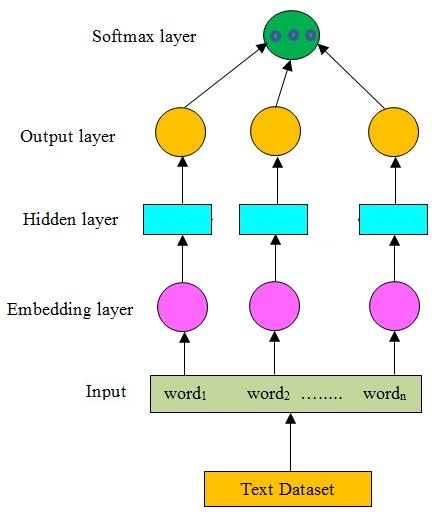

Please remember that in **Part D**,
* we built a TF data pipeline
* we configured a **Keras `TextVectorization` layer** for text preprocessing and tokenization
* we adopted the **Keras `TextVectorization` layer** onto the train dataset
* we applied the **Keras `TextVectorization` layer** to the train, validation, and test datasets
* we finalized the **TF data pipeline** by configuring it

In this part, we will use these **train, validation, and test** datasets.
#-------------------------------------------------------------------------------

Please remember that in **Part D**,
* we built a TF data pipeline
* we configured a **Keras `TextVectorization` layer** for text preprocessing and tokenization
* we adopted the **Keras `TextVectorization` layer** onto the train dataset
* we applied the **Keras `TextVectorization` layer** to the train, validation, and test datasets
* we finalized the **TF data pipeline** by configuring it

In this part, we will use these **train, validation, and test** datasets.

time: 221 ms (started: 2023-07-21 12:26:47 +00:00)


## Keras Embedding Layer

Keras Embedding Layer turns positive **integers (indexes)** into ***dense vectors of fixed size***.

**Important Arguments**:
* ***input_dim***: Integer. **Size of the vocabulary**, i.e. maximum integer index + 1.
* ***output_dim***: Integer. **Dimension** of the dense embedding.
* ***input_length***: **Length of input** sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).

**Input shape**: 2D tensor with shape: (batch_size, input_length).

**Output shape**: 3D tensor with shape: (batch_size, input_length, output_dim).

For more information, visit the [Keras official web site](https://keras.io/api/layers/core_layers/embedding/).
#-------------------------------------------------------------------------------
## Keras Katıştırma Katmanı

Keras Katıştırma Katmanı, pozitif **tamsayıları (dizinleri)** ***sabit boyutlu yoğun vektörlere*** dönüştürür.

**Önemli Argümanlar**:
* ***input_dim**: Tamsayı. **Kelime boyutu**, yani maksimum tamsayı dizini + 1.
* ***output_dim**: Tamsayı. Yoğun gömmenin **boyutu**.
* ***giriş_uzunluğu***: **Giriş uzunluğu** dizileri, sabit olduğunda. Bu bağımsız değişken, yukarı akış yönünde Düzleştir ve ardından Yoğun katmanları bağlayacaksanız gereklidir (bu olmadan, yoğun çıktıların şekli hesaplanamaz).

**Giriş şekli**: 2D tensör ve şekil: (batch_size, input_length).

**Çıktı şekli**: Şu şekle sahip 3D tensör: (batch_size, input_length, output_dim).

Daha fazla bilgi için [Keras resmi web sitesini](https://keras.io/api/layers/core_layers/embedding/) ziyaret edin.

time: 277 ms (started: 2023-07-21 12:26:47 +00:00)


## Let's build a simple model with an embedding layer
## Gömme katmanıyla basit bir model oluşturalım

I will use the **Keras Functional API** to build the model.
You can learn the details of this API [here](https://keras.io/guides/functional_api/).

In **Part D**, thanks to **Keras `TextVectorization` layer**, we converted the reviews into a ***`max_len`*** fixed-size vector of integers.

Therefore, the **input layer** of the model would expect a sequence of ***`max_len`*** integers.

Moreover, in **Part D**, we also decided the size of the dictionary: ***`vocab_size`***. We will use this parameter to set up the **embedding layer**.

As a last reminder, during the **Part B** (EDA), we learnt that there are **32 classes** (`number_of_categories`) in the given dataset.  

#-------------------------------------------------------------------------------

Modeli oluşturmak için **Keras Functional API** kullanacağım.
Bu API'nin ayrıntılarını [buradan](https://keras.io/guides/functional_api/) öğrenebilirsiniz.

**Kısım D**'de **Keras `TextVectorization` katmanı** sayesinde incelemeleri ***`max_len`*** sabit boyutlu bir tamsayı vektörüne dönüştürdük.

Bu nedenle, modelin **giriş katmanı** bir ***`max_len`*** tam sayı dizisi bekler.

Ayrıca **Bölüm D**'de sözlüğün boyutunu da belirledik: ***`vocab_size`***. **Gömme katmanını** ayarlamak için bu parametreyi kullanacağız.

Son bir hatırlatma olarak, **Kısım B** (EDA) sırasında, verilen veri kümesinde **32 sınıf** (`kategori_sayısı`) olduğunu öğrendik.


In [116]:
# Embedding size for each token
# Her belirteç için gömme boyutu
embed_dim = 16
# Hidden layer size in feed forward network
# İleri beslemeli ağda gizli katman boyutu
feed_forward_dim = 64
def create_model_FFN():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size,
                                       output_dim=embed_dim,
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    x = layers.Flatten()(x)
    dense_layer = layers.Dense(feed_forward_dim, activation='relu')
    x = dense_layer(x)
    x = layers.Dropout(.5)(x)
    outputs = layers.Dense(number_of_categories)(x)

    model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_FFN')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)
    return model

model_FFN=create_model_FFN()

time: 149 ms (started: 2023-07-21 12:26:47 +00:00)


In [117]:
model_FFN.summary()

Model: "model_FFN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding (Embedding)       (None, 40, 16)            1600000   
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 64)                41024     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
Total params: 1,643,104
Trainable params: 1,643,104
Non-t

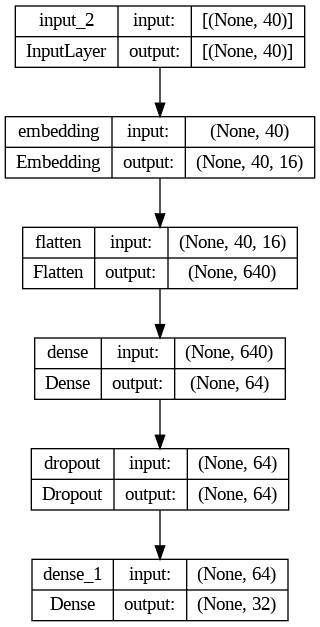

time: 259 ms (started: 2023-07-21 12:26:47 +00:00)


In [118]:
tf.keras.utils.plot_model(model_FFN,show_shapes=True)

## Train

As you know, in **Part D**, we have the ***train, validation, and test datasets*** ready to input any ML/DL models. Now, we will use the train and validation datasets to train the model.

#-------------------------------------------------------------------------------
## Train

Bildiğiniz gibi, **Bölüm D**'de, herhangi bir ML/DL modelini girmeye hazır ***eğitim, doğrulama ve test veri kümelerimiz*** var. Şimdi, modeli eğitmek için tren ve doğrulama veri setlerini kullanacağız.

In [119]:
history=model_FFN.fit(train_ds, validation_data=val_ds ,verbose=2, epochs=7)

Epoch 1/7
237/237 - 6s - loss: 3.3345 - sparse_categorical_accuracy: 0.1587 - val_loss: 2.7813 - val_sparse_categorical_accuracy: 0.4573 - 6s/epoch - 25ms/step
Epoch 2/7
237/237 - 5s - loss: 1.8314 - sparse_categorical_accuracy: 0.5809 - val_loss: 1.0780 - val_sparse_categorical_accuracy: 0.8197 - 5s/epoch - 23ms/step
Epoch 3/7
237/237 - 5s - loss: 0.8026 - sparse_categorical_accuracy: 0.8229 - val_loss: 0.6646 - val_sparse_categorical_accuracy: 0.8684 - 5s/epoch - 20ms/step
Epoch 4/7
237/237 - 6s - loss: 0.4094 - sparse_categorical_accuracy: 0.9190 - val_loss: 0.5395 - val_sparse_categorical_accuracy: 0.8810 - 6s/epoch - 25ms/step
Epoch 5/7
237/237 - 5s - loss: 0.2396 - sparse_categorical_accuracy: 0.9554 - val_loss: 0.4966 - val_sparse_categorical_accuracy: 0.8852 - 5s/epoch - 20ms/step
Epoch 6/7
237/237 - 5s - loss: 0.1456 - sparse_categorical_accuracy: 0.9767 - val_loss: 0.4849 - val_sparse_categorical_accuracy: 0.8882 - 5s/epoch - 20ms/step
Epoch 7/7
237/237 - 5s - loss: 0.0990 - 

Let's observe the **accuracy** and the **loss** values during the training at each epoch:

Her çağda eğitim sırasında **doğruluk** ve **kayıp** değerlerini gözlemleyelim:

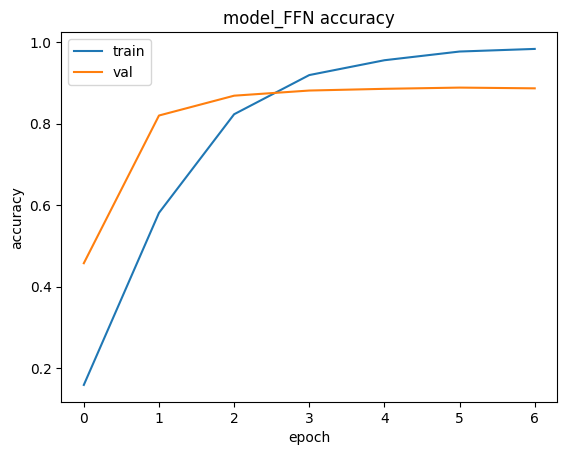

time: 267 ms (started: 2023-07-21 12:27:36 +00:00)


In [120]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_FFN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

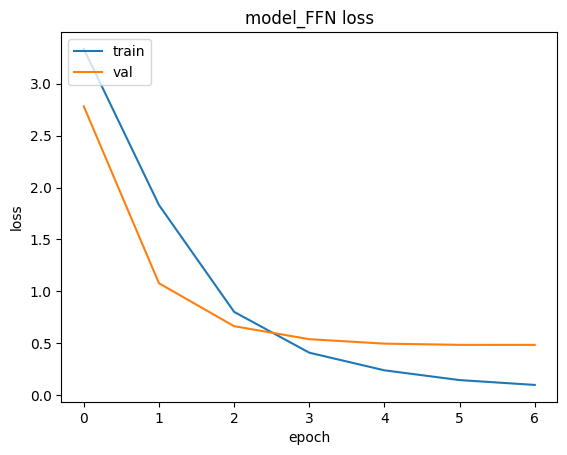

time: 274 ms (started: 2023-07-21 12:27:36 +00:00)


In [121]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_FFN loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

You can observe the ***underfitting*** and ***overfitting*** behaviors of the model and decide how to handle these situations by **tuning** the hyper-parameters.

In this tutorial, I will not go into the details of ***hiper-parameter tuning, underfitting and overfitting*** concepts. However, in **PART K:** HYPERPARAMETER OPTIMIZATION (TUNING), UNDERFITTING, AND OVERFITTING, we will see these concepts in detail.
#-------------------------------------------------------------------------------

Modelin ***yetersiz uydurma*** ve ***fazla uydurma*** davranışlarını gözlemleyebilir ve hiper parametreleri **ayarlayarak** bu durumlarla nasıl başa çıkacağınıza karar verebilirsiniz.

Bu eğitimde, ***hiper-parametre ayarlama, yetersiz uydurma ve fazla uydurma*** kavramlarının ayrıntılarına girmeyeceğim. Ancak **BÖLÜM K:** HİPERPARAMETRE OPTİMİZASYONU (AYARLAMA), UNDERFITTING VE OVERFITTING'de bu kavramları ayrıntılı olarak göreceğiz.

time: 287 ms (started: 2023-07-21 12:27:36 +00:00)


## Save the trained model

You can save a Keras model for future use. If you want to learn about **saving and loading** a TF/Keras model, you can check out my tutorial in English or Turkish.

* [TF SavedModel vs HDF5: How to save TF & Keras Models with  Custom Objects?](https://youtu.be/F--_SOlufpE)
* [TF SavedModel vs HDF5: TF & Keras Modellerini  Nasıl  Saklamalıyız? (in Turkish)](https://youtu.be/w4xmEPnUHko)
#-------------------------------------------------------------------------------
## Eğitilen modeli kaydedin

Gelecekte kullanmak üzere bir Keras modelini kaydedebilirsiniz. Bir TF/Keras modelini **kaydetme ve yükleme** hakkında bilgi edinmek isterseniz, İngilizce veya Türkçe öğreticime göz atabilirsiniz.

* [TF SavedModel vs HDF5: TF & Keras Modelleri Özel Nesnelerle Nasıl Kaydedilir?](https://youtu.be/F--_SOlufpE)
* [TF SavedModel vs HDF5: TF & Keras Modellerini Nasıl Saklamalıyız? (Türkçe)](https://youtu.be/w4xmEPnUHko)

In [122]:
tf.keras.models.save_model(model_FFN, 'MultiClassTextClassification_FFN')

time: 1.01 s (started: 2023-07-21 12:27:36 +00:00)


## Test

We can test the trained model with the test dataset:

#-----------------------------------------------------
## Ölçek

Eğitilmiş modeli test veri seti ile test edebiliriz:

In [123]:
loss, accuracy = model_FFN.evaluate(test_ds)
print("Test accuracy: ", accuracy)

1319/1319 [==============================] - 3s 3ms/step - loss: 0.4615 - sparse_categorical_accuracy: 0.8909
Test accuracy:  0.8908619284629822
time: 3.44 s (started: 2023-07-21 12:27:37 +00:00)


## Predictions

We can use the **trained model** `predict()` method to **predict** the class of the given reviews as follows:
#-------------------------------------------------------------------------------
## Tahminler

Verilen incelemelerin sınıfını **tahmin etmek** için **eğitimli model** `predict()` yöntemini şu şekilde kullanabiliriz:

In [124]:
preds = model_FFN.predict(test_ds)
preds = preds.argmax(axis=1)

1319/1319 [==============================] - 3s 2ms/step
time: 3.69 s (started: 2023-07-21 12:27:41 +00:00)


We can also get the **actual (true)** class of the given reviews as follows:

Ayrıca verilen incelemelerin **gerçek (gerçek)** sınıfını şu şekilde alabiliriz:

In [125]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

time: 20.6 s (started: 2023-07-21 12:27:44 +00:00)


By comparing the ***`preds`*** and the ***`actuals`*** values, we can **measure** the model performance as below.

***`preds`*** ve ***`gerçek`*** değerlerini karşılaştırarak model performansını aşağıdaki gibi **ölçebiliriz**.

## Classification Report

Since we are dealing with a **multi-class text classification**, it is a good idea to generate a **classification report** to observe the performance of the model for ***each class***. We can use the [SKLearn `classification_report()` method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to build a text report showing the main classification **metrics**.

Report is the summary of the **precision, recall, F1** score for ***each class***.

The reported ***averages*** include:
* **macro average** (averaging the unweighted mean per label),
* **weighted average** (averaging the support-weighted mean per label),  
* **sample average** (only for multilabel classification),
* **micro average** (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

#-------------------------------------------------------------------------------

## Sınıflandırma Raporu

**Çok sınıflı bir metin sınıflandırması** ile uğraştığımız için, modelin performansını ***her sınıf*** için gözlemlemek üzere bir **sınıflandırma raporu** oluşturmak iyi bir fikirdir. Ana sınıflandırma **metriklerini** gösteren bir metin raporu oluşturmak için [SKLearn `classification_report()` yöntemini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) kullanabiliriz.

Rapor, ***her sınıf*** için **kesinlik, hatırlama, F1** puanının özetidir.

Bildirilen ***ortalamalar*** şunları içerir:
* **makro ortalama** (etiket başına ağırlıklandırılmamış ortalamanın ortalaması),
* **ağırlıklı ortalama** (etiket başına destek ağırlıklı ortalamanın ortalaması),
* **örnek ortalaması** (yalnızca çok etiketli sınıflandırma için),
* **mikro ortalama** (toplam gerçek pozitiflerin, yanlış negatiflerin ve yanlış pozitiflerin ortalaması alınarak), aksi halde doğruluğa karşılık geldiğinden ve tüm metrikler için aynı olacağından, yalnızca çoklu etiket veya bir sınıf alt kümesiyle çoklu sınıf için gösterilir.

In [126]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9107    0.8095    0.8571      2709
           1     0.9352    0.9105    0.9227      2458
           2     0.7790    0.9133    0.8408      2732
           3     0.8416    0.8363    0.8389      2560
           4     0.9288    0.8909    0.9095      2769
           5     0.9881    0.8881    0.9354      2618
           6     0.8780    0.8613    0.8696      2725
           7     0.6139    0.8183    0.7015      2378
           8     0.9743    0.9496    0.9618      2758
           9     0.9854    0.8434    0.9089      2235
          10     0.9417    0.9383    0.9400      2738
          11     0.8912    0.8813    0.8862      2603
          12     0.9337    0.9170    0.9253      2688
          13     0.9324    0.7850    0.8523      2265
          14     0.8803    0.9567    0.9169      2682
          15     0.6252    0.8088    0.7052      2683
          16     0.9445    0.9223    0.9333      2768
          17     0.9802    

In multi-class classification, you need to be careful for the number of samples in each class (**support** value in the above table). If there is inbalance among the classes you need to apply some actions.

Moreover, observe the ***precision, recall, and F1*** scores of each class and compare them with the ***average*** values of these metrics.
#-------------------------------------------------------------------------------
Çok sınıflı sınıflandırmada, her sınıftaki örnek sayısına (yukarıdaki tablodaki **destek** değeri) dikkat etmeniz gerekir. Sınıflar arasında dengesizlik varsa bazı işlemler uygulamanız gerekir.

Ayrıca, her sınıfın ***kesinlik, hatırlama ve F1*** puanlarını gözlemleyin ve bu ölçümlerin ***ortalama*** değerleriyle karşılaştırın.

time: 280 ms (started: 2023-07-21 12:28:05 +00:00)


## Confusion Matrix

**Confusion Matrix** is used to know the performance of a Machine learning model at classification. The results are presented in a ***matrix*** form. Confusion Matrix gives a comparison between **Actual** and **Predicted** values. The numbers on the **diagonal** are the number of the **correct predictions**.
#-------------------------------------------------------------------------------
## Karışıklık Matrisi

**Karışıklık Matrisi**, bir Makine öğrenimi modelinin sınıflandırmadaki performansını bilmek için kullanılır. Sonuçlar bir ***matris*** biçiminde sunulur. Karışıklık Matrisi, **Gerçek** ve **Öngörülen** değerler arasında bir karşılaştırma sağlar. **köşegen** üzerindeki sayılar **doğru tahminlerin** sayısıdır.

In [127]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,
# which compares the y_test and y_pred
# Karışıklık matrisi oluşturma,
# y_test ve y_pred'i karşılaştıran
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_category.values() ,columns = id_to_category.values())

time: 42.1 ms (started: 2023-07-21 12:28:05 +00:00)


Below, you can observe the distribution of predictions over the classes.

Aşağıda tahminlerin sınıflara göre dağılımını görebilirsiniz.

In [128]:
cm_df

,alisveris,spor,finans,bilgisayar,internet,mucevher-saat-gozluk,mobilya-ev-tekstili,icecek,otomotiv,enerji,...,egitim,mekan-ve-eglence,sigortacilik,beyaz-esya,gida,emlak-ve-insaat,ulasim,kargo-nakliyat,giyim,elektronik
alisveris,2193,16,11,40,6,1,11,82,1,4,...,11,4,19,9,7,0,2,17,5,0
spor,13,2238,15,4,3,0,15,35,0,1,...,9,2,2,0,1,0,1,9,0,0
finans,3,10,2495,8,8,0,37,45,3,0,...,3,0,26,11,0,0,0,25,1,2
bilgisayar,13,5,56,2141,95,0,43,49,0,1,...,2,4,0,14,3,1,3,12,2,0
internet,0,8,29,87,2467,0,36,10,1,0,...,3,3,5,2,0,0,0,15,0,0
mucevher-saat-gozluk,0,1,0,4,0,2325,17,17,0,2,...,8,0,0,10,11,12,8,18,15,15
mobilya-ev-tekstili,4,4,103,84,51,0,2347,41,1,1,...,4,3,2,12,1,2,0,8,0,0
icecek,12,2,71,19,1,0,29,1946,25,3,...,4,8,15,76,4,3,2,21,11,3
otomotiv,0,0,0,0,0,0,0,45,2619,0,...,0,2,0,68,3,0,0,0,5,1
enerji,5,3,2,2,1,6,11,23,3,1885,...,1,0,0,67,16,6,4,15,31,42


time: 36.7 ms (started: 2023-07-21 12:28:05 +00:00)


We can also visualize the confusion matrix as the **ratios** of the predictions over the classes. The ratios on the **diagonal** are the ratios of the **correct predictions**.

Karışıklık matrisini, sınıflar üzerindeki tahminlerin **oranları** olarak da görselleştirebiliriz. **Köşegen** üzerindeki oranlar **doğru tahminlerin** oranlarıdır.

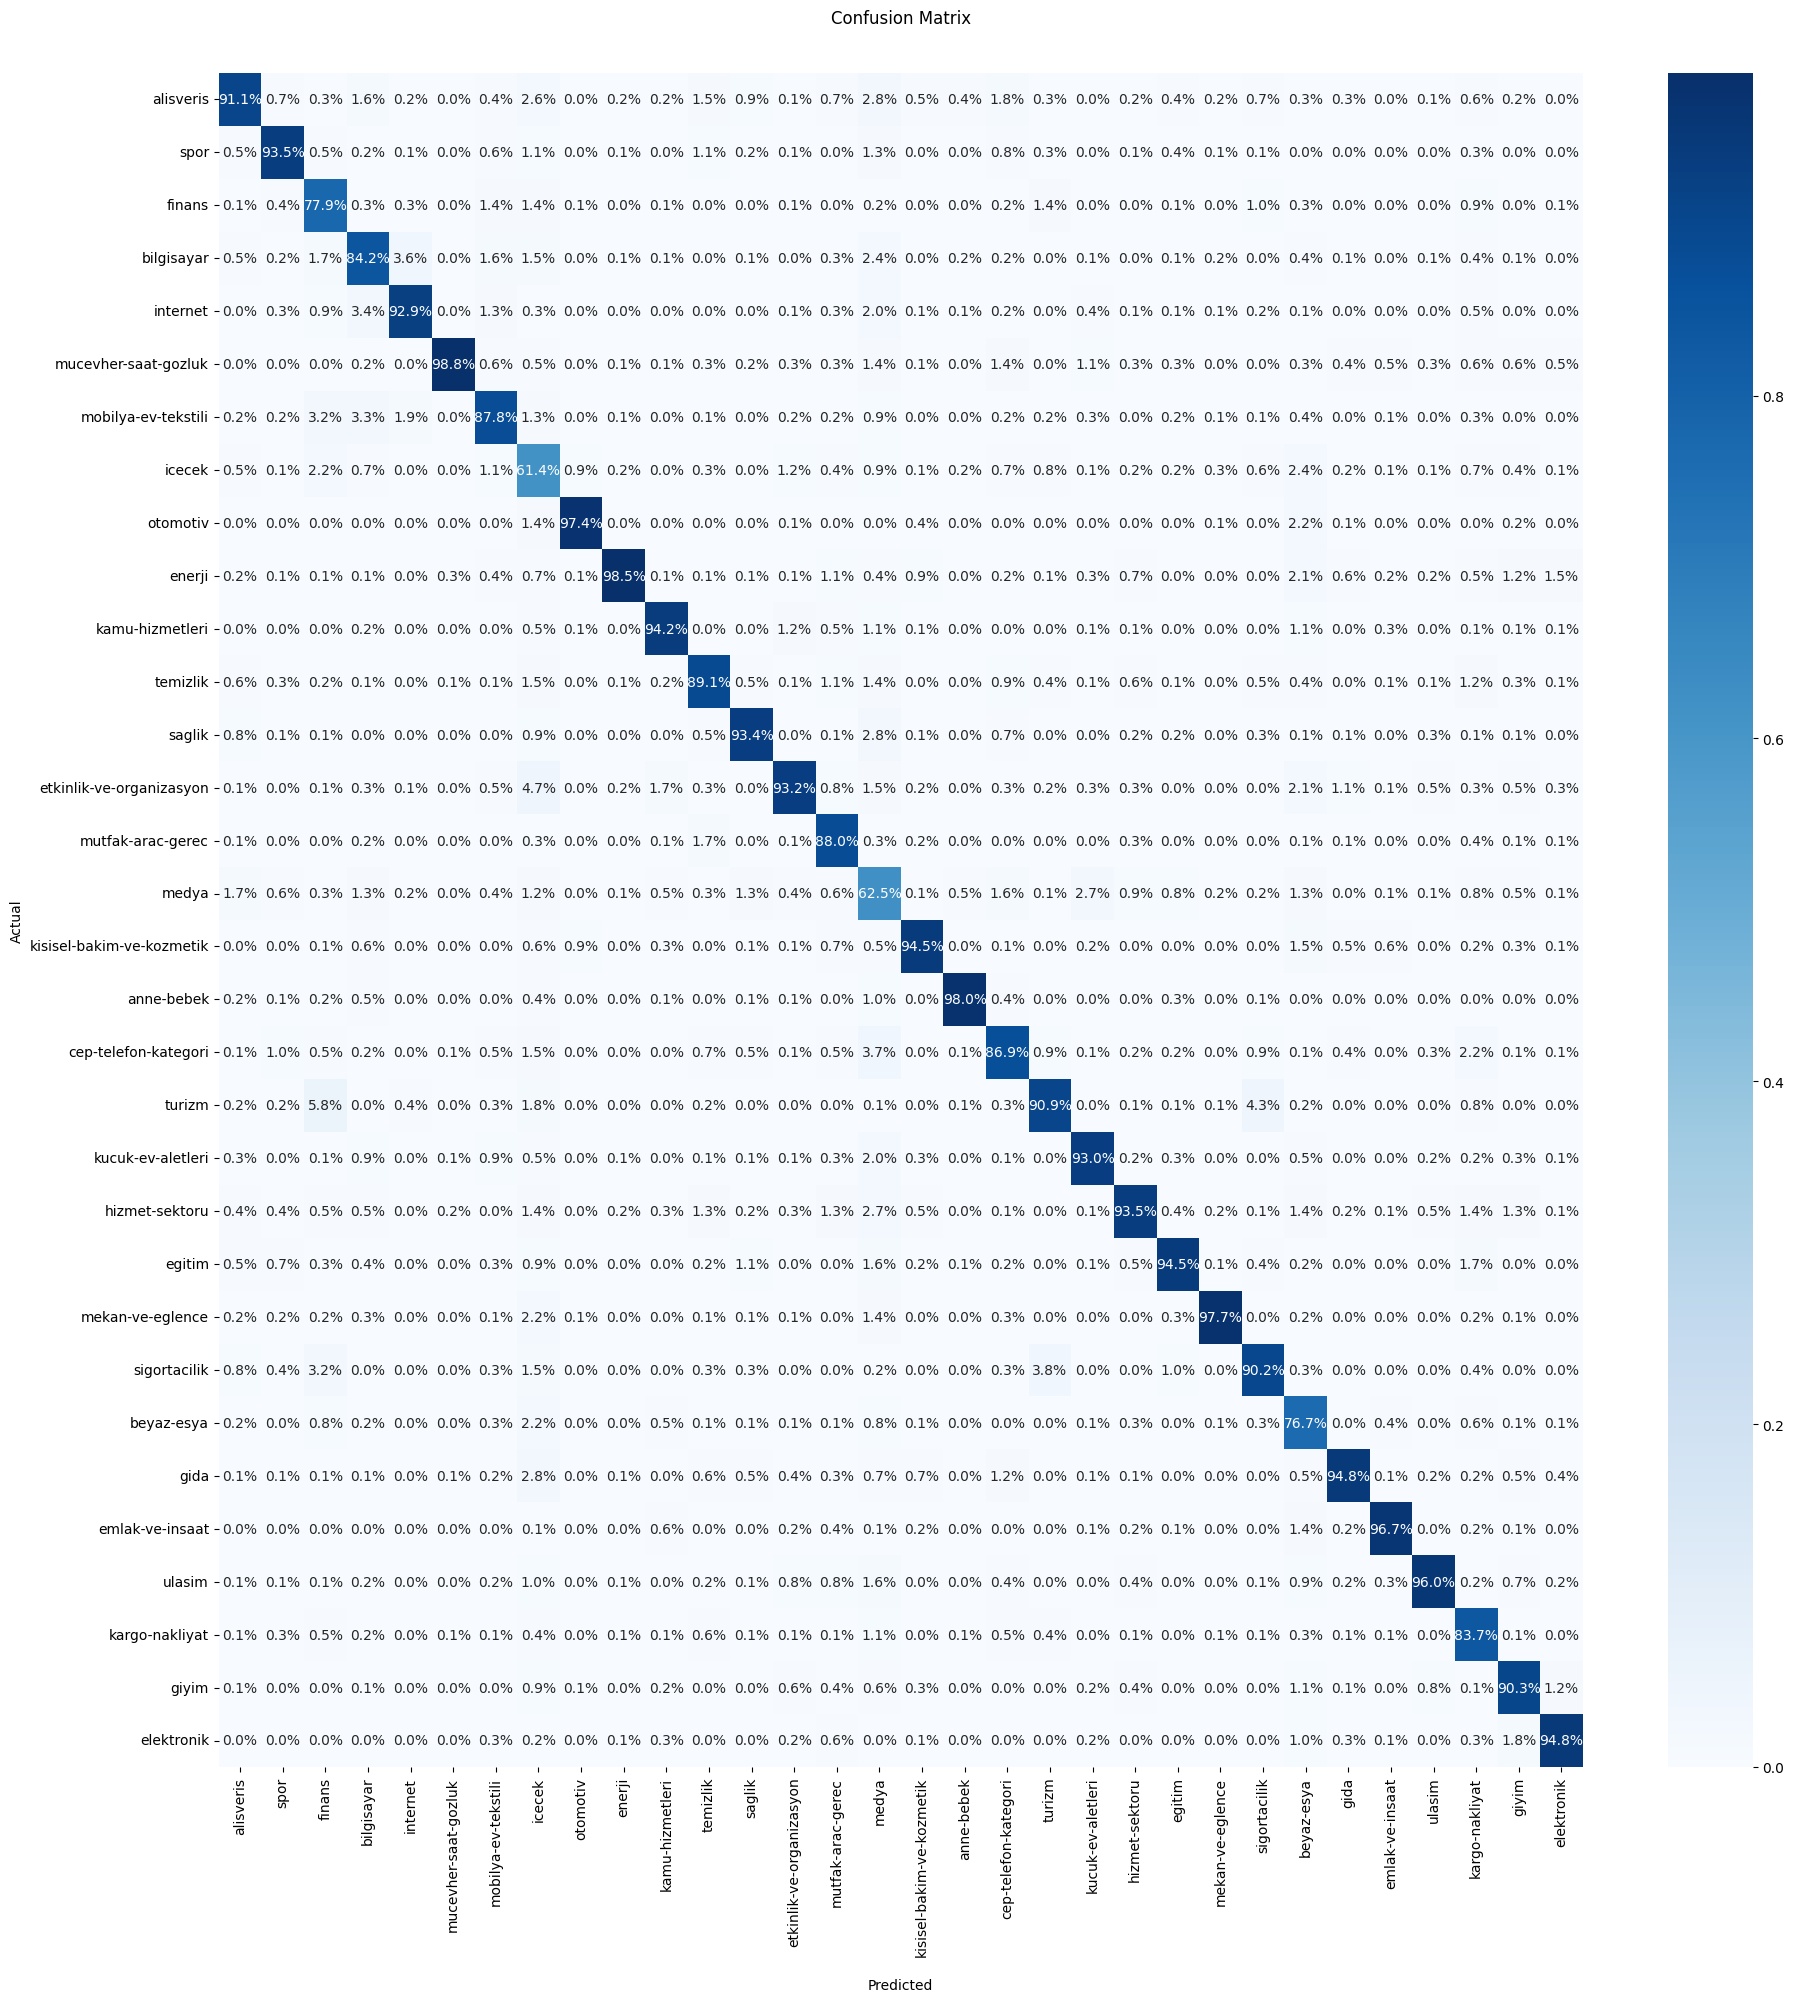

time: 3.49 s (started: 2023-07-21 12:28:05 +00:00)


In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,22))
ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(id_to_category.values())
ax.yaxis.set_ticklabels(id_to_category.values())

## Display the visualization of the Confusion Matrix.
## Karışıklık Matrisinin görselleştirmesini görüntüleyin.
plt.show()

Please, observe the ***correctly classified*** sample ratios of each class.

You **may need to take some actions** for some classes if the correctly predicted sample ratios are relatively low.
#-------------------------------------------------------------------------------
Lütfen her sınıfın ***doğru sınıflandırılmış*** örnek oranlarını dikkate alınız.

Doğru tahmin edilen örnek oranları nispeten düşükse bazı sınıflar için **bazı işlemler yapmanız** gerekebilir.

time: 3.51 s (started: 2023-07-21 12:28:05 +00:00)


## Summary

In this part,
* we created a Deep Learning model with an **Embedding layer** to classify text into ***multi-classes***,
* we **trained** and **tested** the model,
* we observed the **model performance** using **Classification Report** and **Confusion Matrix**,
* we pointed out the importance of the **balanced** dataset and the performance on each class.

In the next part, we will design another Deep Learning model by using a ***convolutional layer (Conv1D)***.

#-------------------------------------------------------------------------------
## Özet

Bu bölümde,
* Metni ***çoklu sınıflara*** göre sınıflandırmak için **Gömme katmanı** ile bir Derin Öğrenme modeli oluşturduk,
* modeli **eğittik** ve **test ettik**,
* **Sınıflandırma Raporu** ve **Karışıklık Matrisi** kullanarak **model performansını** gözlemledik,
* **dengeli** veri kümesinin ve her sınıftaki performansın önemine dikkat çektik.

Bir sonraki bölümde, ***evrişimli bir katman (Conv1D)*** kullanarak başka bir Derin Öğrenme modeli tasarlayacağız.


time: 3.52 s (started: 2023-07-21 12:28:05 +00:00)


## Let's build a model with a Conv1D layer

I would like to kindly remind you the important parameters in the Keras ```Conv1D``` layer briefly.

```
tf.keras.layers.Conv1D(
    filters,
    kernel_size,
    padding="valid",
    activation=None
    )
```
* **filters:** Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
* **kernel_size:** An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.  

* **padding:** One of "valid", "same" or "causal" (case-insensitive).

  * "valid" means no padding.
  * "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
  * "causal" results in causal (dilated) convolutions, e.g. output[t] does not depend on input[t+1:]. Useful when modeling temporal data where the model should not violate the temporal order.

* **activation:** Activation function to use. If you don't specify anything, no activation is applied (see keras.activations).  

In our model, I will use 3 ```Conv1D``` layers and set the following values for their parameters:

* **filters:** I will use 256 filters in the first ```Conv1D``` layer, 128 filters in the second and the last ```Conv1D``` layers.

* **kernel_size:** The first ```Conv1D``` layer will take care of 7 consecutive inputs, the second one will make use of 5 consecutive inputs, and the last one will take care of 3 consecutive inputs.

* **padding:** I will use the "```same```" value for padding so that after convolution the size of the output tensor will be the same as the input vector.

* **activation:** I will set activation parameter to 'relu' as we use 'relu' activation function for intermediate layers usually.

#-------------------------------------------------------------------------------
## Conv1D katmanıyla bir model oluşturalım

Keras ``Conv1D``` katmanındaki önemli parametreleri kısaca hatırlatmak isterim.

```
tf.keras.layers.Conv1D(
    filtreler,
    kernel_size,
    dolgu = "geçerli",
    aktivasyon=Yok
    )
```
* **filtreler:** Tamsayı, çıktı alanının boyutluluğu (yani evrişimdeki çıktı filtrelerinin sayısı).
* **kernel_size:** 1D konvolüsyon penceresinin uzunluğunu belirten bir tamsayı veya tek bir tamsayı demet/listesi.

* **doldurma:** "geçerli", "aynı" veya "nedensel" (büyük/küçük harfe duyarsız) seçeneklerinden biri.

  * "geçerli", doldurma olmadığı anlamına gelir.
  * "aynı", çıktının girişle aynı yükseklik/genişlik boyutuna sahip olması için girişin soluna/sağına veya yukarı/aşağısına eşit şekilde sıfırlarla doldurmayla sonuçlanır.
  * "nedensel", nedensel (genişletilmiş) konvolüsyonlarla sonuçlanır, örn. çıkış[t], giriş[t+1:]'ye bağlı değildir. Modelin zamansal sırayı ihlal etmemesi gereken zamansal verileri modellerken kullanışlıdır.

* **aktivasyon:** Kullanılacak aktivasyon işlevi. Hiçbir şey belirtmezseniz aktivasyon uygulanmaz (bkz. keras.activations).

Modelimizde 3 adet ``Conv1D``` katmanı kullanacağım ve parametreleri için aşağıdaki değerleri ayarlayacağım:

* **filters:** İlk ```Conv1D``` katmanında 256, ikinci ve son ```Conv1D``` katmanlarında 128 filtre kullanacağım.

* **kernel_size:** İlk ```Conv1D``` katmanı 7 ardışık girdiyle ilgilenecek, ikincisi 5 ardışık girişi kullanacak ve sonuncusu 3 ardışık girdiyle ilgilenecektir.

* **padding:** Doldurma için "```same```" değerini kullanacağım, böylece konvolüsyondan sonra çıkış tensörünün boyutu giriş vektörü ile aynı olacaktır.

* **aktivasyon:** Biz genellikle ara katmanlar için 'relu' aktivasyon fonksiyonunu kullandığımız için aktivasyon parametresini 'relu' olarak ayarlayacağım.


In [130]:
embed_dim = 16  # Embedding size for each token/Her belirteç için gömme boyutu
feed_forward_dim = 64  # Hidden layer size in feed forward network/İleri beslemeli ağda gizli katman boyutu

def create_model_Conv1D():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size,
                                       output_dim=embed_dim,
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    x = layers.Conv1D(filters=256, kernel_size=7,
                      padding='same', activation='relu')(x)
    #x = layers.MaxPooling1D(pool_size=2)(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Conv1D(filters=128, kernel_size=5,
                      padding='same', activation='relu')(x)
    x = layers.Conv1D(filters=128, kernel_size=3,
                      padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    #x = layers.Dropout(0.5)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(feed_forward_dim, activation='sigmoid')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens,
                        outputs=outputs, name='model_Conv1D')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)

    return model
model_Conv1D=create_model_Conv1D()

time: 285 ms (started: 2023-07-21 12:28:09 +00:00)


In [131]:
model_Conv1D.summary()

Model: "model_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 40, 16)            1600000   
                                                                 
 conv1d (Conv1D)             (None, 40, 256)           28928     
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 128)           163968    
                                                                 
 conv1d_2 (Conv1D)           (None, 40, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                      

Remember that at Part D, the input text (review) is encoded into 40 tokens (integers). Therefore, in the above summary, you see this first line:

```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_17 (InputLayer)       [(None, 40)]              0         
 ```
 Here ```None``` refers the batch size.

 After getting the input, we project it to a new representation using the ```Embedding``` layer with a dimension 16, as seen below:

 ```
  embedding_15 (Embedding)    (None, 40, 16)            1600000   
 ```
Thus, the output dimension of the ```Embedding``` layer is ```(BatchSize=Any, input_size=40, embedding_dimension=16)```. Basically, we convert a 40 integer numbers (tokens) to a new representation such that **each integer (token) is now represented by 16 float numbers**. Note that during each training epoch, the model will learn how to represent these integers with proper (better) conversion as a part of backpropagation.

With the new representation, we can now apply 1 dimensional convolutional transformation. The output dimension of the ```conv1d``` layer will be

```
conv1d_33 (Conv1D)          (None, 40, 256)           28928     
```
If you check the model, the ```strides``` parameter is not provided. Therefore, **1** is assigned as the default value to the ```strides``` parameter. Another important parameter ```padding``` is set ```same```. Because of these parameter values, the output dimension of the ```conv1d``` layer is ```(BatchSize=Any, input_size=40, convolved_value (number_of_filters)=256)```. If you choose other values for the ```strides``` and ```padding``` parameters you will end up with a different ***convolved_value***. Also, note that the ```kernel_size``` is 7.

With the first ```conv1d``` layer, we convert the ***representation*** of a token from 16 float numbers to a new representation such that **each token is now represented by 256 float numbers**. Note that during each training epoch, the model will learn how to fill in **256 filters with kernel_size=7** so that it can end up with a better conversion as a part of backpropagation.

The next layer is another ```conv1d``` layer is ```(BatchSize=Any, input_size=40, colvolved_value (number_of_filters)=128)```. Also, note that this time ```kernel_size``` is 5.

The last ```conv1d``` layer is ```(BatchSize=Any, input_size=40, colvolved_value (number_of_filters)=128)```with a ```kernel_size``` is 3.

As a side note: here, I propose you a sample model with 3 ```conv1d``` layers. You can try other architectures. For example, you can add ```drop``` layer in between ```conv1d``` layers if you think that your model begins to ***memorize (overfit)*** the data. Or you can decrease the number of ```conv1d``` layers in the model for the same reason.

The ```kernel_size``` and the ```number_of_filters``` can be guessed by experience. As a rule of thumb, you can prefer bigger numbers for the first layer, smaller numbers for the next layers as in the above model. Essentialy, you need to try and observe how your model behaves with your data.

For downsize the output dimension, you can use ```
max_pooling1d``` and ```flatten``` layers after conv1d layers.

```
conv1d_35 (Conv1D)          (None, 40, 128)           49280

max_pooling1d_15 (MaxPoolin  (None, 20, 128)          0

flatten_15 (Flatten)        (None, 2560)              0         
  ```

  Since the ```pool_size``` is set 2 for the ```max_pooling1d``` layer, the number of tokens is downsized to half (from 40 to 20).

  The ```flatten``` layer just converts the  (None, 20, 128) input to a flat (None, 20*128= 2560) output.

  After then, you can apply other ```dense``` layers for classification.
  You can also review the below chart to observe how we ***transform*** the data from one ***representation*** (shape) to another by using different layers.

# -----------------------------------------------------------------------------

D Bölümünde giriş metninin (inceleme) 40 belirteç (tamsayı) olarak kodlandığını unutmayın. Bu nedenle, yukarıdaki özette şu ilk satırı görüyorsunuz:

```
___________________________________________________________________
 Katman (tip) Çıktı Şekli Param #
===============================================================
 input_17 (InputLayer) [(Yok, 40)] 0
 ```
 Burada ``Yok``` parti boyutunu ifade eder.

 Girdiyi aldıktan sonra, aşağıda görüldüğü gibi 16 boyutlu "Gömme" katmanını kullanarak onu yeni bir temsile yansıtıyoruz:

 ```
  embdding_15 (Gömülü) (Yok, 40, 16) 1600000
 ```
Böylece, ``Embedding``` katmanının çıktı boyutu ```(BatchSize=Any, input_size=40, embedding_dimension=16)``` şeklindedir. Temel olarak, 40 tam sayıyı (belirteç) yeni bir temsile dönüştürürüz, öyle ki **her tam sayı (belirteç) artık 16 kayan sayıyla temsil edilir**. Her eğitim döneminde modelin, geri yayılımın bir parçası olarak bu tamsayıları uygun (daha iyi) dönüşümle nasıl temsil edeceğini öğreneceğini unutmayın.

Yeni temsil ile artık 1 boyutlu konvolüsyonel dönüşümü uygulayabiliriz. ```conv1d``` katmanının çıktı boyutu şu olacaktır:

```
conv1d_33 (Dönş1D) (Yok, 40, 256) 28928
```
Modeli kontrol ederseniz, ``strides``` parametresi sağlanmadı. Bu nedenle **1**, ``stides``` parametresine varsayılan değer olarak atanır. Bir diğer önemli parametre ``padding``` ``same``` olarak ayarlanmıştır. Bu parametre değerleri nedeniyle ```conv1d``` katmanının çıkış boyutu ```(BatchSize=Any, input_size=40, convolved_value (number_of_filters)=256)``` şeklindedir. ``strides``` ve ``padding``` parametreleri için başka değerler seçerseniz, sonunda farklı bir ***convolved_value*** elde edersiniz. Ayrıca, ``kernel_size```nin 7 olduğuna dikkat edin.

İlk ```conv1d``` katmanıyla, bir jetonun ***gösterimini*** 16 değişken sayıdan yeni bir gösterime dönüştürürüz, öyle ki **her belirteç artık 256 değişken sayı ile temsil edilir**. Her eğitim döneminde, modelin **256 filtreyi kernel_size=7** ile nasıl dolduracağını öğreneceğini ve böylece geri yayılımın bir parçası olarak daha iyi bir dönüşüm elde edeceğini unutmayın.

Bir sonraki katman başka bir "conv1d"" katmanıdır: "(BatchSize=Any, input_size=40, colvolved_value (number_of_filters)=128)"". Ayrıca, bu kez ``kernel_size```nin 5 olduğuna dikkat edin.

Son ``conv1d``` katmanı ```(BatchSize=Any, input_size=40, colvolved_value (number_of_filters)=128)```dir ve ``kernel_size``` 3'tür.

Bir not olarak: Burada size 3 ```conv1d``` katmanlı örnek bir model öneriyorum. Diğer mimarileri deneyebilirsiniz. Örneğin, modelinizin verileri ***ezberlemeye (overfit)*** başladığını düşünüyorsanız, "conv1d"" katmanlarının arasına "drop" katmanını ekleyebilirsiniz. Veya aynı nedenle modeldeki ``conv1d`` katman sayısını azaltabilirsiniz.

``kernel_size``` ve ``filtrelerin_sayısı`` deneyimle tahmin edilebilir. Kural olarak, yukarıdaki modelde olduğu gibi ilk katman için daha büyük sayıları, sonraki katmanlar için daha küçük sayıları tercih edebilirsiniz. Temel olarak, modelinizin verilerinizle nasıl davrandığını denemeniz ve gözlemlemeniz gerekir.

Çıktı boyutunu küçültmek için ``` kullanabilirsiniz.
conv1d katmanlarından sonra max_pooling1d``` ve ``flatten``` katmanları.

```
conv1d_35 (Dönş1D) (Yok, 40, 128) 49280

max_pooling1d_15 (MaxPoolin (Yok, 20, 128) 0

flatten_15 (Düzleştir) (Yok, 2560) 0
  ```

  ``max_pooling1d``` katmanı için ``pool_size``` 2 olarak ayarlandığından, belirteç sayısı yarıya indirilir (40'tan 20'ye).

  ``flatten``` katmanı (Yok, 20, 128) girdisini düz (Yok, 20*128= 2560) çıktıya dönüştürür.

  Bundan sonra, sınıflandırma için diğer ``yoğun``` katmanları uygulayabilirsiniz.
  Farklı katmanlar kullanarak verileri bir ***temsilden*** (şekil) diğerine nasıl ***dönüştürdüğümüzü** gözlemlemek için aşağıdaki tabloyu da inceleyebilirsiniz.

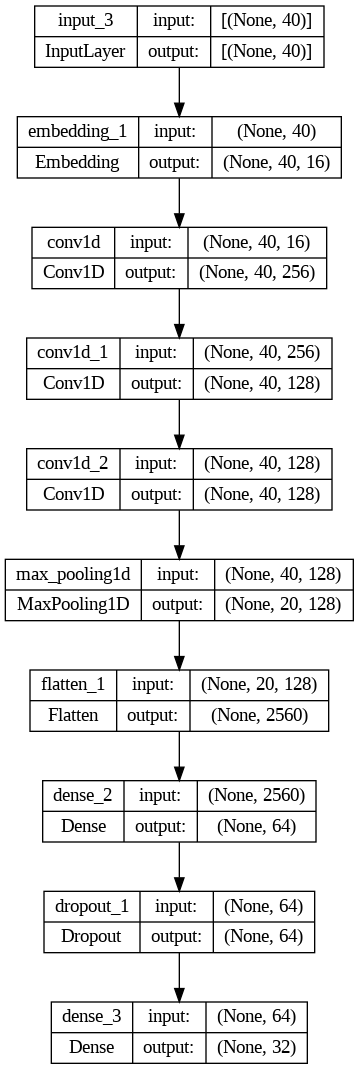

time: 169 ms (started: 2023-07-21 12:28:09 +00:00)


In [132]:
tf.keras.utils.plot_model(model_Conv1D,show_shapes=True)

## Train

As you know, in **Part D**, we have the ***train, validation, and test datasets*** ready to input any ML/DL models. Now, we will use the train and validation datasets to train the model.

## Train

Bildiğiniz gibi, **Bölüm D**'de, herhangi bir ML/DL modelini girmeye hazır ***eğitim, doğrulama ve test veri kümelerimiz*** var. Şimdi, modeli eğitmek için tren ve doğrulama veri setlerini kullanacağız.

In [133]:
history=model_Conv1D.fit(train_ds, validation_data=val_ds ,verbose=1, epochs=25)

Epoch 1/25
237/237 [==============================] - 35s 139ms/step - loss: 3.4784 - sparse_categorical_accuracy: 0.0295 - val_loss: 3.4652 - val_sparse_categorical_accuracy: 0.0331
Epoch 2/25
237/237 [==============================] - 33s 141ms/step - loss: 3.4654 - sparse_categorical_accuracy: 0.0316 - val_loss: 3.4647 - val_sparse_categorical_accuracy: 0.0331
Epoch 3/25
237/237 [==============================] - 35s 146ms/step - loss: 3.2581 - sparse_categorical_accuracy: 0.0692 - val_loss: 2.8779 - val_sparse_categorical_accuracy: 0.1436
Epoch 4/25
237/237 [==============================] - 33s 141ms/step - loss: 2.5701 - sparse_categorical_accuracy: 0.2025 - val_loss: 2.2008 - val_sparse_categorical_accuracy: 0.3642
Epoch 5/25
237/237 [==============================] - 34s 143ms/step - loss: 1.9725 - sparse_categorical_accuracy: 0.3815 - val_loss: 1.8642 - val_sparse_categorical_accuracy: 0.4657
Epoch 6/25
237/237 [==============================] - 35s 146ms/step - loss: 1.5831 -

Let's observe the **accuracy** and the **loss** values during the training:

Eğitim sırasında **doğruluk** ve **kayıp** değerlerine bakalım:

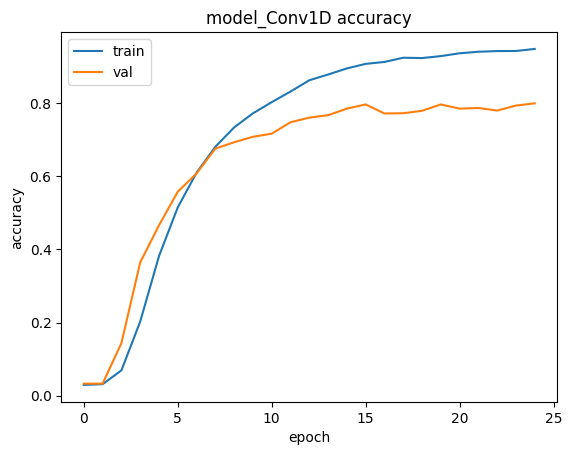

time: 241 ms (started: 2023-07-21 12:44:40 +00:00)


In [134]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_Conv1D accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

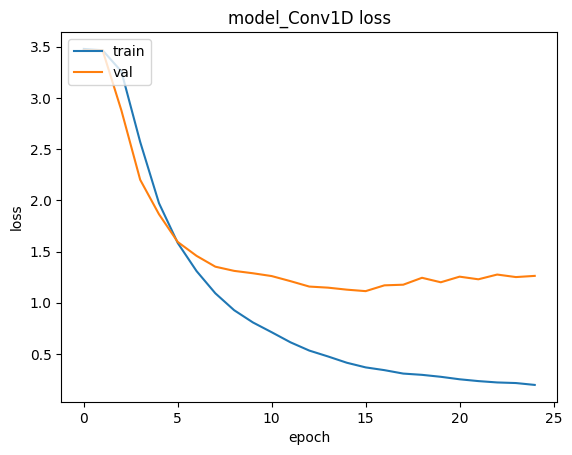

time: 261 ms (started: 2023-07-21 12:44:40 +00:00)


In [135]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_Conv1D loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

You can observe the underfitting and overfitting behaivors of the model and decide how to handle these situaitons by tuning the hiper-parameters.

In this tutorial, I will not go into the details of hiper-parameter tuning, underfitting and overfitting concepts. However, in **PART K:** HYPERPARAMETER OPTIMIZATION (TUNING), UNDERFITTING AND OVERFITTING, we will see these concepts in detail.

#-------------------------------------------------------------------------------
Modelin underfitting ve overfitting davranışlarını gözlemleyebilir ve hiper-parametreleri ayarlayarak bu durumların nasıl ele alınacağına karar verebilirsiniz.

Bu eğitimde, hiper-parametre ayarı, yetersiz uyum ve aşırı uyum kavramlarının ayrıntılarına girmeyeceğim. Ancak **BÖLÜM K:** HİPERPARAMETRE OPTİMİZASYONU (AYARLAMA), UNDERFITTING VE OVERFITTING'de bu kavramları ayrıntılı olarak göreceğiz.

## Save the trained model

## Eğitilen modeli kaydedin

In [136]:
tf.keras.models.save_model(model_Conv1D, 'MultiClassTextClassification_Conv1D')

time: 1.48 s (started: 2023-07-21 12:44:41 +00:00)


In [137]:
model_Conv1D=tf.keras.models.load_model('MultiClassTextClassification_Conv1D')

time: 618 ms (started: 2023-07-21 12:44:42 +00:00)


In [138]:
model_Conv1D.summary()

Model: "model_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 40, 16)            1600000   
                                                                 
 conv1d (Conv1D)             (None, 40, 256)           28928     
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 128)           163968    
                                                                 
 conv1d_2 (Conv1D)           (None, 40, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                      

## Test

In [139]:
loss, accuracy = model_Conv1D.evaluate(test_ds)
print("Test accuracy/Test doğruluğu: ", accuracy)

1319/1319 [==============================] - 38s 29ms/step - loss: 1.1949 - sparse_categorical_accuracy: 0.8004
Test accuracy/Test doğruluğu:  0.8003814220428467
time: 41.3 s (started: 2023-07-21 12:46:42 +00:00)


## Predictions
## Tahminler

We can use the **trained model** `predict()` method to **predict** the class of the given reviews as follows:

Verilen incelemelerin sınıfını **tahmin etmek** için **eğitimli model** `predict()` yöntemini şu şekilde kullanabiliriz:

In [140]:
preds = model_Conv1D.predict(test_ds)
preds = preds.argmax(axis=1)

1319/1319 [==============================] - 39s 29ms/step
time: 41.1 s (started: 2023-07-21 12:47:23 +00:00)


We can also get the **actual (true)** class of the given reviews as follows:

Ayrıca verilen incelemelerin **gerçek (gerçek)** sınıfını şu şekilde alabiliriz:

In [141]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

time: 20.7 s (started: 2023-07-21 12:48:04 +00:00)


By comparing the ***`preds`*** and the ***`actuals`***
values, we can **measure** the model performance as below.

***`preds`*** ve ***`gerçekler`***'i karşılaştırarak
değerler, model performansını aşağıdaki gibi **ölçebiliriz**.

## Classification Report

Since we are dealing with a **multi-class text classification**, it is a good idea to generate a **classification report** to observe the performance of the model for ***each class***. We can use the [SKLearn `classification_report()` method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to build a text report showing the main classification **metrics**.

Report is the summary of the **precision, recall, F1** score for ***each class***.

The reported ***averages*** include:
* **macro average** (averaging the unweighted mean per label),
* **weighted average** (averaging the support-weighted mean per label),  
* **sample average** (only for multilabel classification),
* **micro average** (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

# -------------------------------------------------------------------------------

## Sınıflandırma Raporu

**Çok sınıflı bir metin sınıflandırması** ile uğraştığımız için, modelin performansını ***her sınıf*** için gözlemlemek üzere bir **sınıflandırma raporu** oluşturmak iyi bir fikirdir. Ana sınıflandırma **metriklerini** gösteren bir metin raporu oluşturmak için [SKLearn `classification_report()` yöntemini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) kullanabiliriz.

Rapor, ***her sınıf*** için **kesinlik, hatırlama, F1** puanının özetidir.

Bildirilen ***ortalamalar*** şunları içerir:
* **makro ortalama** (etiket başına ağırlıklandırılmamış ortalamanın ortalaması),
* **ağırlıklı ortalama** (etiket başına destek ağırlıklı ortalamanın ortalaması),
* **örnek ortalaması** (yalnızca çok etiketli sınıflandırma için),
* **mikro ortalama** (toplam gerçek pozitiflerin, yanlış negatiflerin ve yanlış pozitiflerin ortalaması alınarak), aksi halde doğruluğa karşılık geldiğinden ve tüm metrikler için aynı olacağından, yalnızca çoklu etiket veya bir sınıf alt kümesiyle çoklu sınıf için gösterilir.

In [142]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.8113    0.7523    0.7807      2709
           1     0.8005    0.8849    0.8406      2458
           2     0.7397    0.7156    0.7274      2732
           3     0.6163    0.7578    0.6797      2560
           4     0.7864    0.8787    0.8300      2769
           5     0.9477    0.8862    0.9159      2618
           6     0.7963    0.7086    0.7499      2725
           7     0.4922    0.4251    0.4562      2378
           8     0.9586    0.8988    0.9278      2758
           9     0.8442    0.8219    0.8329      2235
          10     0.7974    0.8510    0.8233      2738
          11     0.7955    0.6888    0.7383      2603
          12     0.8095    0.7195    0.7619      2688
          13     0.8062    0.7091    0.7545      2265
          14     0.7196    0.8926    0.7968      2682
          15     0.5374    0.6217    0.5765      2683
          16     0.8651    0.9039    0.8841      2768
          17     0.9707    

In multi-class classification, you need to be careful for the number of samples in each class (**support** value in the above table). If there is inbalance among the classes you need to apply some actions.

Moreover, observe the ***precision, recall, and F1*** scores of each class and compare them with the ***average*** values of these metrics.

# ------------------------------------------------------------------------------

Çok sınıflı sınıflandırmada, her sınıftaki örnek sayısına (yukarıdaki tablodaki **destek** değeri) dikkat etmeniz gerekir. Sınıflar arasında dengesizlik varsa bazı işlemler uygulamanız gerekir.

Ayrıca, her sınıfın ***kesinlik, hatırlama ve F1*** puanlarını gözlemleyin ve bu ölçümlerin ***ortalama*** değerleriyle karşılaştırın.

time: 1.71 s (started: 2023-07-21 13:37:38 +00:00)


## Confusion Matrix

**Confusion Matrix** is used to know the performance of a Machine learning model at classification. The results are presented in a ***matrix*** form. Confusion Matrix gives a comparison between **Actual** and **Predicted** values. The numbers on the **diagonal** are the number of the **correct predictions**.

## Karışıklık Matrisi

**Karışıklık Matrisi**, bir Makine öğrenimi modelinin sınıflandırmadaki performansını bilmek için kullanılır. Sonuçlar bir ***matris*** biçiminde sunulur. Karışıklık Matrisi, **Gerçek** ve **Öngörülen** değerler arasında bir karşılaştırma sağlar. **köşegen** üzerindeki sayılar **doğru tahminlerin** sayısıdır.

In [143]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,
# which compares the y_test and y_pred
# Karışıklık matrisi oluşturma,
# y_test ve y_pred'i karşılaştıran
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_category.values() ,
                     columns = id_to_category.values())

time: 50.1 ms (started: 2023-07-21 14:16:37 +00:00)


Below, you can observe the distribution of predictions over the classes.

Aşağıda tahminlerin sınıflara göre dağılımını görebilirsiniz.

In [144]:
cm_df

,alisveris,spor,finans,bilgisayar,internet,mucevher-saat-gozluk,mobilya-ev-tekstili,icecek,otomotiv,enerji,...,egitim,mekan-ve-eglence,sigortacilik,beyaz-esya,gida,emlak-ve-insaat,ulasim,kargo-nakliyat,giyim,elektronik
alisveris,2038,20,3,38,10,42,4,33,2,4,...,7,7,7,26,16,0,5,59,5,9
spor,11,2175,3,15,1,3,2,4,0,0,...,42,25,4,25,1,0,1,38,0,0
finans,2,1,1955,10,126,3,78,44,0,0,...,0,1,18,4,6,0,1,114,5,0
bilgisayar,10,1,29,1940,133,0,33,73,0,2,...,0,3,0,41,6,0,5,23,5,0
internet,3,1,36,60,2433,1,32,9,1,0,...,1,0,8,6,2,1,2,28,3,0
mucevher-saat-gozluk,73,1,2,9,0,2320,4,8,29,18,...,5,0,1,3,22,4,2,7,10,11
mobilya-ev-tekstili,2,1,134,67,261,2,1931,50,0,2,...,0,0,3,11,5,1,10,18,54,0
icecek,13,9,74,68,7,0,34,1011,13,11,...,5,2,3,310,14,0,32,299,21,1
otomotiv,8,1,2,14,1,5,2,7,2479,70,...,0,1,0,0,14,9,4,3,6,0
enerji,11,4,3,18,0,4,5,3,12,1837,...,2,3,0,12,9,19,10,2,50,6


time: 68.1 ms (started: 2023-07-21 14:22:09 +00:00)


We can also visualize the confusion matrix as the **ratios** of the predictions over the classes. The ratios on the **diagonal** are the ratios of the **correct predictions**.

Karışıklık matrisini, sınıflar üzerindeki tahminlerin **oranları** olarak da görselleştirebiliriz. **Köşegen** üzerindeki oranlar **doğru tahminlerin** oranlarıdır.

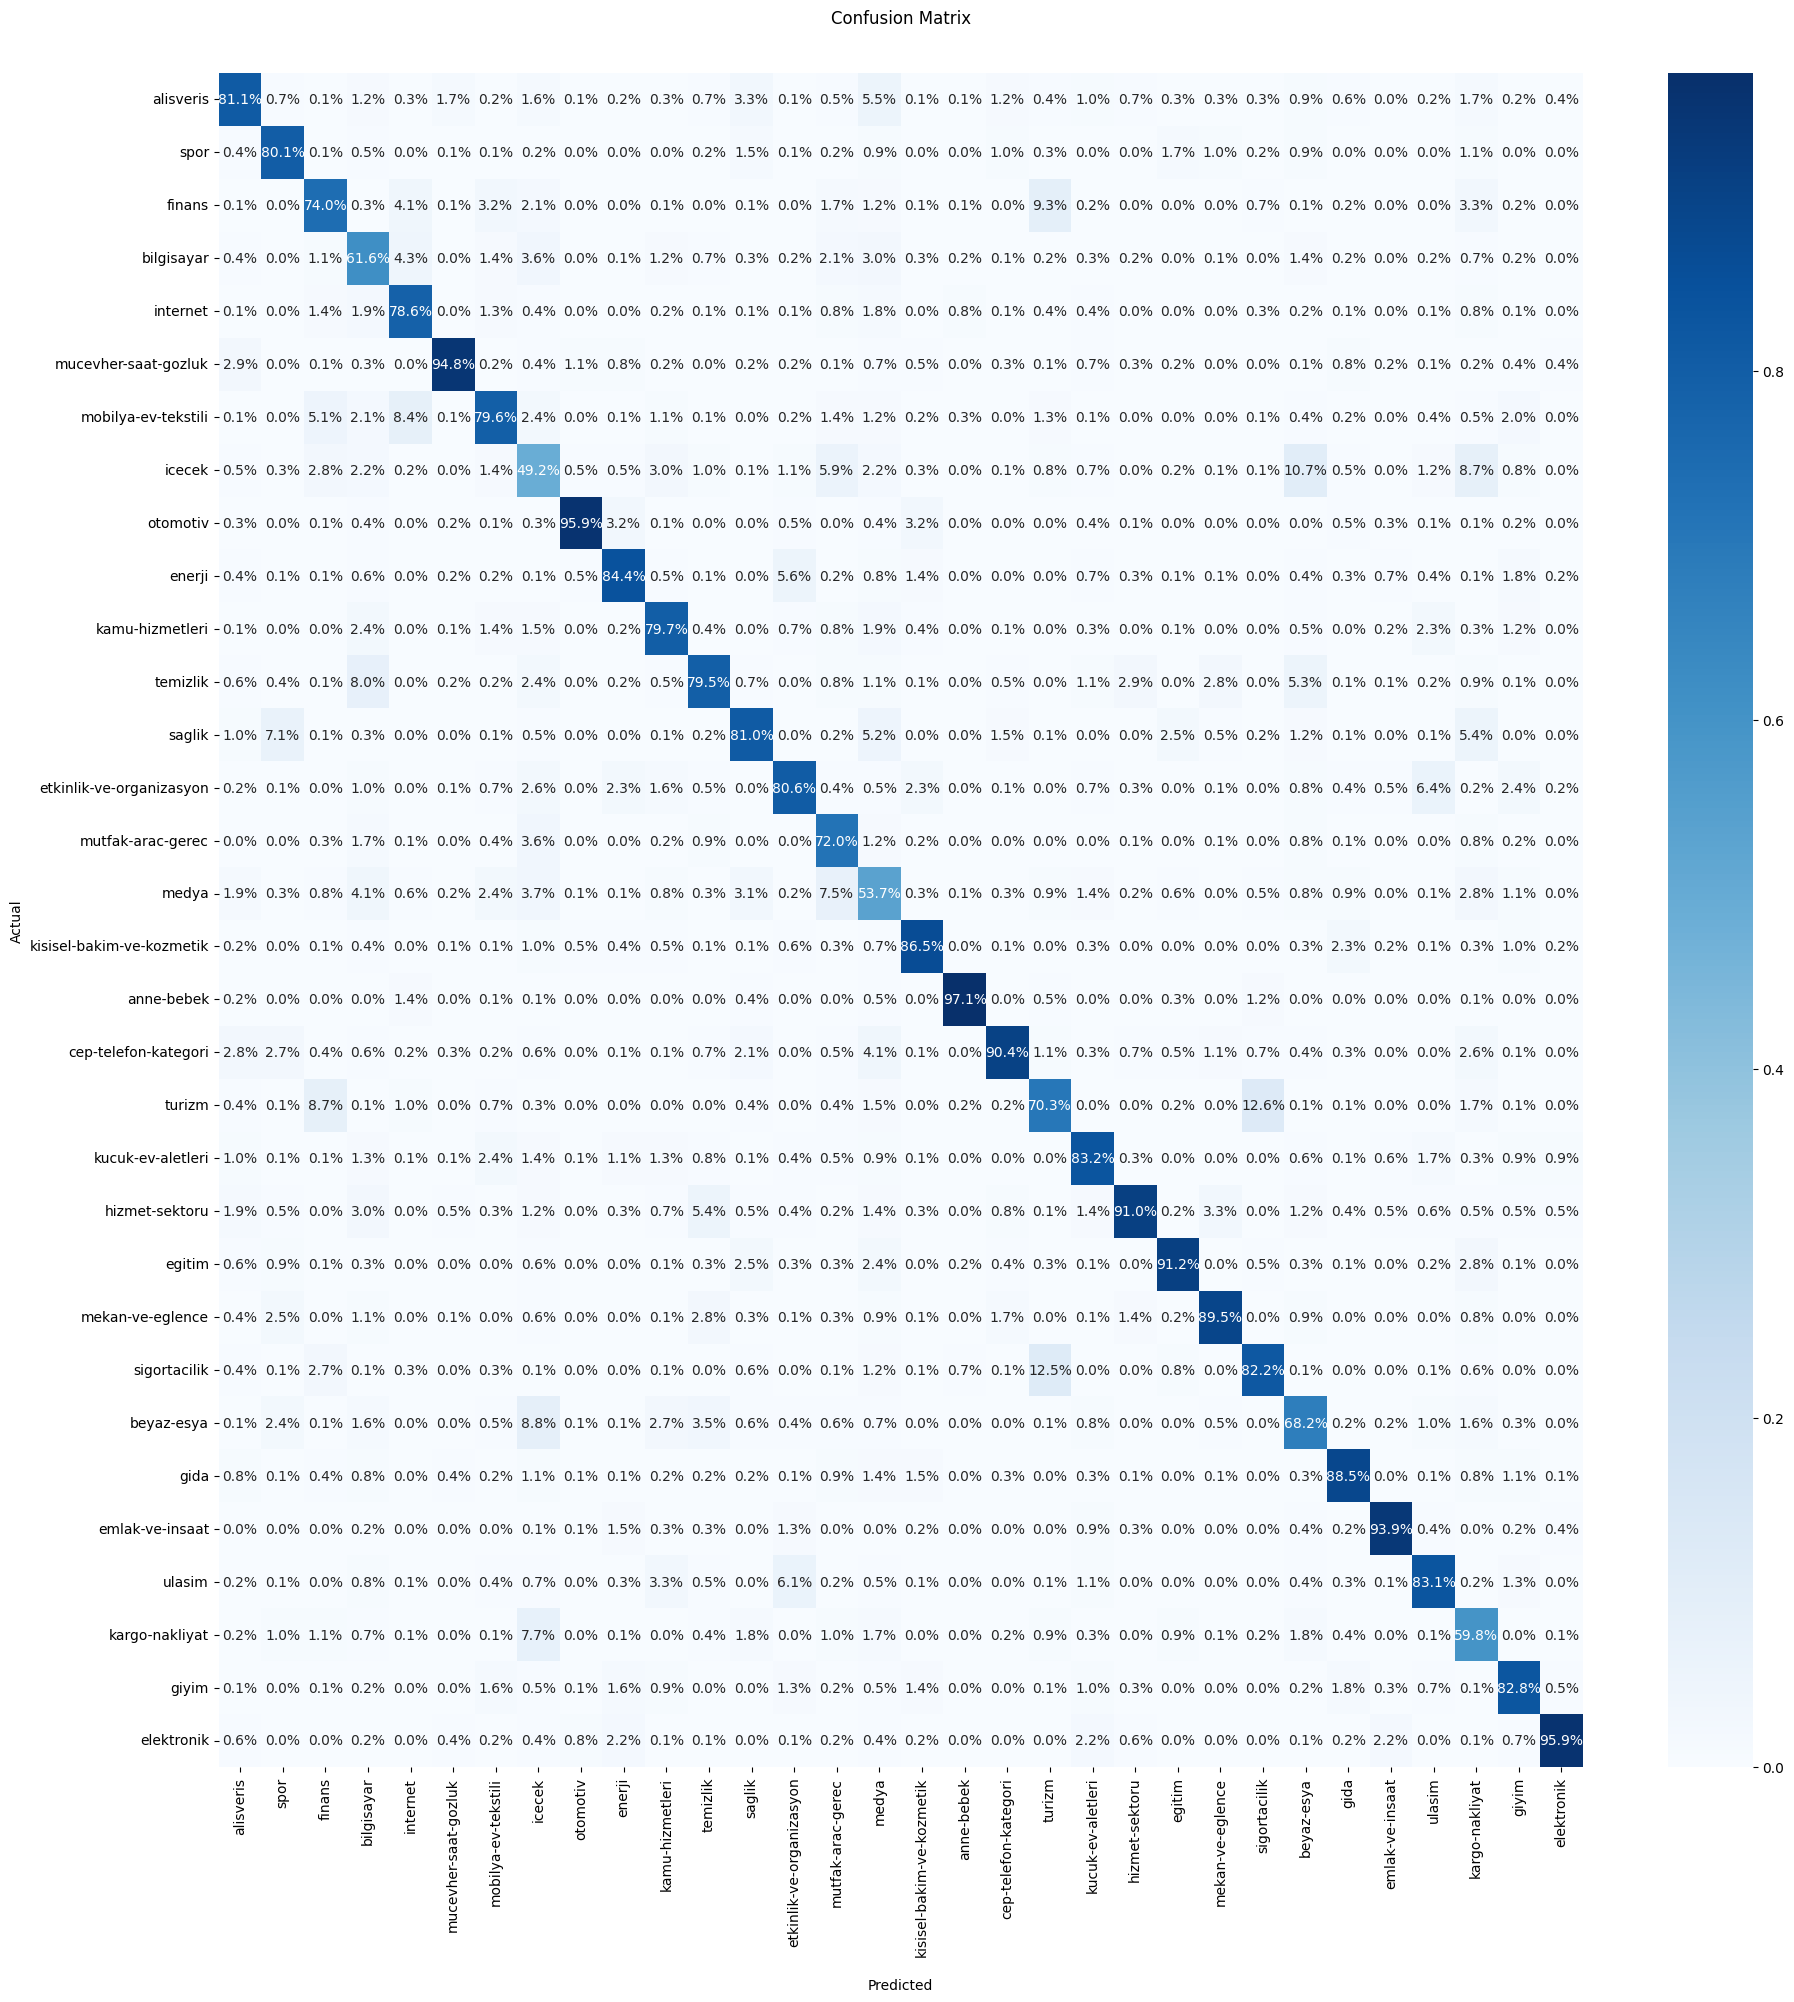

time: 5.69 s (started: 2023-07-21 14:22:09 +00:00)


In [145]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,22))
ax = sns.heatmap(cm_df/np.sum(cm_df), annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(id_to_category.values())
ax.yaxis.set_ticklabels(id_to_category.values())

## Display the visualization of the Confusion Matrix.
## Karışıklık Matrisinin görselleştirmesini görüntüleyin.
plt.show()

Please, observe the ***correctly classified*** sample ratios of each class.

You **may need to take some actions** for some classes if the correctly predicted sample ratios are relatively low.   
# ------------------------------------------------------------------------------
Lütfen her sınıfın ***doğru sınıflandırılmış*** örnek oranlarını dikkate alınız.

Doğru tahmin edilen örnek oranları nispeten düşükse bazı sınıflar için **bazı işlemler yapmanız** gerekebilir.

time: 16min 51s (started: 2023-07-21 14:22:09 +00:00)


## Create an End-to-End model

In the code above, we applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing **raw strings** (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. You can call this model as an End-to-End model.

To do so, you can create a new model using the  `TextVectorization` layer (`vectorize_layer`) we just trained as the first layer.

## Uçtan Uca bir model oluşturun

Yukarıdaki kodda, modele metin beslemeden önce veri kümesine "TextVectorization" katmanını uyguladık. Modelinizi **ham dizeleri** işleyebilir hale getirmek istiyorsanız (örneğin, dağıtımını basitleştirmek için), modelinizin içine "TextVectorization" katmanını dahil edebilirsiniz. Bu modele Uçtan Uca model diyebilirsiniz.

Bunu yapmak için, ilk katman olarak az önce eğittiğimiz "TextVectorization" katmanını ("vectorize_layer") kullanarak yeni bir model oluşturabilirsiniz.

In [146]:
end_to_end_model = tf.keras.Sequential([
  vectorize_layer,
  model_Conv1D,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam", metrics=['accuracy']
)


time: 33.9 ms (started: 2023-07-21 15:09:39 +00:00)


Notice that `end_to_end_model` generates the exact test accuracy using the **raw text** with the original model accepting **preprocessed text**.

"end_to_end_model"in, orijinal modelin **önişlenmiş metni** kabul etmesiyle **ham metni** kullanarak kesin test doğruluğunu oluşturduğuna dikkat edin.

In [147]:
loss, accuracy = end_to_end_model.evaluate(test_features, test_targets)
print("Test accuracy: ",accuracy)

2640/2640 [==============================] - 70s 26ms/step - loss: 1.1945 - accuracy: 0.8004
Test accuracy:  0.8004428148269653
time: 1min 23s (started: 2023-07-21 15:09:43 +00:00)


In [148]:
end_to_end_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
 model_Conv1D (Functional)   (None, 32)                2008160   
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
Total params: 2,008,160
Trainable params: 2,008,160
Non-trainable params: 0
_________________________________________________________________
time: 33 ms (started: 2023-07-21 15:11:06 +00:00)


In [149]:
tf.keras.models.save_model(end_to_end_model, 'MCTC_Conv1D_E2E')

time: 3.52 s (started: 2023-07-21 15:11:06 +00:00)


In [150]:
!ls

category_to_id.pkl  MCTC_Conv1D_E2E			 sample_data
drive		    model.png				 vectorize_layer_model
gdrive		    MultiClassTextClassification_Conv1D
id_to_category.pkl  MultiClassTextClassification_FFN
time: 108 ms (started: 2023-07-21 15:11:10 +00:00)


In [151]:
end_to_end_model= tf.keras.models.load_model('MCTC_Conv1D_E2E')

time: 1.78 s (started: 2023-07-21 15:11:10 +00:00)


Let's observe the prediction of `end_to_end_model` with the **raw text**:

**ham metin** ile `end_to_end_model` öngörüsünü inceleyelim:

In [152]:
examples = [
  "Bir fenomen aracılığı ile Yalova Terma City otel'den arandık. Tatil kazandınız buyurun 16 ocakta gelin dediler. Gittik (2 küçük çocuk, eşim ve annem ), bizi y** adlı kişi karşıladı. Tanıtım yapacağız 4 saat dedi. Daha odamıza bile geçemeden, dinlemeye fırsat vermeden bize oteli gezdirmeye başladılar. Gürültülü, müzik sesli, havasız, kalabalık (Corona olduğu dönemde) bir salonda bize tapulu 1 haftalık arsa sattılar. (psikolojik baskı ile) Tabi o yorgunlukla (amaçları da bu zaten) dinlenmeden bize otelin her detayını anlattılar. Tapumuzu almadan para istediler, güvendik aldık. IBAN numarası otele ait olmayan şahsa 30 bin tl ödedik. 1 gün sonra tapu işlemleri yapılacaktı istemiyoruz tapu, tatil dedik. Kabul etmiyorlar, paramızı vermiyorlar. Ayrıca annemin kaldığı odada ısıtma sistemi çalışmıyordu, çocuk havuzu aşırı pisti, kadınlara ait termal havuz kapalı idi, odada telefon çalışmıyordu ya da bilerek sessize alıyorlar ilgilenmemek için.",
  "5 yıl kullandığım buzdolabım buzluktan şu akıtmaya başladı. Servis geldi içini boşaltın. Lastiklerinden hava alıyor sıcak suyla lastikleri yıkayın dediler. Denileni yaptım. 1 sene olmadan tekrar akıtmaya başladı",
  "Hepsiburada'dan esofman takimi aldık. 18 ocakta yola çıktı ve teslim edildi gözüküyor. Teslim adresi kayınpederimin dükkandı. Ben elemanlar aldı diye düşündüm. Fakat birkaç gün geçti getiren olmadı. Sorunca da kimsenin teslim almadığını öğrendim. Lütfen kargomuzu kime teslim ettiğinizi öğrenin, o gün dağıtım yapan kuryenize sorabilirsiniz. Gereğinin yapılacağını umuyorum, kızıma aldığım bir hediyeydi üzgünüm.",
  "Bimcell tarafıma mesaj atıp 6GB internet Hediye! Evet yazıp 3121'e göndererek kampanyaya katilin,3 gün içinde 30 TL'ye Dost Orta Paket almanız karşılığında haftalık 6GB cepten internet kazanın! Şeklinde mesaj attı dediklerini yerine getirdim paketi yaptım 3121 e Evet yazarak mesaj attım ancak 24.01.2022 de yaptığım işlem hala gerçekleşmedi hediye 6 GB hattıma tanımlanmadı",
  "Instagram'da gözlük marketi hesabı sattığı kalitesiz ürünü geri almıyor. Gözlük çok kötü. Saplar oyuncak desen değil. Oyuncakçıdan alsam çok daha kaliteli olurdu. Bir yazdım iade edebilirsiniz diyor. Sonra yok efendim iademiz yok diyor.",
  "Tamamlayıcı sağlık sigortamı iptal etmek istiyorum fakat ne bankadan ne NN SİGORTA'dan bir tek muhatap bile bulamıyorum. Telefonda dakikalarca tuşlama yapıp bekletiliyor kimsenin cevap verdiği yok. Zaman kaybından başka bir şey değil! İletişim kurabileceğim biri tarafından aranmak istiyorum",
  "Selamlar TOKİ ve emlak yönetimden şikayetimiz var. Kastamonu merkez örencik TOKİ 316 konut 3 gündür kömür gelmedi bir çok blokta kömür bitmiş durumda bu kış zamanında eksi 8 ila 15 derecede yaşlılar hastalar çocuklar bütün herkesi mağdur ettiler. Emlak yönetim 734.60 ton kömür anlaşması yapmış onu da geç yaptığı için zaten yüksek maliyet çıkarmıştı yeni fiyat güncellemesi yapacakmış örneğin bana 6.160 TL nin üzerine fiyat eklenecekmiş bu işi yapan sorumlu kişi veya kişilerin zamanında tedbir almamasının cezasını TOKİ de oturan insanlar çekiyor ya sistem ya da kişiler hatalı"
]

predictions=end_to_end_model.predict(examples)
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

1/1 [==============================] - 0s 198ms/step
turizm
temizlik
internet
internet
internet
elektronik
mucevher-saat-gozluk
time: 268 ms (started: 2023-07-21 15:11:18 +00:00)


## Summary

In this part,
* we created a Deep Learning model with a **1 Dimensional Convolutional layer** (Conv1D) to classify text into ***multi-classes***,
* we **trained** and **tested** the model,
* we observed the **model performance** using **Classification Report** and **Confusion Matrix**,
* we pointed out the importance of the **balanced** dataset and the performance on each class.
* we created an **end-to-end model** by integrating the **Keras Text Vectorization** layer into the final model.

In the next part, we will design another Deep Learning model by using a ***recurrent layer (LSTM)***.


# ------------------------------------------------------------------------------

## Özet

Bu bölümde,
* metni ***çoklu sınıflara*** göre sınıflandırmak için **1 Boyutlu Evrişim katmanı** (Conv1D) ile bir Derin Öğrenme modeli oluşturduk,
* modeli **eğittik** ve **test ettik**,
* **Sınıflandırma Raporu** ve **Karışıklık Matrisi** kullanarak **model performansını** gözlemledik,
* **dengeli** veri kümesinin ve her sınıftaki performansın önemine dikkat çektik.
* **Keras Text Vectorization** katmanını nihai modele entegre ederek **uçtan uca bir model** oluşturduk.

Bir sonraki bölümde, ***tekrarlayan katman (LSTM)*** kullanarak başka bir Derin Öğrenme modeli tasarlayacağız.

# TEXT CLASSIFICATION WITH A RECURRENT LAYER
## Let's build a model with a Bidirectionel LSTM layer

### Important LSTM Parameters
I would like to kindly remind you the **important** parameters in the Keras ```LSTM``` layer briefly. For more information, you can visit the [Keras official documentation here](https://keras.io/api/layers/recurrent_layers/lstm/).

```
tf.keras.layers.LSTM(
    units,
    return_sequences=False,
    return_state=False,
    
)
```
* **units:** Positive integer, dimensionality of the output space. In other words, it sets the number of output units or nodes in the layer. This is a required parameter.
* **return_sequences:** Boolean. Whether to return the last output in the output sequence, or the full sequence. Default: ***False***. If set to True, the layer will return the full sequence of outputs, which is useful if you are stacking multiple LSTM layers. If set to False (the default), the layer will only return the last output, which is useful for tasks such as predicting a single output value.

* **return_state:** Boolean. Whether to return the last state in addition to the output. Default: ***False***. If set to True, the layer will return a list of the final hidden state and final cell state, which can be useful for initializing the state of a subsequent LSTM layer. If set to False (the default), the layer will only return the output.

  

In our model, I will use an ```LSTM``` layer with the following parameters and their values:

* **units=** 256

* **return_sequences=** True

```LSTM(256, return_sequences=True)```

### Why do we set return_sequences parameter true?

In the given model, the return_sequences parameter of the Bidirectional LSTM layer is set to True. This means that the layer will return the full sequence of outputs for each timestep instead of just the last output.

There are a few reasons why return_sequences=True might be used in a model. In this case, we set it true, because we want to use the LSTM layer for feature extraction. In some cases, like text classification, LSTM layers can be used to extract features from sequential data (here: tokens). By setting return_sequences=True, you can extract features from every timestep of the input sequence (here is the tokens from a review) and use them as inputs to subsequent layers.


Lastly, the shape of this layer's output will be (time-steps,256). Remember that, in our previous tutorials, we set the sequence size fix to 40 tokens. Therefore, number of time-steps is 40.
# -------------------------------------------------------------------------------
# YENİLENEN KATMAN İLE METİN SINIFLANDIRMASI
## Çift Yönlü LSTM katmanıyla bir model oluşturalım

### Önemli LSTM Parametreleri
Keras ``LSTM``` katmanındaki **önemli** parametreleri kısaca hatırlatmak isterim. Daha fazla bilgi için [Keras resmi belgelerini buradan](https://keras.io/api/layers/recurrent_layers/lstm/) ziyaret edebilirsiniz.

```
tf.keras.layers.LSTM(
    birimler,
    return_sequences=Yanlış,
    return_state=Yanlış,
    
)
```
* **birimler:** Pozitif tamsayı, çıktı alanının boyutluluğu. Başka bir deyişle, katmandaki çıktı birimlerinin veya düğümlerin sayısını belirler. Bu gerekli bir parametredir.
* **return_sequences:** Boolean. Çıkış dizisindeki son çıktının mı yoksa tam dizinin mi döndürüleceği. Varsayılan: ***Yanlış***. True olarak ayarlanırsa katman, birden çok LSTM katmanını yığınlıyorsanız kullanışlı olan tam çıktı dizisini döndürür. False (varsayılan) olarak ayarlanırsa, katman yalnızca son çıktıyı döndürür; bu, tek bir çıktı değeri tahmin etmek gibi görevler için yararlıdır.

* **return_state:** Boolean. Çıktıya ek olarak son durumun döndürülüp döndürülmeyeceği. Varsayılan: ***Yanlış***. True olarak ayarlanırsa katman, sonraki LSTM katmanının durumunu başlatmak için yararlı olabilecek son gizli durum ve son hücre durumunun bir listesini döndürür. False (varsayılan) olarak ayarlanırsa, katman yalnızca çıktıyı döndürür.

  

Modelimizde, aşağıdaki parametreler ve değerleri ile bir ``LSTM``` katmanı kullanacağım:

* **birimler=** 256

* **return_sequences=** Doğru

```LSTM(256, return_sequences=True)```

### return_sequences parametresini neden doğru olarak ayarladık?

Verilen modelde, Çift Yönlü LSTM katmanının return_sequences parametresi True olarak ayarlanmıştır. Bu, katmanın yalnızca son çıktı yerine her zaman adımı için tam çıktı dizisini döndüreceği anlamına gelir.

Bir modelde return_sequences=True kullanılmasının birkaç nedeni vardır. Bu durumda, özellik çıkarımı için LSTM katmanını kullanmak istediğimiz için bunu doğru olarak ayarladık. Metin sınıflandırması gibi bazı durumlarda, sıralı verilerden (burada: belirteçler) özellikler çıkarmak için LSTM katmanları kullanılabilir. return_sequences=True ayarlayarak, giriş dizisinin her zaman adımından özellikler çıkarabilir (işte bir gözden geçirmeden belirteçler) ve bunları sonraki katmanlar için girdi olarak kullanabilirsiniz.


Son olarak, bu katmanın çıktısının şekli (zaman-adımları,256) olacaktır. Önceki eğitimlerimizde sıra boyutu düzeltmesini 40 belirteç olarak ayarladığımızı unutmayın. Bu nedenle, zaman adımı sayısı 40'tır.

### Why do we use Bidirectional LSTM?

Furthermore, we chose to use Bidirectional LSTM by adding the ```Biderectional``` layer.

```x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)```

The ```bidirectional LSTM``` layer in the model is used to capture both forward and backward context in the input sequence. This is particularly useful in natural language processing tasks such as text classification because the meaning of a word can depend on the words that come before and after it in the sentence.

A standard LSTM layer can only capture the context in one direction, either forwards or backwards, but not both at the same time. In contrast, a bidirectional LSTM layer processes the input sequence in both directions, allowing it to capture context from both directions and provide a more complete understanding of the input sequence.

Using a bidirectional LSTM layer can lead to better performance on text classification tasks because it can capture more complex dependencies in the input sequence, which is important for accurate classification. It also allows the model to learn features that are not just based on the previous context of the input sequence, but also on the future context.

Therefore, a bidirectional LSTM layer is a common choice for text classification tasks where the input sequence has complex dependencies that require the model to capture context from both directions.

If you would like to conduct an experimet just remove the bidirectional layer, retrain the model, and observe the performance. You would see that the model without a bidirectional layer will perform very poor.

#-------------------------------------------------------------------------------

### Neden Çift Yönlü LSTM sahibi olacak?

Ayrıca, ``Biderectional`` katmanını dahil ederek Çift Yönlü LSTM kullanmayı tercih ettik.

```x = Layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)```

Modeldeki ``çift yönü LSTM`` katmanı, giriş sırasındaki hem ileri hem de geri bağlamayı yakalamak için kullanılır. Bu, özellikle metin kavramları gibi doğal dil işleme görevlerinde kullanışlıdır, çünkü bir anlama anlamı cümlede ondan önce ve sonra gelen kelimelere bağlı olabilir.

Standart bir LSTM katmanı, içeriği yalnızca bir yön, ileri veya geri yakalayabilir, ancak aynı anda birden çok kez yakalayamaz. Buna karşılık, çift yönlü bir LSTM katmanı, girilen dizinin iki yönlü çalışmasını ve her iki yöndeki bağlamayı yakalamasına ve girilen dizinin daha eksiksiz bir şekilde tutulmasını sağlar.

Çift yönlü bir LSTM katmanını kullanmak, doğru düşünceler için önemli olan giriş sırasındaki daha karmaşık siber güvenlikleri yakalayabildiğinden, metin algılama görevlerinde daha iyi performans sağlayabilir. Ayrıca, modelin yalnızca giriş dizisinin önceki bağlamasına değil, aynı zamanda veri kaynağı bağlama da temelli olan özelliklerini öğrenmesine olanak tanır.

Bu nedenle, çift yönlü bir LSTM tabakası, girilen dizinin, modelin her iki yöne bağlılığını yakalamasını gerektiren karmaşık kurallara sahip olduğu metin bölgeleri için yaygın bir seçimdir.

Bir deney yapmak istiyorsanız, çift kanat katmanlarını kuşatın, modeli yeniden eğitin ve performansını gözlemleyin. Çift katmanlı katman modelin olmayan çok kötü performans özelliklerini genişletiyor.


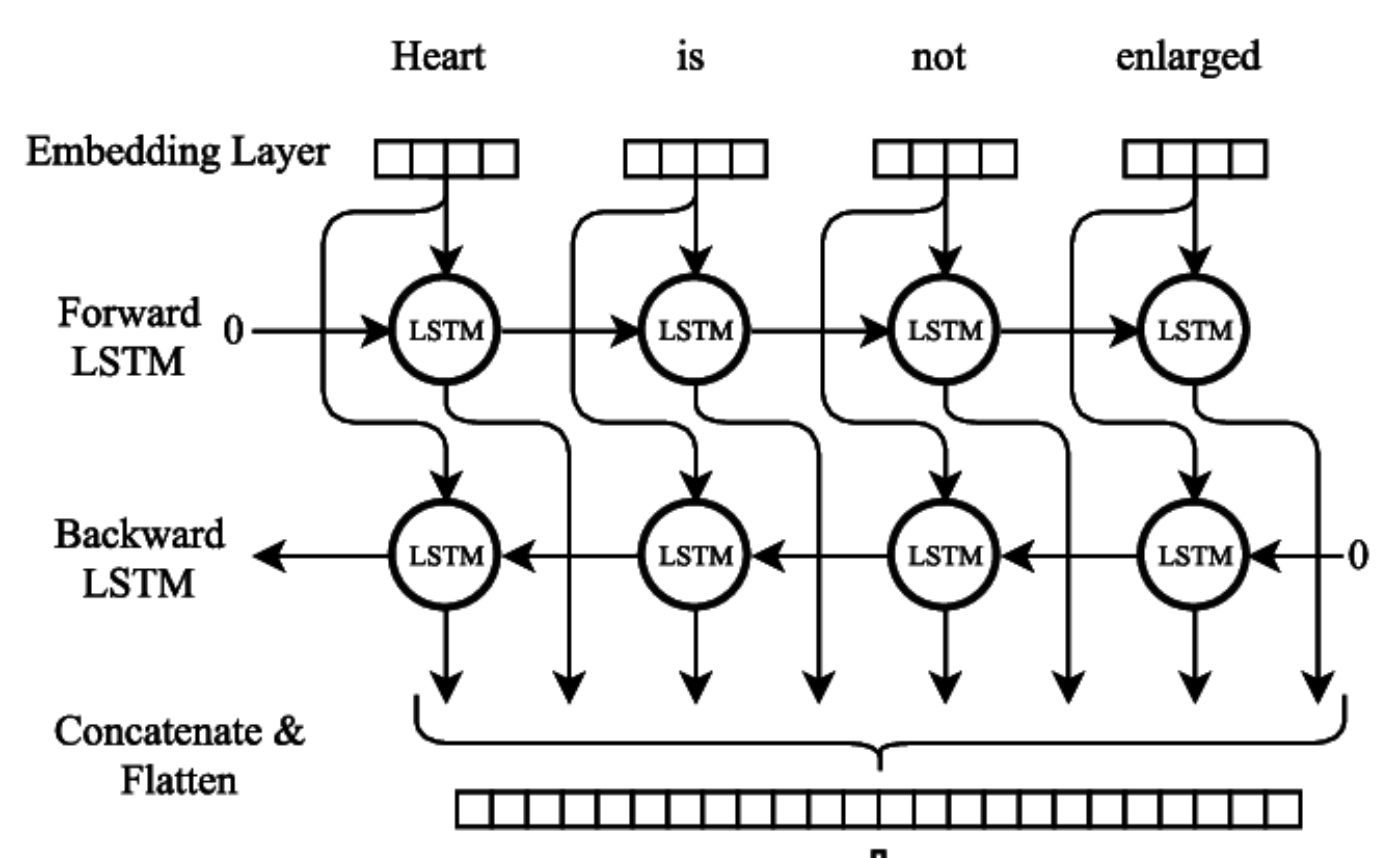

Image is taken from [here](https://paperswithcode.com/method/bilstm)

Because of Bidirectional LSTM, the shape of the output from this layers become (time-steps,2*256) = (40, 512). You will observe this output shape in the following model summarization below.

Here is a sample Feed Forward NN model with a Bidirectional LSTM layer. THe details of the model are given below per layer.

# ------------------------------------------------------------------------------

Çift Yönlü LSTM nedeniyle, bu katmanlardan gelen çıktının şekli (zaman-adımları,2*256) = (40, 512) olur. Aşağıdaki model özetlemesinde bu çıktı şeklini gözlemleyeceksiniz.

Burada, Çift Yönlü LSTM katmanına sahip örnek bir İleri Beslemeli NN modeli verilmiştir. Modelin detayları katman başına aşağıda verilmiştir.

In [153]:
embed_dim = 16  # Embedding size for each token / Her belirteç için gömme boyutu
feed_forward_dim = 64  # Hidden layer size in feed forward network / İleri beslemeli ağda gizli katman boyutu

def create_model_LSTM():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = layers.Embedding(input_dim=vocab_size,
                                       output_dim=embed_dim,
                                       input_length=max_len)
    x = embedding_layer(inputs_tokens)
    #x = layers.Conv1D(256, kernel_size=5)(x)
    #x = layers.GRU(256, return_sequences=True)(x)
    #x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)
    x = layers.LSTM(256, return_sequences=True)(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(feed_forward_dim, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens,
                        outputs=outputs, name='model_LSTM')
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)

    return model
model_LSTM=create_model_LSTM()

time: 551 ms (started: 2023-07-21 15:11:35 +00:00)


In the above code:
* ```inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)``` creates an input layer for the model that expects integer sequences of length max_len. Note that in our tutorial series max_len is 40 tokens.

* ```embedding_layer = layers.Embedding(input_dim=vocab_size,                              output_dim=embed_dim,                                   input_length=max_len)``` creates an embedding layer that maps each token in the input sequence to a dense vector of size embed_dim. This layer will learn the vector representations of the tokens during training. Here, we set embed_dim as 16,  max_len is 40 tokens, and vocab_size is 100K tokens.

* ```x = embedding_layer(inputs_tokens)``` applies the embedding layer to the input sequence, resulting in a tensor of shape (batch_size, max_len, embed_dim).

* ```x = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)``` adds a bidirectional LSTM layer to the model such that output dimension is 2*256. The ```return_sequences=True``` argument means that the layer will return the full sequence of outputs at each time steps (we have 40 tokens) rather than just the final output.

* ```x = layers.Dropout(0.2)(x)``` adds a dropout layer that randomly sets 20% of the input units to 0 during training. This helps prevent overfitting by adding noise to the network.

* ```x = layers.Dense(feed_forward_dim, activation='relu')(x)``` adds a feedforward layer with feed_forward_dim hidden units and ReLU activation function.

*  ```x = layers.GlobalMaxPool1D()(x)``` applies a global max pooling operation to the output of the feedforward layer. This reduces the tensor to a one-dimensional tensor of shape (batch_size, feed_forward_dim).

* ```outputs = layers.Dense(number_of_categories)(x)``` adds a dense layer with number_of_categories units, which will be the output layer of the model. The output layer produces a probability distribution over the possible classes.

* ```model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_LSTM')``` creates a Keras model with the input and output layers defined above.

* ```loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)``` creates a loss function that calculates the cross-entropy loss between the predicted and true labels. The from_logits=True argument means that the output of the model is not normalized into a probability distribution, so the loss function will apply the softmax function internally.

* ```metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()``` creates a metric function that calculates the accuracy of the model predictions.

* ```model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)``` compiles the model with the Adam optimizer, the cross-entropy loss function, and the accuracy metric function.

#-------------------------------------------------------------------------------
Yukarıdaki kodda:
* ```inputs_tokens = Layers.Input(shape=(max_len,), dtype=tf.int32)```, max_len uzunluğunda tamsayı dizileri bekleyen model için bir giriş katmanı oluşturur. Öğretici serimizde max_len'in 40 belirteç olduğunu unutmayın.

* ```embedding_layer = Layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=max_len)''', giriş dizisindeki her belirteci embed_dim boyutunda yoğun bir vektöre eşleyen bir katıştırma katmanı oluşturur. Bu katman, eğitim sırasında belirteçlerin vektör temsillerini öğrenecektir. Burada embed_dim 16, max_len 40 token ve vocab_size 100K token olarak ayarladık.

* ```x = embeding_layer(inputs_tokens)```, gömme katmanını giriş dizisine uygulayarak bir şekil tensörü (batch_size, max_len, embed_dim) ile sonuçlanır.

* ```x = Layers.Bidirectional(layers.LSTM(256, return_sequences=True))(x)```, modele çıktı boyutu 2*256 olacak şekilde çift yönlü bir LSTM katmanı ekler. ```return_sequences=True``` argümanı, katmanın her zaman adımında (40 jetonumuz var) yalnızca nihai çıktı yerine tüm çıktı dizisini döndüreceği anlamına gelir.

* ```x = Layers.Dropout(0.2)(x)```, eğitim sırasında girdi birimlerinin %20'sini rasgele 0'a ayarlayan bir bırakma katmanı ekler. Bu, ağa gürültü ekleyerek fazla takmayı önlemeye yardımcı olur.

* ```x = katmanlar.Dense(feed_forward_dim, aktivasyon='relu')(x)``` feed_forward_dim gizli birimleri ve ReLU aktivasyon fonksiyonu ile bir ileri besleme katmanı ekler.

* ```x = Layers.GlobalMaxPool1D()(x)```, ileri besleme katmanının çıktısına genel bir maksimum havuzlama işlemi uygular. Bu, tensörü tek boyutlu bir şekil tensörüne indirger (batch_size, feed_forward_dim).

* ```çıkışlar = katmanlar.Dense(kategori_sayısı)(x)```, modelin çıktı katmanı olacak kategori_sayısı birimleriyle yoğun bir katman ekler. Çıktı katmanı, olası sınıflar üzerinde bir olasılık dağılımı üretir.

* ```model = keras.Model(inputs=inputs_tokens, outputs=outputs, name='model_LSTM')```, yukarıda tanımlanan giriş ve çıkış katmanlarıyla bir Keras modeli oluşturur.

* ```loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)```, öngörülen ve gerçek etiketler arasındaki çapraz entropi kaybını hesaplayan bir kayıp işlevi oluşturur. from_logits=True bağımsız değişkeni, modelin çıktısının bir olasılık dağılımına göre normalleştirilmediği anlamına gelir, bu nedenle kayıp işlevi, softmax işlevini dahili olarak uygular.

* ```metric_fn = tf.keras.metrics.SparseCategoricalAccuracy()```, model tahminlerinin doğruluğunu hesaplayan bir metrik fonksiyon oluşturur.

* ```model.compile(optimizer="adam",loss=loss_fn, metrics=metric_fn)``` modeli Adam iyileştirici, çapraz entropi kaybı fonksiyonu ve doğruluk metrik fonksiyonu ile derler.

In [154]:
model_LSTM.summary()

Model: "model_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 40, 16)            1600000   
                                                                 
 lstm (LSTM)                 (None, 40, 256)           279552    
                                                                 
 dropout_2 (Dropout)         (None, 40, 256)           0         
                                                                 
 dense_4 (Dense)             (None, 40, 64)            16448     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                        

Here is a quick explanation of the input/output shapes:

* An input layer takes in a tensor of shape (None, 40) where None indicates a variable batch size and 40 represents the length of each input sequence (in our case 40 tokens in a review)

* An embedding layer converts each integer in the input sequence into a vector of size 16. The output shape of this layer is (None, 40, 16).

* A bidirectional LSTM layer  processes the input sequence in both directions and returns a sequence of hidden states of size (2*256) 512. The output shape of this layer is (None, 40, 512).

* A dropout layer  randomly sets a fraction of the input units to zero during training to prevent overfitting.

* A dense layer  applies a fully connected layer with 64 units to each element in the sequence. The output shape of this layer is (None, 40, 64).

* A global max pooling 1D layer takes the maximum value across the sequence dimension of the previous layer and returns a tensor of shape (None, 64). You can think of that layer as a summary (representation) of the review because we shrink the dimension from (None,40,64) to (None, 64).

* A dense layer applies a fully connected layer with 32 units to the output of the previous layer. The output shape of this layer is (None, 32). Actually this is the number of review classes. So, generally, this layer is called a ***classification layer***.

Therefore, the input shape of the model is (None, 40) where None indicates a variable batch size and 40 represents the length of each input sequence (review). The output shape of the model is (None, 32) where None indicates a variable batch size and 32 represents the number of output units of the last dense layer (review classes).

# ------------------------------------------------------------------------------

İşte giriş/çıkış şekillerinin hızlı bir açıklaması:

* Bir girdi katmanı, bir tensör şekli (Yok, 40) alır; burada Yok, değişken bir toplu iş boyutunu belirtir ve 40, her bir girdi dizisinin uzunluğunu temsil eder (bizim durumumuzda, bir gözden geçirmede 40 belirteç)

* Gömme katmanı, giriş dizisindeki her tamsayıyı 16 boyutunda bir vektöre dönüştürür. Bu katmanın çıktı şekli (Yok, 40, 16) şeklindedir.

* Çift yönlü bir LSTM katmanı, girdi sırasını her iki yönde işler ve (2*256) 512 boyutunda bir gizli durumlar dizisi döndürür. Bu katmanın çıktı şekli (Yok, 40, 512) şeklindedir.

* Bir bırakma katmanı, fazla uydurmayı önlemek için eğitim sırasında giriş birimlerinin bir kısmını rastgele sıfıra ayarlar.

* Yoğun bir katman, dizideki her bir öğeye 64 birimlik tam bağlı bir katman uygular. Bu katmanın çıkış şekli (Yok, 40, 64) şeklindedir.

* Global bir maksimum havuzlama 1B katmanı, önceki katmanın sıra boyutu boyunca maksimum değeri alır ve bir şekil tensörü döndürür (Yok, 64). Boyutu (Yok,40,64)'ten (Yok, 64)'e küçülttüğümüz için, bu katmanı incelemenin bir özeti (temsili) olarak düşünebilirsiniz.

* Yoğun bir katman, önceki katmanın çıktısına 32 birimlik tam bağlı bir katman uygular. Bu katmanın çıkış şekli (Yok, 32) şeklindedir. Aslında bu, tekrar derslerinin sayısıdır. Bu nedenle, genel olarak bu katmana ***sınıflandırma katmanı*** denir.

Bu nedenle, modelin girdi şekli (Hiçbiri, 40) şeklindedir; burada Yok, değişken bir parti büyüklüğünü belirtir ve 40, her girdi dizisinin (gözden geçirme) uzunluğunu temsil eder. Modelin çıktı şekli (Hiçbiri, 32) şeklindedir; burada Yok, değişken parti boyutunu belirtir ve 32, son yoğun katmanın (inceleme sınıfları) çıktı birimlerinin sayısını temsil eder.

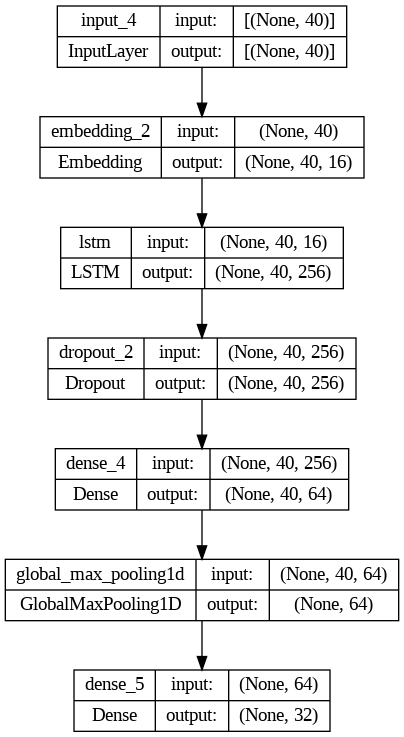

time: 67.3 ms (started: 2023-07-21 15:11:43 +00:00)


In [155]:
tf.keras.utils.plot_model(model_LSTM,show_shapes=True)

In [156]:
!pwd

/content
time: 106 ms (started: 2023-07-21 15:11:46 +00:00)


In [157]:
train_ds.element_spec

(TensorSpec(shape=(64, 40), dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 3.75 ms (started: 2023-07-21 15:11:47 +00:00)


In [158]:
val_ds.element_spec

(TensorSpec(shape=(64, 40), dtype=tf.int64, name=None),
 TensorSpec(shape=(64,), dtype=tf.int64, name=None))

time: 5.47 ms (started: 2023-07-21 15:11:48 +00:00)


In [159]:
for X, y in val_ds.take(1):
  print(X.shape, y.shape)
  print("All categories values in this batch/Bu gruptaki tüm kategori değerleri: ", y)
  print("\nFirst sample in the batch/Partideki ilk numune:")
  print("\tX is: " ,X[0])
  print("\ty is: ", y[0].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[0])])
  output = id_to_category[y[0].numpy()]
  print("\tinput (in text): " , input)
  print("\toutput (in category): " , output)

  print("\nSecond sample in the batch/Partideki ikinci numune:")
  print("\tX is: " ,X[1])
  print("\ty is: ", y[1].numpy)
  input = " ".join([vocab[_] for _ in np.squeeze(X[1])])
  output = id_to_category[y[1].numpy()]
  print("\tinput (in text)/giriş (metin olarak): " , input)
  print("\toutput (in category)/çıktı (kategoride): " , output)

(64, 40) (64,)
All categories values in this batch/Bu gruptaki tüm kategori değerleri:  tf.Tensor(
[31  3  8 29 23  8 16 12  8  2 19 11  7 11 16 12 27  4  4  8  9 30  5 11
 30  4 27 21  5 28 10 11 31 12  6 28 24 10 17  5 22 13 23 16  9 25 13 19
 26 20 12  3  4 30 11 13 14 30  5 21 23  7 21  0], shape=(64,), dtype=int64)

First sample in the batch/Partideki ilk numune:
	X is:  tf.Tensor(
[  629   255  1799     3    40   268  1839  1865  6844    86   235 20665
     2  4380   919    95     1  1235     1 12642 19214  8337   206    27
  2350 18269  2167    10   121  1258    53  1154    42    44   333  5495
    10   121 16504  1411], shape=(40,), dtype=int64)
	y is:  <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int64, numpy=31>>
	input (in text):  thy telefonu acmiyorlar ve para i̇adesi i̇stiyorum hayir ulasabilecegim telefon numarasi veriyorsaniz bir zahmet telefonlara cevap [UNK] insanlarin [UNK] cozmeye calisin nisandan beri aldigim biletin haddi hesabi yok bilet de

In [160]:
history=model_LSTM.fit(train_ds, validation_data=val_ds ,verbose=1, epochs=25)

Epoch 1/25
237/237 [==============================] - 56s 227ms/step - loss: 3.2017 - sparse_categorical_accuracy: 0.0657 - val_loss: 2.8331 - val_sparse_categorical_accuracy: 0.0980
Epoch 2/25
237/237 [==============================] - 51s 214ms/step - loss: 2.6073 - sparse_categorical_accuracy: 0.1489 - val_loss: 2.4536 - val_sparse_categorical_accuracy: 0.1983
Epoch 3/25
237/237 [==============================] - 51s 215ms/step - loss: 2.0905 - sparse_categorical_accuracy: 0.2656 - val_loss: 2.0393 - val_sparse_categorical_accuracy: 0.3089
Epoch 4/25
237/237 [==============================] - 52s 220ms/step - loss: 1.5524 - sparse_categorical_accuracy: 0.4464 - val_loss: 1.8621 - val_sparse_categorical_accuracy: 0.4399
Epoch 5/25
237/237 [==============================] - 50s 210ms/step - loss: 1.0380 - sparse_categorical_accuracy: 0.6501 - val_loss: 1.5193 - val_sparse_categorical_accuracy: 0.6172
Epoch 6/25
237/237 [==============================] - 51s 213ms/step - loss: 0.6654 -

Looking at the output of the last three epochs, we can make the following observations:

**Training loss:** The training loss continues to decrease, which is a good sign that the model is learning and improving.

**Training accuracy:** The training accuracy is very high, which indicates that the model is fitting the training data very well.

**Validation loss:** The validation loss continues to fluctuate around 1.3-1.4, which is relatively high compared to the training loss. This could be an indication of overfitting, as the model may be fitting to the noise in the training data.

**Validation accuracy:** The validation accuracy seems to be fluctuating around 0.8, which is relatively low compared to the training accuracy. This is another indication that the model may be overfitting and not generalizing well to new, unseen data.

Based on these observations, it seems like the model may be overfitting to the training data. One way to address this could be to use regularization techniques such as dropout or L2 regularization. Additionally, it may be helpful to increase the size of the validation set or use techniques such as cross-validation to better evaluate the model's performance on new, unseen data.

I will discuss these issues in PART K: HYPERPARAMETER OPTIMIZATION (TUNING), UNDERFITTING AND OVERFITTING.

# ------------------------------------------------------------------------------

Son üç dönemin çıktılarına baktığımızda şu gözlemleri yapabiliriz:

**Eğitim kaybı:** Eğitim kaybı azalmaya devam ediyor, bu da modelin öğrenmekte ve gelişmekte olduğuna dair iyi bir işarettir.

**Eğitim doğruluğu:** Eğitim doğruluğu çok yüksektir, bu da modelin eğitim verilerine çok iyi uyduğunu gösterir.

**Doğrulama kaybı:** Doğrulama kaybı, eğitim kaybına kıyasla nispeten yüksek olan 1,3-1,4 civarında dalgalanmaya devam ediyor. Model, eğitim verilerindeki gürültüye uyum sağlayabileceğinden, bu durum fazla uydurmanın bir göstergesi olabilir.

**Doğrulama doğruluğu:** Doğrulama doğruluğu, eğitim doğruluğuna kıyasla nispeten düşük olan 0,8 civarında dalgalanıyor gibi görünüyor. Bu, modelin fazla uyumlu olabileceğinin ve yeni, görünmeyen verilere genelleme yapamayacağının bir başka göstergesidir.

Bu gözlemlere dayanarak, modelin eğitim verilerine gereğinden fazla uyduğu görülüyor. Bunu ele almanın bir yolu, bırakma veya L2 düzenlemesi gibi düzenleme tekniklerini kullanmak olabilir. Ek olarak, modelin yeni, görünmeyen veriler üzerindeki performansını daha iyi değerlendirmek için doğrulama kümesinin boyutunu artırmak veya çapraz doğrulama gibi teknikleri kullanmak yararlı olabilir.

Bu konuları BÖLÜM K'de tartışacağım: HİPERPARAMETRE OPTİMİZASYONU (AYARLAMA), UYGUN UYUM VE YÜKSEK UYUM.

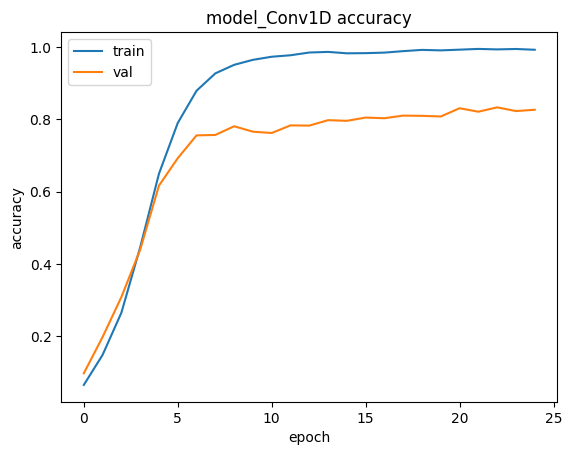

time: 265 ms (started: 2023-07-21 15:42:59 +00:00)


In [161]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_Conv1D accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

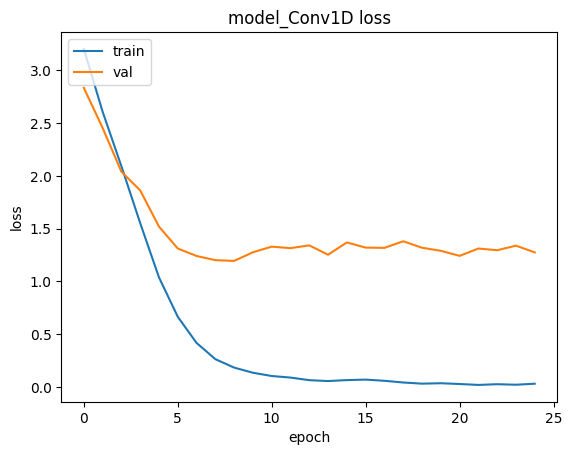

time: 267 ms (started: 2023-07-21 15:43:00 +00:00)


In [162]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_Conv1D loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

You can observe the underfitting and overfitting behaivors of the model and decide how to handle these situaitons by tuning the hiper-parameters.

In this tutorial, I will not go into the details of hiper-parameter tuning, underfitting and overfitting concepts. However, in **PART K:** HYPERPARAMETER OPTIMIZATION (TUNING), UNDERFITTING AND OVERFITTING, we will see these concepts in detail.

# -----------------------------------------------------------------------------

Modelin underfitting ve overfitting davranışlarını gözlemleyebilir ve hiper-parametreleri ayarlayarak bu durumların nasıl ele alınacağına karar verebilirsiniz.

Bu eğitimde, hiper-parametre ayarı, yetersiz uyum ve aşırı uyum kavramlarının ayrıntılarına girmeyeceğim. Ancak **BÖLÜM K:** HİPERPARAMETRE OPTİMİZASYONU (AYARLAMA), UNDERFITTING VE OVERFITTING'de bu kavramları ayrıntılı olarak göreceğiz.

time: 44.3 s (started: 2023-07-21 15:43:00 +00:00)


## Save the trained model
## Eğitilen modeli kaydedin

In [163]:
tf.keras.models.save_model(model_LSTM, 'MultiClassTextClassification_BiLSTM')

time: 5.13 s (started: 2023-07-21 15:43:45 +00:00)


## Test

In [164]:
loss, accuracy = model_LSTM.evaluate(test_ds)
print("Test accuracy: ", accuracy)

1319/1319 [==============================] - 87s 66ms/step - loss: 1.2317 - sparse_categorical_accuracy: 0.8251
Test accuracy:  0.8250687122344971
time: 2min 21s (started: 2023-07-21 15:43:50 +00:00)


## Predictions
## Tahminler

We can use the **trained model** `predict()` method to **predict** the class of the given reviews as follows:

Verilen incelemelerin sınıfını **tahmin etmek** için **eğitimli model** `predict()` yöntemini şu şekilde kullanabiliriz:

In [165]:
preds = model_LSTM.predict(test_ds)
preds = preds.argmax(axis=1)

1319/1319 [==============================] - 85s 64ms/step
time: 2min 22s (started: 2023-07-21 15:46:12 +00:00)


We can also get the **actual (true)** class of the given reviews as follows:

Ayrıca verilen incelemelerin **gerçek (gerçek)** sınıfını şu şekilde alabiliriz:

In [166]:
actuals = test_ds.unbatch().map(lambda x,y: y)
actuals=list(actuals.as_numpy_iterator())

time: 20.2 s (started: 2023-07-21 15:48:34 +00:00)


By comparing the ***`preds`*** and the ***`actuals`***
values, we can **measure** the model performance as below.

***`preds`*** ve ***`gerçekler`***'i karşılaştırarak
değerler, model performansını aşağıdaki gibi **ölçebiliriz**.

## Classification Report

Since we are dealing with a **multi-class text classification**, it is a good idea to generate a **classification report** to observe the performance of the model for ***each class***. We can use the [SKLearn `classification_report()` method](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to build a text report showing the main classification **metrics**.

Report is the summary of the **precision, recall, F1** score for ***each class***.

The reported ***averages*** include:
* **macro average** (averaging the unweighted mean per label),
* **weighted average** (averaging the support-weighted mean per label),  
* **sample average** (only for multilabel classification),
* **micro average** (averaging the total true positives, false negatives and false positives) is only shown for multi-label or multi-class with a subset of classes, because it corresponds to accuracy otherwise and would be the same for all metrics.

#-------------------------------------------------------------------------------

## Sınıflandırma Raporu

**Çok sınıflı bir metin sınıflandırması** ile uğraştığımız için, modelin performansını ***her sınıf*** için gözlemlemek üzere bir **sınıflandırma raporu** oluşturmak iyi bir fikirdir. Ana sınıflandırma **metriklerini** gösteren bir metin raporu oluşturmak için [SKLearn `classification_report()` yöntemini](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) kullanabiliriz.

Rapor, ***her sınıf*** için **kesinlik, hatırlama, F1** puanının özetidir.

Bildirilen ***ortalamalar*** şunları içerir:
* **makro ortalama** (etiket başına ağırlıklandırılmamış ortalamanın ortalaması),
* **ağırlıklı ortalama** (etiket başına destek ağırlıklı ortalamanın ortalaması),
* **örnek ortalaması** (yalnızca çok etiketli sınıflandırma için),
* **mikro ortalama** (toplam gerçek pozitiflerin, yanlış negatiflerin ve yanlış pozitiflerin ortalaması alınarak), aksi halde doğruluğa karşılık geldiğinden ve tüm metrikler için aynı olacağından, yalnızca çoklu etiket veya bir sınıf alt kümesiyle çoklu sınıf için gösterilir.

In [167]:
from sklearn import metrics
print(metrics.classification_report(actuals, preds, digits=4))

              precision    recall  f1-score   support

           0     0.6362    0.7545    0.6903      2709
           1     0.9006    0.9068    0.9037      2458
           2     0.6500    0.8206    0.7254      2732
           3     0.5783    0.7660    0.6590      2560
           4     0.7659    0.8895    0.8231      2769
           5     0.9496    0.8571    0.9010      2618
           6     0.8538    0.6877    0.7618      2725
           7     0.6725    0.5967    0.6324      2378
           8     0.9813    0.9112    0.9449      2758
           9     0.9117    0.8318    0.8699      2235
          10     0.9263    0.9138    0.9200      2738
          11     0.7469    0.7972    0.7712      2603
          12     0.9298    0.8824    0.9055      2688
          13     0.8886    0.7678    0.8238      2265
          14     0.9492    0.8505    0.8971      2682
          15     0.7225    0.5960    0.6532      2683
          16     0.8181    0.8320    0.8250      2768
          17     0.9676    

The classification report provides information about the model's performance for each class, as well as some aggregate metrics. Based on the report, we can see that the model has varying levels of precision, recall, and F1-score for each class, which indicates that the model's performance is ***not consistent*** across all classes.

Overall, the weighted average F1-score is 0.7990, which means that the model's performance is decent but not excellent. The accuracy is 0.7985, which indicates that the model is able to predict the correct class for roughly 80% of the samples.

It is also important to note that the precision, recall, and F1-score for some classes are much higher than others. For example, the F1-score for class 29 is 0.7622, which is relatively low compared to the F1-scores for other classes. This suggests that the model may be struggling to accurately classify certain types of data, and that further improvements to the model may be necessary.

Moreover, in a multi-class classification, you need to be careful for the number of samples in each class (**support** value in the above table). If there is inbalance among the classes you need to apply some actions.
# ------------------------------------------------------------------------------

Sınıflandırma raporu, modelin her sınıf için performansı ve bazı toplu metrikler hakkında bilgi sağlar. Rapora göre, modelin her sınıf için farklı düzeylerde kesinlik, hatırlama ve F1 puanına sahip olduğunu görebiliriz; bu da modelin performansının tüm sınıflarda ***tutarlı olmadığını*** gösterir.

Genel olarak, ağırlıklı ortalama F1 puanı 0,7990'dır, bu da modelin performansının iyi ancak mükemmel olmadığı anlamına gelir. Doğruluk 0,7985'tir, bu da modelin örneklerin kabaca %80'i için doğru sınıfı tahmin edebildiğini gösterir.

Bazı sınıflar için kesinlik, hatırlama ve F1 puanının diğerlerinden çok daha yüksek olduğunu not etmek de önemlidir. Örneğin, 29. sınıf için F1 puanı 0,7622'dir ve bu, diğer sınıfların F1 puanlarına kıyasla nispeten düşüktür. Bu, modelin belirli veri türlerini doğru bir şekilde sınıflandırmak için mücadele ediyor olabileceğini ve modelde daha fazla iyileştirmenin gerekli olabileceğini düşündürmektedir.

Ayrıca, çok sınıflı bir sınıflandırmada, her sınıftaki örnek sayısına (yukarıdaki tablodaki **destek** değeri) dikkat etmeniz gerekir. Sınıflar arasında dengesizlik varsa bazı işlemler uygulamanız gerekir.


## Confusion Matrix

**Confusion Matrix** is used to know the performance of a Machine learning model at classification. The results are presented in a ***matrix*** form. Confusion Matrix gives a comparison between **Actual** and **Predicted** values. The numbers on the **diagonal** are the number of the **correct predictions**.

## Karışıklık Matrisi

**Karışıklık Matrisi**, bir Makine öğrenimi modelinin sınıflandırmadaki performansını bilmek için kullanılır. Sonuçlar bir ***matris*** biçiminde sunulur. Karışıklık Matrisi, **Gerçek** ve **Öngörülen** değerler arasında bir karşılaştırma sağlar. **köşegen** üzerindeki sayılar **doğru tahminlerin** sayısıdır.

In [168]:
from sklearn.metrics import confusion_matrix
# Creating  a confusion matrix,
# which compares the y_test and y_pred
# Karışıklık matrisi oluşturma,
# y_test ve y_pred'i karşılaştıran
cm = confusion_matrix(actuals, preds)
cm_df = pd.DataFrame(cm, index = id_to_category.values() ,
                     columns = id_to_category.values())

time: 39.7 ms (started: 2023-07-21 15:48:55 +00:00)


In [169]:
firstN=8
cm_df.iloc[:firstN , :firstN]

,alisveris,spor,finans,bilgisayar,internet,mucevher-saat-gozluk,mobilya-ev-tekstili,icecek
alisveris,2044,3,31,100,7,1,25,4
spor,16,2229,3,3,1,0,1,2
finans,26,0,2242,76,43,0,30,63
bilgisayar,96,0,91,1961,163,3,46,6
internet,22,0,25,104,2463,4,38,4
mucevher-saat-gozluk,22,2,2,38,1,2244,0,7
mobilya-ev-tekstili,29,0,226,224,244,0,1874,14
icecek,38,3,169,41,2,4,11,1419


time: 12.1 ms (started: 2023-07-21 15:48:55 +00:00)


We can also visualize the confusion matrix as the **ratios** of the predictions over the classes. The ratios on the **diagonal** are the ratios of the **correct predictions**.

Karışıklık matrisini, sınıflar üzerindeki tahminlerin **oranları** olarak da görselleştirebiliriz. **Köşegen** üzerindeki oranlar **doğru tahminlerin** oranlarıdır.

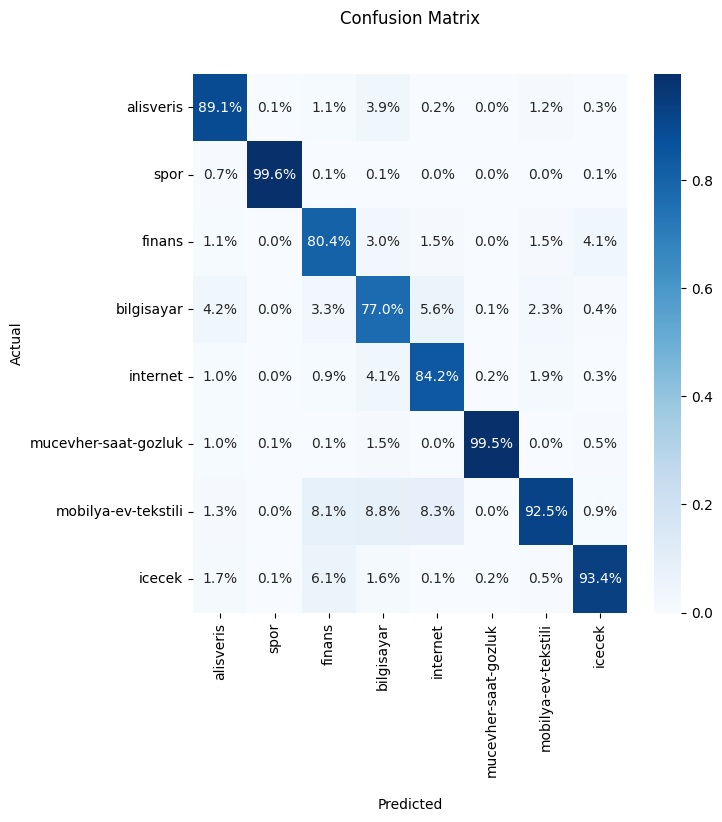

time: 471 ms (started: 2023-07-21 15:50:59 +00:00)


In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))

ax = sns.heatmap(cm_df.iloc[:firstN ,
                            :firstN]/np.sum(cm_df.iloc[:firstN , :firstN]),
                 annot=True, fmt='.1%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted')
ax.set_ylabel('Actual');

ax.xaxis.set_ticklabels(list(id_to_category.values())[:firstN])
ax.yaxis.set_ticklabels(list(id_to_category.values())[:firstN])

## Display the visualization of the Confusion Matrix.
## Karışıklık Matrisinin görselleştirmesini görüntüleyin.
plt.show()

Please, observe the ***correctly classified*** sample ratios of each class.

You **may need to take some actions** for some classes if the correctly predicted sample ratios are relatively low.   
#-------------------------------------------------------------------------------
Lütfen her sınıfın ***doğru sınıflandırılmış*** örnek oranlarını dikkate alınız.

Doğru tahmin edilen örnek oranları nispeten düşükse bazı sınıflar için **bazı işlemler yapmanız** gerekebilir.

time: 614 ms (started: 2023-07-21 15:50:59 +00:00)


## Create an End-to-End model

In the code above, we applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing **raw strings** (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. You can call this model as an End-to-End model.

To do so, you can create a new model using the  `TextVectorization` layer (`vectorize_layer`) we just trained as the first layer.

## Uçtan Uca bir model oluşturun

Yukarıdaki kodda, modele metin beslemeden önce veri kümesine "TextVectorization" katmanını uyguladık. Modelinizi **ham dizeleri** işleyebilir hale getirmek istiyorsanız (örneğin, dağıtımını basitleştirmek için), modelinizin içine "TextVectorization" katmanını dahil edebilirsiniz. Bu modele Uçtan Uca model diyebilirsiniz.

Bunu yapmak için, ilk katman olarak az önce eğittiğimiz "TextVectorization" katmanını ("vectorize_layer") kullanarak yeni bir model oluşturabilirsiniz.

In [172]:
end_to_end_model = tf.keras.Sequential([
  vectorize_layer,
  model_LSTM,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer="adam", metrics=['accuracy']
)


time: 14.8 ms (started: 2023-07-21 15:51:01 +00:00)


In [173]:
loss, accuracy = end_to_end_model.evaluate(test_features, test_targets)
print("Test accuracy/Test doğruluğu: ",accuracy)

2640/2640 [==============================] - 131s 49ms/step - loss: 1.2314 - accuracy: 0.8251
Test accuracy/Test doğruluğu:  0.8251181244850159
time: 2min 23s (started: 2023-07-21 15:51:01 +00:00)


In [174]:
end_to_end_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
 model_LSTM (Functional)     (None, 32)                1898080   
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
Total params: 1,898,080
Trainable params: 1,898,080
Non-trainable params: 0
_________________________________________________________________
time: 35.2 ms (started: 2023-07-21 15:53:24 +00:00)


In [175]:
examples = [
  "Bir fenomen aracılığı ile Yalova Terma City otel'den arandık. Tatil kazandınız buyurun 16 ocakta gelin dediler. Gittik (2 küçük çocuk, eşim ve annem ), bizi y** adlı kişi karşıladı. Tanıtım yapacağız 4 saat dedi. Daha odamıza bile geçemeden, dinlemeye fırsat vermeden bize oteli gezdirmeye başladılar. Gürültülü, müzik sesli, havasız, kalabalık (Corona olduğu dönemde) bir salonda bize tapulu 1 haftalık arsa sattılar. (psikolojik baskı ile) Tabi o yorgunlukla (amaçları da bu zaten) dinlenmeden bize otelin her detayını anlattılar. Tapumuzu almadan para istediler, güvendik aldık. IBAN numarası otele ait olmayan şahsa 30 bin tl ödedik. 1 gün sonra tapu işlemleri yapılacaktı istemiyoruz tapu, tatil dedik. Kabul etmiyorlar, paramızı vermiyorlar. Ayrıca annemin kaldığı odada ısıtma sistemi çalışmıyordu, çocuk havuzu aşırı pisti, kadınlara ait termal havuz kapalı idi, odada telefon çalışmıyordu ya da bilerek sessize alıyorlar ilgilenmemek için.",
  "5 yıl kullandığım buzdolabım buzluktan şu akıtmaya başladı. Servis geldi içini boşaltın. Lastiklerinden hava alıyor sıcak suyla lastikleri yıkayın dediler. Denileni yaptım. 1 sene olmadan tekrar akıtmaya başladı",
  "Hepsiburada'dan esofman takimi aldık. 18 ocakta yola çıktı ve teslim edildi gözüküyor. Teslim adresi kayınpederimin dükkandı. Ben elemanlar aldı diye düşündüm. Fakat birkaç gün geçti getiren olmadı. Sorunca da kimsenin teslim almadığını öğrendim. Lütfen kargomuzu kime teslim ettiğinizi öğrenin, o gün dağıtım yapan kuryenize sorabilirsiniz. Gereğinin yapılacağını umuyorum, kızıma aldığım bir hediyeydi üzgünüm.",
  "Bimcell tarafıma mesaj atıp 6GB internet Hediye! Evet yazıp 3121'e göndererek kampanyaya katilin,3 gün içinde 30 TL'ye Dost Orta Paket almanız karşılığında haftalık 6GB cepten internet kazanın! Şeklinde mesaj attı dediklerini yerine getirdim paketi yaptım 3121 e Evet yazarak mesaj attım ancak 24.01.2022 de yaptığım işlem hala gerçekleşmedi hediye 6 GB hattıma tanımlanmadı",
  "Instagram'da gözlük marketi hesabı sattığı kalitesiz ürünü geri almıyor. Gözlük çok kötü. Saplar oyuncak desen değil. Oyuncakçıdan alsam çok daha kaliteli olurdu. Bir yazdım iade edebilirsiniz diyor. Sonra yok efendim iademiz yok diyor.",
  "Tamamlayıcı sağlık sigortamı iptal etmek istiyorum fakat ne bankadan ne NN SİGORTA'dan bir tek muhatap bile bulamıyorum. Telefonda dakikalarca tuşlama yapıp bekletiliyor kimsenin cevap verdiği yok. Zaman kaybından başka bir şey değil! İletişim kurabileceğim biri tarafından aranmak istiyorum",
  "Selamlar TOKİ ve emlak yönetimden şikayetimiz var. Kastamonu merkez örencik TOKİ 316 konut 3 gündür kömür gelmedi bir çok blokta kömür bitmiş durumda bu kış zamanında eksi 8 ila 15 derecede yaşlılar hastalar çocuklar bütün herkesi mağdur ettiler. Emlak yönetim 734.60 ton kömür anlaşması yapmış onu da geç yaptığı için zaten yüksek maliyet çıkarmıştı yeni fiyat güncellemesi yapacakmış örneğin bana 6.160 TL nin üzerine fiyat eklenecekmiş bu işi yapan sorumlu kişi veya kişilerin zamanında tedbir almamasının cezasını TOKİ de oturan insanlar çekiyor ya sistem ya da kişiler hatalı"
]

predictions=end_to_end_model.predict(examples)
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

1/1 [==============================] - 1s 570ms/step
cep-telefon-kategori
beyaz-esya
otomotiv
mobilya-ev-tekstili
mobilya-ev-tekstili
otomotiv
emlak-ve-insaat
time: 659 ms (started: 2023-07-21 15:53:24 +00:00)


## Add an Interface with Gradio

## Gradio ile Arayüz Ekleyin

In [176]:
!pip install gradio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.8 MB/s eta 0:

In [177]:
import gradio as gr

def classify(text):
    pred =end_to_end_model.predict([text])
    return id_to_category[np.argmax(pred)]


demo = gr.Interface(
    fn=classify,
    inputs=gr.inputs.Textbox(lines=5, label="Input Review"),
    outputs=gr.outputs.Textbox(label="Predicted Review Class"),
    examples=examples
)

demo.launch()

<ipython-input-177-618a405b63af>:10: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=gr.inputs.Textbox(lines=5, label="Input Review"),
<ipython-input-177-618a405b63af>:10: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, label="Input Review"),
<ipython-input-177-618a405b63af>:10: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  inputs=gr.inputs.Textbox(lines=5, label="Input Review"),
<ipython-input-177-618a405b63af>:11: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  outputs=gr.outputs.Textbox(label="Predicted Review Class"),


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

time: 2.45 s (started: 2023-07-21 15:53:41 +00:00)


## Summary

In this part,
* we created a Deep Learning model with a **Bidirectional LSTM layer**  to classify text into ***multi-classes***,
* we **trained** and **tested** the model,
* we observed the **model performance** using **Classification Report** and **Confusion Matrix**,
* we pointed out the importance of the **balanced** dataset and the performance on each class.
* we created an **end-to-end model** by integrating the **Keras Text Vectorization** layer into the final model.
* we designed a simple UI with Gradio.

In the next part, we will design another Deep Learning model by using a ***Transformers Encoder Block***.

#-------------------------------------------------------------------------------

## Özet

Bu bölümde,
* Metni ***çoklu sınıflara*** göre sınıflandırmak için **Çift Yönlü LSTM katmanı** ile bir Derin Öğrenme modeli oluşturduk,
* modeli **eğittik** ve **test ettik**,
* **Sınıflandırma Raporu** ve **Karışıklık Matrisi** kullanarak **model performansını** gözlemledik,
* **dengeli** veri kümesinin ve her sınıftaki performansın önemine dikkat çektik.
* **Keras Text Vectorization** katmanını nihai modele entegre ederek **uçtan uca bir model** oluşturduk.
* Gradio ile basit bir kullanıcı arayüzü tasarladık.

Bir sonraki bölümde ***Transformers Encoder Block*** kullanarak başka bir Derin Öğrenme modeli tasarlayacağız.

time: 2.51 s (started: 2023-07-21 15:53:41 +00:00)


# TEXT CLASSIFICATION WITH A TRANSFORMER'S ENCODER BLOCK
# BİR TRAFO KODLAYICI BLOK İLE METİN SINIFLANDIRMASI


## A generic transformer's encoder block based classifier:
We will use the encoder part of the generic transformer architecture.

First, remember the generic transformer architecture:

#-------------------------------------------------------------------------------

## Jenerik bir transformatörün kodlayıcı bloğu tabanlı sınıflandırıcısı:
Jenerik trafo mimarisinin enkoder kısmını kullanacağız.

İlk olarak, genel trafo mimarisini hatırlayın:

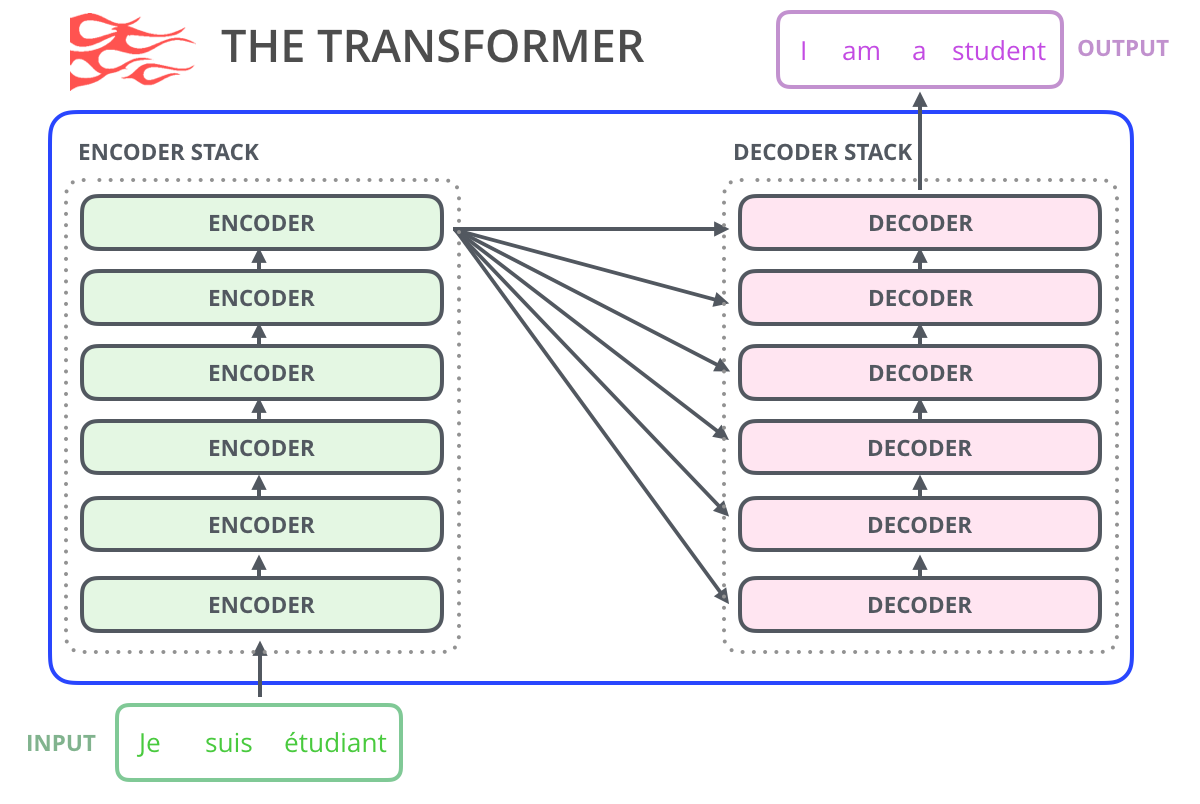

**Why do we use the encoder part not the decoder part?**
This is an important question. Remember that encoder part is composed of **self attention** and **feed forward network** as depicted below:

#-------------------------------------------------------------------------------
**Neden kod çözücü kısmını değil de kodlayıcı kısmını kullanıyoruz?**
Bu önemli bir soru. Kodlayıcı bölümünün, aşağıda gösterildiği gibi **öz dikkat** ve **ileri beslemeli ağ** bölümlerinden oluştuğunu unutmayın:

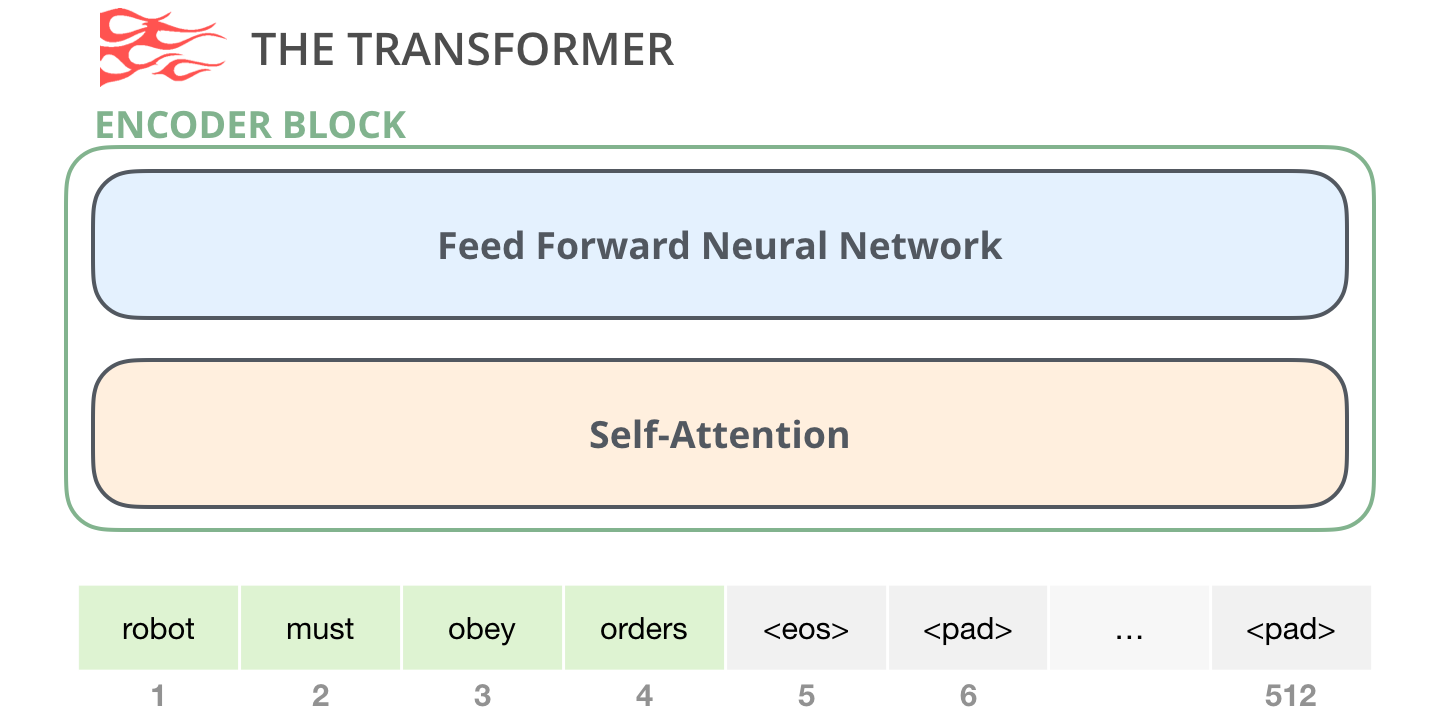

However, in decoder part, we have a **masked self attention** layer which prevents the attention layer to look all the input sequence. In the masked self attention mechanism, we can **only take care (attend to) the tokens to the left**.

#-------------------------------------------------------------------------------
Ancak, dekoder kısmında, dikkat katmanının tüm giriş sırasını görmesini engelleyen **maskeli bir kişisel dikkat** katmanımız var. Maskeli öz dikkat mekanizmasında **yalnızca soldaki belirteçlerle ilgilenebiliriz**.

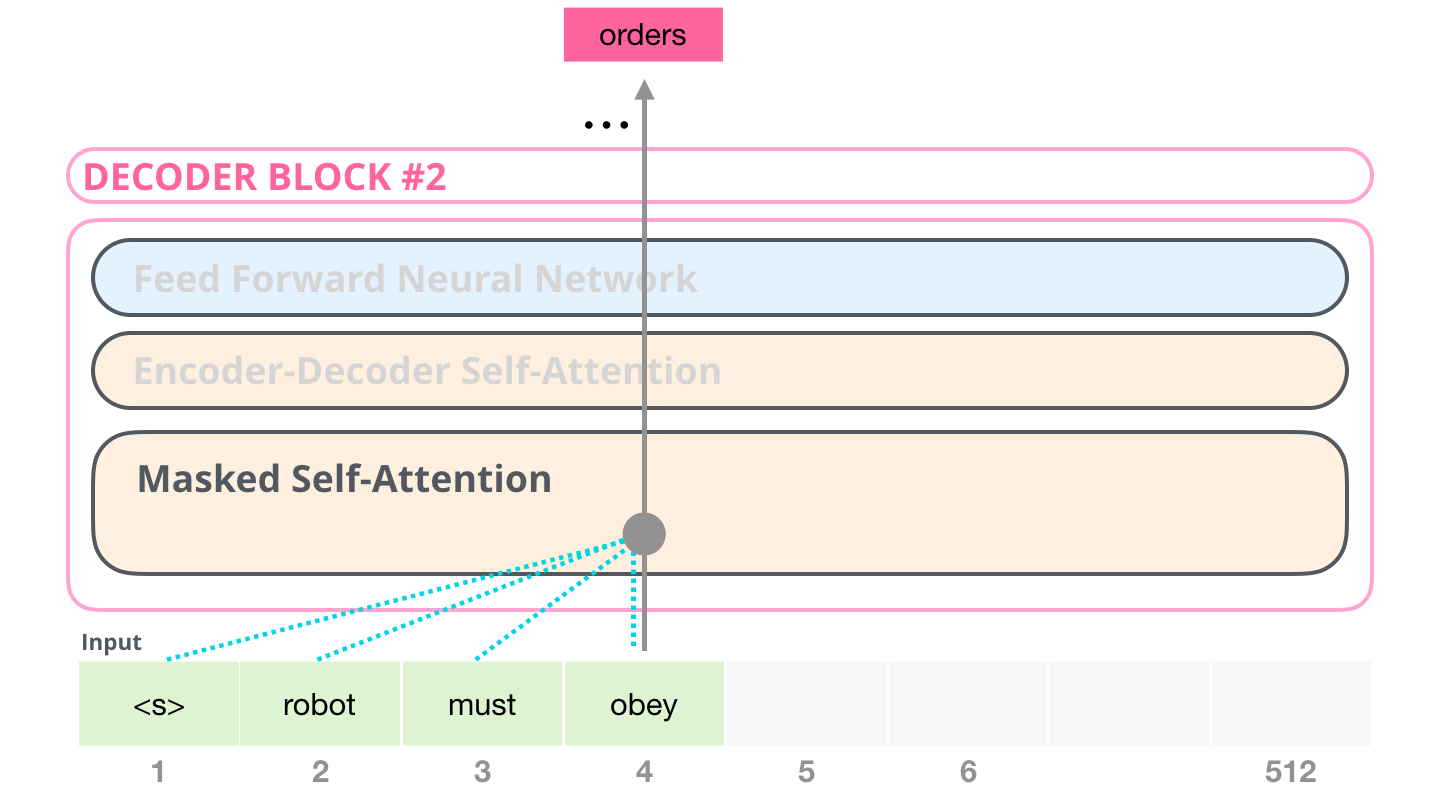

It’s important that the distinction between **self-attention** (what BERT uses) and **masked self-attention** (what GPT-2 uses) is clear. A normal self-attention block allows a position to peak at tokens to its right. Masked self-attention prevents that from happening:

#-------------------------------------------------------------------------------

**Kendine dikkat** (BERT'in kullandığı şey) ile **gizli kendine dikkat** (GPT-2'nin kullandığı şey) arasındaki ayrımın net olması önemlidir. Normal bir kendine dikkat bloğu, bir konumun sağındaki belirteçlerde zirve yapmasına izin verir. Maskelenmiş öz-dikkat bunun olmasını engeller:

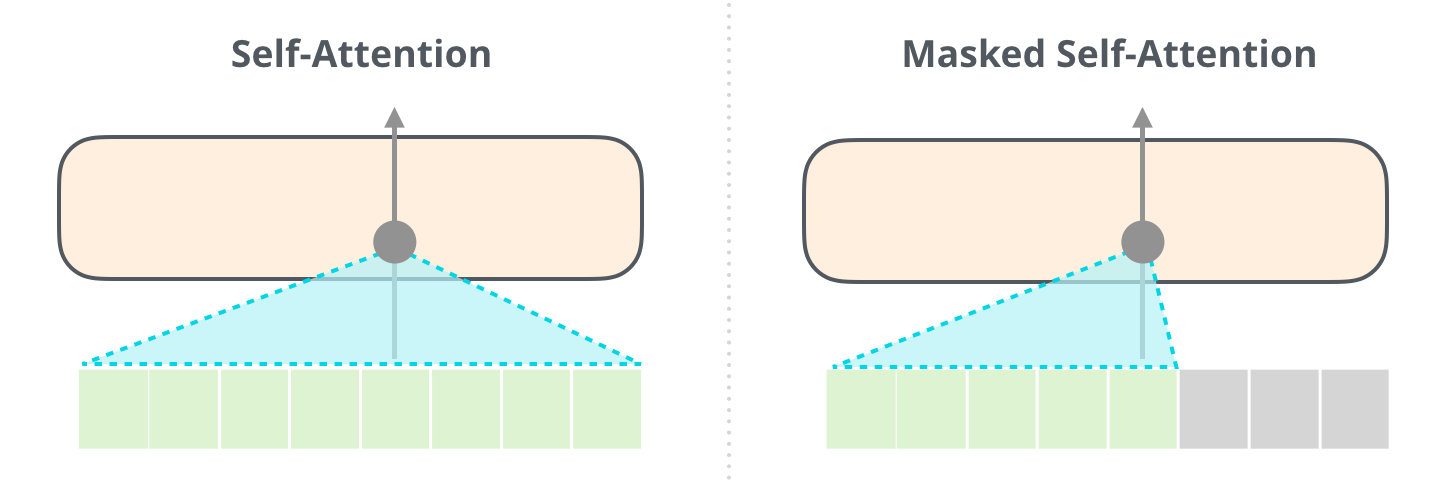

If we use the decoder part, we **will not be able to attend to every token**! That is, we will loose information. However, we **need to attend every token** to classify the given sequence. Therefore, we will use the **encoder part (block)** of the transformer as below.

#-------------------------------------------------------------------------------

Kod çözücü kısmını kullanırsak, **her belirteçle ilgilenemeyeceğiz**! Yani bilgi kaybedeceğiz. Ancak, verilen diziyi sınıflandırmak için **her simgeye katılmamız gerekir**. Bu nedenle aşağıdaki gibi transformatörün **enkoder kısmını (blok)** kullanacağız.

## A transformer encoder block

Below, I will use a modified version of [the code](https://keras.io/examples/nlp/text_classification_with_transformer/) provided by the official Keras site.

## Bir trafo kodlayıcı bloğu

Aşağıda, resmi Keras sitesi tarafından sağlanan [kodun](https://keras.io/examples/nlp/text_classification_with_transformer/) değiştirilmiş bir sürümünü kullanacağım.

In [178]:
# a custom layer for GPT-kind-of transformer encoder block
# GPT türü trafo kodlayıcı bloğu için özel bir katman
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__()
        self.embed_dim=embed_dim
        self.num_heads = num_heads
        self.ff_dim =ff_dim
        self.att = layers.MultiHeadAttention(num_heads, embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size = input_shape[0]
        seq_len = input_shape[1]
        attention_output = self.att(inputs, inputs)

        attention_output = self.dropout1(attention_output)
        out1 = self.layernorm1(inputs + attention_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        return self.layernorm2(out1 + ffn_output)

    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TransformerBlock, self).get_config()
        config.update({
            'att': self.att,
            'ffn': self.ffn,
            'layernorm1': self.layernorm1,
            'layernorm2':self.layernorm2,
            'dropout1':self.dropout1,
            'dropout2':self.dropout2,
            'embed_dim': self.embed_dim,
            'num_heads':self.num_heads,
            'ff_dim':self.ff_dim

        })
        return config

time: 11.6 ms (started: 2023-07-21 15:53:44 +00:00)


For a generic transformer's encoder block, we need to embed the input according to token values and each token position as follows:

Jenerik bir transformatörün kodlayıcı bloğu için, girişi belirteç değerlerine ve her belirteç konumuna göre aşağıdaki gibi gömmemiz gerekir:

In [179]:
class TokenPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size,  embed_dim, **kwargs):
        super(TokenPositionEmbedding, self).__init__()
        self.maxlen = maxlen
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, X):
        maxlen = tf.shape(X)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        X = self.token_emb(X)
        return X + positions

    # https://newbedev.com/saving-keras-models-with-custom-layers
    def get_config(self):
        config = super(TokenPositionEmbedding, self).get_config()
        config.update({
            'token_emb': self.token_emb,
            'pos_emb': self.pos_emb,
            'maxlen': self.maxlen,
            'vocab_size': self.vocab_size,
            'embed_dim': self.embed_dim
        })
        return config
        #tf.keras.models.save_model(model, 'model.h5')
        #new_model = tf.keras.models.load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})


time: 3.29 ms (started: 2023-07-21 15:53:44 +00:00)


## A classifier model based on transformer encoder block

Now, we can build a classifier model based on a generic Transformer Encoder block defined above.

To do so, we first need to decide some hyperparameters of the encoder block.
* I set up the (self attention + position) embedding dimension as 32. Because in my expermients, I noticed that with higher values of embedding dimension, model easily gets **overfitted**.
* Similarly, I select smaller values for number of multi attention head  and dense layer neuron (hidden units) in the encoder block and in the model.

You can try diferent hyperparameter values by updating this Colab Notebook, if you wish :)
#-------------------------------------------------------------------------------
## Transformatör kodlayıcı bloğuna dayalı bir sınıflandırıcı modeli

Şimdi, yukarıda tanımlanan genel bir Transformer Encoder bloğuna dayalı bir sınıflandırıcı modeli oluşturabiliriz.

Bunu yapmak için önce kodlayıcı bloğunun bazı hiperparametrelerine karar vermemiz gerekiyor.
* (Öz dikkat + konum) gömme boyutunu 32 olarak belirledim. Çünkü deneylerimde, gömme boyutunun yüksek değerleri ile modelin kolayca **fazla uydurulduğunu** fark ettim.
* Benzer şekilde kodlayıcı bloğunda ve modelde çoklu dikkat başı ve yoğun katmanlı nöron (gizli birimler) sayısı için daha küçük değerler seçiyorum.

Dilerseniz bu Colab Not Defterini güncelleyerek farklı hiperparametre değerlerini deneyebilirsiniz :)


In [180]:
# Embedding size for each token
# Her belirteç için gömme boyutu
embed_dim = 32
# Number of attention heads
# Dikkat başlığı sayısı
num_heads = 2
# Hidden layer size in feed forward network inside transformer
# and in the classification layer
# Transformatör içindeki ileri beslemeli ağda gizli katman boyutu
# ve sınıflandırma katmanında
feed_forward_dim = 64


def create_model():
    inputs_tokens = layers.Input(shape=(max_len,), dtype=tf.int32)
    embedding_layer = TokenPositionEmbedding(max_len, vocab_size, embed_dim)
    x = embedding_layer(inputs_tokens)

    transformer_block = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    x = transformer_block(x)
    #transformer_block2 = TransformerBlock(embed_dim, num_heads, feed_forward_dim)
    #x = transformer_block2(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(feed_forward_dim, activation="relu")(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(number_of_categories)(x)
    model = keras.Model(inputs=inputs_tokens, outputs=outputs)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric_fn  = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer="adam", loss=loss_fn, metrics=metric_fn)

    return model
model_Transformer=create_model()

time: 956 ms (started: 2023-07-21 15:53:44 +00:00)


In [181]:
model_Transformer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_position_embedding (T  (None, 40, 32)           3201280   
 okenPositionEmbedding)                                          
                                                                 
 transformer_block (Transfor  (None, 40, 32)           12736     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                             

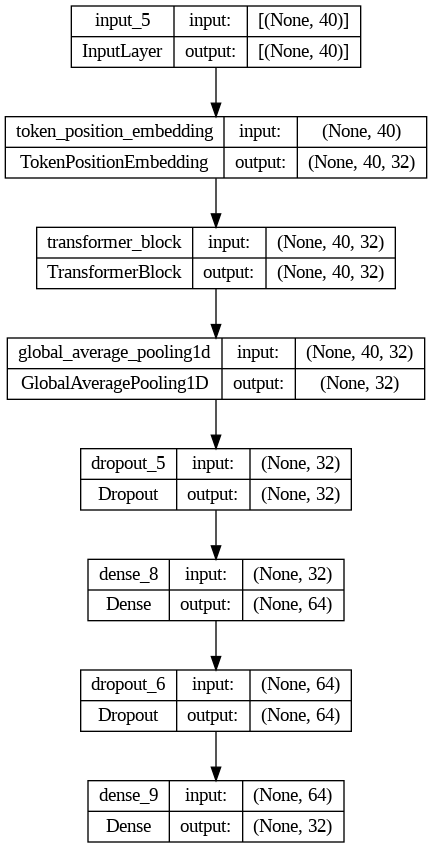

time: 161 ms (started: 2023-07-21 15:53:45 +00:00)


In [182]:
tf.keras.utils.plot_model(model_Transformer,show_shapes=True)

In [183]:
%cd ../models
%pwd

[Errno 2] No such file or directory: '../models'
/content


'/content'

time: 17.1 ms (started: 2023-07-21 15:53:45 +00:00)


## Train
Let's train the model and observe its performance with the validation data.

Modeli eğitelim ve doğrulama verileriyle performansını gözlemleyelim.

In [184]:
filepath = "saved-model-{epoch:02d}-{val_sparse_categorical_accuracy:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_sparse_categorical_accuracy', verbose=1, save_best_only=False, mode='max')

time: 5.99 ms (started: 2023-07-21 15:53:45 +00:00)


In [185]:
history=model_Transformer.fit(train_ds, validation_data=val_ds ,verbose=2, epochs=7, callbacks=[checkpoint])

Epoch 1/7

Epoch 1: saving model to saved-model-01-0.33.hdf5
237/237 - 34s - loss: 3.2910 - sparse_categorical_accuracy: 0.0891 - val_loss: 2.6774 - val_sparse_categorical_accuracy: 0.3257 - 34s/epoch - 143ms/step
Epoch 2/7

Epoch 2: saving model to saved-model-02-0.78.hdf5
237/237 - 27s - loss: 2.1223 - sparse_categorical_accuracy: 0.3756 - val_loss: 0.9429 - val_sparse_categorical_accuracy: 0.7794 - 27s/epoch - 112ms/step
Epoch 3/7

Epoch 3: saving model to saved-model-03-0.86.hdf5
237/237 - 16s - loss: 1.0920 - sparse_categorical_accuracy: 0.6717 - val_loss: 0.6020 - val_sparse_categorical_accuracy: 0.8582 - 16s/epoch - 69ms/step
Epoch 4/7

Epoch 4: saving model to saved-model-04-0.89.hdf5
237/237 - 18s - loss: 0.7098 - sparse_categorical_accuracy: 0.7872 - val_loss: 0.5473 - val_sparse_categorical_accuracy: 0.8924 - 18s/epoch - 76ms/step
Epoch 5/7

Epoch 5: saving model to saved-model-05-0.89.hdf5
237/237 - 18s - loss: 0.5187 - sparse_categorical_accuracy: 0.8420 - val_loss: 0.5494

NOTE: PLease notice the **duration** of the training :)

NOT: Lütfen eğitimin **süresine** dikkat edin :)

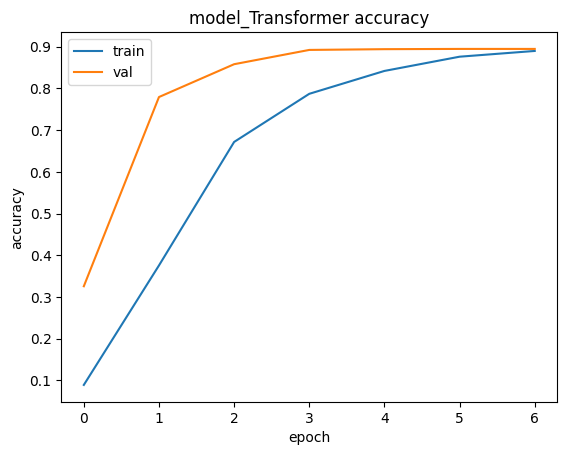

time: 490 ms (started: 2023-07-21 15:56:48 +00:00)


In [186]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model_Transformer accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

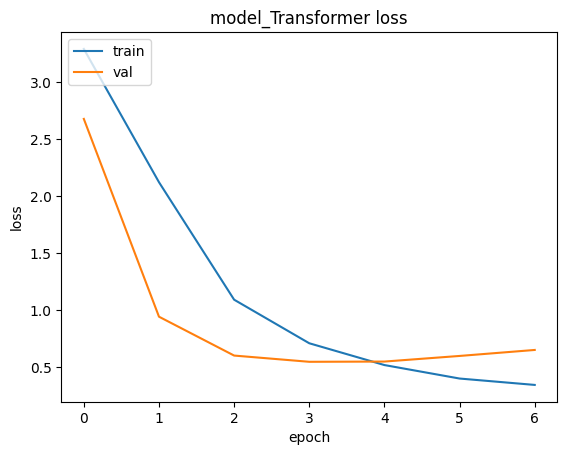

time: 402 ms (started: 2023-07-21 15:56:49 +00:00)


In [187]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_Transformer loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As you may already noticed the model is **overfitting** after the first epoch! The accuracy for the **validation** data is almost **steady** (around 95-96%) while the accuracy for the **train** data is **increasing** up to 98%.

Fark etmiş olabileceğiniz gibi, model ilk çağdan sonra **fazla uyumlu**! **doğrulama** verilerinin doğruluğu neredeyse **sabittir** (%95-96 civarında), **tren** verilerinin doğruluğu ise %98'e kadar **artmaktadır**.

## Save the trained model

## Eğitilen modeli kaydedin

In [188]:
tf.keras.models.save_model(model_Transformer, 'MultiClassTextClassification_Transformer')

time: 4.23 s (started: 2023-07-21 15:56:49 +00:00)


## Test

In [189]:
loss, accuracy = model_Transformer.evaluate(test_ds)
print("Test accuracy: ", accuracy)

1319/1319 [==============================] - 17s 13ms/step - loss: 0.5612 - sparse_categorical_accuracy: 0.9062
Test accuracy:  0.9061552286148071
time: 20.5 s (started: 2023-07-21 15:56:53 +00:00)


## Create an End-to-End model

In the code above, we applied the `TextVectorization` layer to the dataset before feeding text to the model. If you want to make your model capable of processing **raw strings** (for example, to simplify deploying it), you can include the `TextVectorization` layer inside your model. You can call this model as an End-to-End model.

To do so, you can create a new model using the  `TextVectorization` layer (`vectorize_layer`) we just trained as the first layer.

## Uçtan Uca bir model oluşturun

Yukarıdaki kodda, modele metin beslemeden önce veri kümesine "TextVectorization" katmanını uyguladık. Modelinizi **ham dizeleri** işleyebilir hale getirmek istiyorsanız (örneğin, dağıtımını basitleştirmek için), modelinizin içine "TextVectorization" katmanını dahil edebilirsiniz. Bu modele Uçtan Uca model diyebilirsiniz.

Bunu yapmak için, ilk katman olarak az önce eğittiğimiz "TextVectorization" katmanını ("vectorize_layer") kullanarak yeni bir model oluşturabilirsiniz.

In [190]:
end_to_end_model = tf.keras.Sequential([
  vectorize_layer,
  model_Transformer,
  layers.Activation('softmax')
])

end_to_end_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)



time: 21.7 ms (started: 2023-07-21 15:57:14 +00:00)


Notice that `end_to_end_model` generates the exact test accuracy using the **raw text** with the original model accepting **preprocessed text**.

"end_to_end_model"in, orijinal modelin **önişlenmiş metni** kabul etmesiyle **ham metni** kullanarak kesin test doğruluğunu oluşturduğuna dikkat edin.

In [191]:
loss, accuracy = end_to_end_model.evaluate(test_features, test_targets)
print("Test accuracy/Test doğruluğu: ",accuracy)

2640/2640 [==============================] - 31s 11ms/step - loss: 0.5611 - accuracy: 0.9062
Test accuracy/Test doğruluğu:  0.9061771035194397
time: 31.2 s (started: 2023-07-21 15:57:14 +00:00)


In [192]:
end_to_end_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
 model (Functional)          (None, 32)                3218208   
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
Total params: 3,218,208
Trainable params: 3,218,208
Non-trainable params: 0
_________________________________________________________________
time: 25.2 ms (started: 2023-07-21 15:57:45 +00:00)


Let's observe the prediction of `end_to_end_model` with the **raw text**:

**ham metin** ile `end_to_end_model` öngörüsünü inceleyelim:

In [193]:
examples = [
  "Bir fenomen aracılığı ile Yalova Terma City otel'den arandık. Tatil kazandınız buyurun 16 ocakta gelin dediler. Gittik (2 küçük çocuk, eşim ve annem ), bizi y** adlı kişi karşıladı. Tanıtım yapacağız 4 saat dedi. Daha odamıza bile geçemeden, dinlemeye fırsat vermeden bize oteli gezdirmeye başladılar. Gürültülü, müzik sesli, havasız, kalabalık (Corona olduğu dönemde) bir salonda bize tapulu 1 haftalık arsa sattılar. (psikolojik baskı ile) Tabi o yorgunlukla (amaçları da bu zaten) dinlenmeden bize otelin her detayını anlattılar. Tapumuzu almadan para istediler, güvendik aldık. IBAN numarası otele ait olmayan şahsa 30 bin tl ödedik. 1 gün sonra tapu işlemleri yapılacaktı istemiyoruz tapu, tatil dedik. Kabul etmiyorlar, paramızı vermiyorlar. Ayrıca annemin kaldığı odada ısıtma sistemi çalışmıyordu, çocuk havuzu aşırı pisti, kadınlara ait termal havuz kapalı idi, odada telefon çalışmıyordu ya da bilerek sessize alıyorlar ilgilenmemek için.",
  "5 yıl kullandığım buzdolabım buzluktan şu akıtmaya başladı. Servis geldi içini boşaltın. Lastiklerinden hava alıyor sıcak suyla lastikleri yıkayın dediler. Denileni yaptım. 1 sene olmadan tekrar akıtmaya başladı",
  "Hepsiburada'dan esofman takimi aldık. 18 ocakta yola çıktı ve teslim edildi gözüküyor. Teslim adresi kayınpederimin dükkandı. Ben elemanlar aldı diye düşündüm. Fakat birkaç gün geçti getiren olmadı. Sorunca da kimsenin teslim almadığını öğrendim. Lütfen kargomuzu kime teslim ettiğinizi öğrenin, o gün dağıtım yapan kuryenize sorabilirsiniz. Gereğinin yapılacağını umuyorum, kızıma aldığım bir hediyeydi üzgünüm.",
  "Bimcell tarafıma mesaj atıp 6GB internet Hediye! Evet yazıp 3121'e göndererek kampanyaya katilin,3 gün içinde 30 TL'ye Dost Orta Paket almanız karşılığında haftalık 6GB cepten internet kazanın! Şeklinde mesaj attı dediklerini yerine getirdim paketi yaptım 3121 e Evet yazarak mesaj attım ancak 24.01.2022 de yaptığım işlem hala gerçekleşmedi hediye 6 GB hattıma tanımlanmadı",
  "Instagram'da gözlük marketi hesabı sattığı kalitesiz ürünü geri almıyor. Gözlük çok kötü. Saplar oyuncak desen değil. Oyuncakçıdan alsam çok daha kaliteli olurdu. Bir yazdım iade edebilirsiniz diyor. Sonra yok efendim iademiz yok diyor.",
  "Tamamlayıcı sağlık sigortamı iptal etmek istiyorum fakat ne bankadan ne NN SİGORTA'dan bir tek muhatap bile bulamıyorum. Telefonda dakikalarca tuşlama yapıp bekletiliyor kimsenin cevap verdiği yok. Zaman kaybından başka bir şey değil! İletişim kurabileceğim biri tarafından aranmak istiyorum",
  "Selamlar TOKİ ve emlak yönetimden şikayetimiz var. Kastamonu merkez örencik TOKİ 316 konut 3 gündür kömür gelmedi bir çok blokta kömür bitmiş durumda bu kış zamanında eksi 8 ila 15 derecede yaşlılar hastalar çocuklar bütün herkesi mağdur ettiler. Emlak yönetim 734.60 ton kömür anlaşması yapmış onu da geç yaptığı için zaten yüksek maliyet çıkarmıştı yeni fiyat güncellemesi yapacakmış örneğin bana 6.160 TL nin üzerine fiyat eklenecekmiş bu işi yapan sorumlu kişi veya kişilerin zamanında tedbir almamasının cezasını TOKİ de oturan insanlar çekiyor ya sistem ya da kişiler hatalı"
]

predictions=end_to_end_model.predict(examples)
for pred in predictions:
  print(id_to_category[np.argmax(pred)])

1/1 [==============================] - 0s 313ms/step
turizm
beyaz-esya
internet
internet
internet
sigortacilik
emlak-ve-insaat
time: 391 ms (started: 2023-07-21 15:57:45 +00:00)


## Save the export model

## Dışa aktarma modelini kaydedin


In [194]:
tf.keras.models.save_model(end_to_end_model, 'MultiClassTextClassificationExported_Transformer')

time: 8.97 s (started: 2023-07-21 15:57:45 +00:00)


## Load Models

## Modelleri Yükle

In [195]:
%cd "/content/gdrive/MyDrive/Colab Notebooks/models"
%ls

[Errno 107] Transport endpoint is not connected: '/content/gdrive/MyDrive/Colab Notebooks/models'
/content
ls: cannot access 'gdrive': Transport endpoint is not connected
category_to_id.pkl
drive/
flagged/
gdrive/
id_to_category.pkl
MCTC_Conv1D_E2E/
model.png
MultiClassTextClassification_BiLSTM/
MultiClassTextClassification_Conv1D/
MultiClassTextClassificationExported_Transformer/
MultiClassTextClassification_FFN/
MultiClassTextClassification_Transformer/
sample_data/
saved-model-01-0.33.hdf5
saved-model-02-0.78.hdf5
saved-model-03-0.86.hdf5
saved-model-04-0.89.hdf5
saved-model-05-0.89.hdf5
saved-model-06-0.89.hdf5
saved-model-07-0.89.hdf5
vectorize_layer_model/
time: 114 ms (started: 2023-07-21 15:57:54 +00:00)


In [196]:
model_Transformer_saved = tf.keras.models.load_model(
    'MultiClassTextClassification_Transformer')

''',
    custom_objects={'TransformerBlock': TransformerBlock,
                    'TokenPositionEmbedding':TokenPositionEmbedding}
'''
model_Transformer_saved.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_position_embedding (T  (None, 40, 32)           3201280   
 okenPositionEmbedding)                                          
                                                                 
 transformer_block (Transfor  (None, 40, 32)           12736     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                             

In [197]:
export_model_saved = tf.keras.models.load_model('MultiClassTextClassificationExported_Transformer',
                                                custom_objects={'custom_standardization': custom_standardization,
                                                                'TransformerBlock': TransformerBlock,
                                                                'TokenPositionEmbedding':TokenPositionEmbedding})


export_model_saved.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
 model (Functional)          (None, 32)                3218208   
                                                                 
 activation_2 (Activation)   (None, 32)                0         
                                                                 
Total params: 3,218,208
Trainable params: 3,218,208
Non-trainable params: 0
_________________________________________________________________
time: 2.4 s (started: 2023-07-21 15:57:56 +00:00)


## Evaulate the loaded models

## Yüklenen modelleri değerlendirin

In [198]:
loss, accuracy = model_Transformer_saved.evaluate(test_ds)
print("Test accuracy of the loaded model/Yüklenen modelin doğruluğunu test edin: ", accuracy)

1319/1319 [==============================] - 17s 13ms/step - loss: 0.5612 - sparse_categorical_accuracy: 0.9062
Test accuracy of the loaded model/Yüklenen modelin doğruluğunu test edin:  0.9061552286148071
time: 17.2 s (started: 2023-07-21 15:57:58 +00:00)


In [199]:
loss, accuracy = export_model_saved.evaluate(test_features, test_targets)
print("Test accuracy of the loaded export model/Yüklenen dışa aktarma modelinin doğruluğunu test edin: ", accuracy)

2640/2640 [==============================] - 31s 12ms/step - loss: 3.1872 - accuracy: 0.1659
Test accuracy of the loaded export model/Yüklenen dışa aktarma modelinin doğruluğunu test edin:  0.1659069061279297
time: 41.5 s (started: 2023-07-21 15:58:16 +00:00)


time: 21min 18s (started: 2023-07-21 15:58:16 +00:00)


**Notice that:**

* Both uploaded model perform the same (96.40% accuracy)
* The accuracy achieved by the uploaded models is also equivalent to the one that is yielded by the trained models.

Thus, we succesfully save and load models.


**Şuna dikkat edin:**

* Yüklenen her iki model de aynı performansı gösterir (%96,40 doğruluk)
* Yüklenen modellerin sağladığı doğruluk, eğitilen modellerin sağladığı doğrulukla da eşdeğerdir.

Böylece modelleri başarıyla kaydediyor ve yüklüyoruz.